                                            Import Libreries

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
from collections import Counter


                                             Import Data

In [175]:
data = pd.read_csv("data/survey_results_public.csv")        
data_schema= pd.read_csv("data/survey_results_schema.csv")



                                what we can see when we call specific data from files

In [59]:
pd.set_option('display.max_columns', 5)  ### number of columns
pd.set_option('display.max_rows', None)  ### number of rows

                                                     მონაცემთა დამუშავება 

                                                Function of increase - decrease

In [176]:
def sort_dict_by_value(Dictionary, reverse = False):       #### Sorts in ascending or descending order
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

                                            Schedule building functions

In [61]:

def Build_Barh_sizes( key_Phrases , Quantity , interviewed_Numbers ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(interviewed_Numbers)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # პროცენტობის სიზუსტე


    plt.barh(langs, langs_users_num)  # თვითონ ნახაზი
    plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



    for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   # ნახაზის სტილი 

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)
    
    plt.show()

In [62]:
def Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,style , x_axis_visible, sizes, title ) :
    
    fig, ax = plt.subplots(figsize=(sizes))

    langs = key_Phrases

    langs_users_num = np.array(Quantity)


    new_labels = [i+'  {:.1f}'.format(j) for i, j in zip(langs, Quantity)]   # accuracy of percentage 


    plt.barh(langs, langs_users_num)   # drawing itself
    plt.yticks(range(len(langs)), new_labels) # depiction of percentage and Layout of axes 



    for spine in ax.spines.values():      #removing vertical lines
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)   #putting/removing values on x Axis
    ax.tick_params(axis="y", left=False)

    plt.style.use(style)   #style of drawing

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()

    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)

    plt.show()

                                                        სიების სორტირების ფუქნცია

In [63]:
def list_sorter_counter(filtered_list):
  
    global key_Phrases    # გამოვაცხადე გლობალურ ცვლადებად რათა სხვა ფუნქციებში გამოვიყენო
    global Quantity       # გამოვაცხადე გლობალურ ცვლადებად რათა სხვა ფუნქციებში გამოვიყენო
    

    union = []                          # ერთი დიდი სია 


    for i in filtered_list:
        for k in i :  
            union.append(k)          # ერთ დიდი სიაში აერთიანებს ყველაფერს 
            

    

    Counted = Counter(union)             # დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება



    Counted = sort_dict_by_value(Counted, False)  #იყენებს ძემოთა ფუქნციას


    key_Phrases = []  #ინახავს ფრაზებს
    Quantity = []   # ინახავს რაოდენობას 



    items = Counted.items()    # ფაქტიურად დიქშინარის გარდაქმნის ლისთად


    for item in items:        # ანაწილებს ფრაზებს და რაოდენობებს სათანადო სიებში
        key_Phrases.append(item[0])   # უშვებს ფრაზებს
        Quantity.append(item[1])      # უშვებს რიცხვით მნიშვნელობებს


In [64]:
def year_5_to_50(sorted_list):
    global Phrases_5_to_50
    global quantity_5_to_50

    ########## ვქმნით სხვადასხვა ასაკის შესანახად ცარიელ ლისთებს #################
    less_than_5 = []
    from_5_to_9 = []
    from_10_to_14 = []
    from_15_to_19 = []
    from_20_to_24 = []
    from_25_to_29 = []
    from_30_to_34 = []
    from_35_to_39 = []
    from_40_to_44 = []
    from_45_to_49 = []
    more_than_50 =[]

    ########## ვანაცვლებთ ერთ წელზე ნაკლებს და 50 წელზე მეტს 1-ით და 50-ით ########
    sorted_list = np.array(sorted_list)
    sorted_list = np.where(sorted_list == 'Less than 1 year', "1", sorted_list)
    sorted_list = np.where(sorted_list == 'More than 50 years', "50", sorted_list)

    
    ######## ვანაწილებთ სხვადასხვა ასაკს თავის შესაბამის ლისტში ######
    for i in sorted_list:
        if i in str(list(range(0,5))):
            less_than_5.append(i)
        elif i in str(list(range(5,10))):
            from_5_to_9.append(i)
        elif i in str(list(range(10,15))):
            from_10_to_14.append(i)
        elif i in str(list(range(15,20))):
            from_15_to_19.append(i)
        elif i in str(list(range(20,25))):
            from_20_to_24.append(i)
        elif i in str(list(range(25,30))):
            from_25_to_29.append(i)
        elif i in str(list(range(30,35))):
            from_30_to_34.append(i)
        elif i in str(list(range(35,40))):
            from_35_to_39 .append(i)
        elif i in str(list(range(40,45))):
            from_40_to_44.append(i)
        elif i in str(list(range(45,50))):
            from_45_to_49.append(i)
        elif i in str(list(range(50,100))):
            more_than_50.append(i)
            

    ######### ვანაწილებთ რაოდენობებს და შესაბამის შუალედებს 2 სხვადასხვა ლისტში #############
    Phrases_5_to_50= ["less than 5", "5 to 9", "10 to 14", "15 to 19", "20 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 or more"]
    quantity_5_to_50 = [len(less_than_5), len(from_5_to_9), len(from_10_to_14), len(from_15_to_19), len(from_20_to_24), len(from_25_to_29), len(from_30_to_34), len(from_35_to_39), len(from_40_to_44), len(from_45_to_49), len(more_than_50)]

    Phrases_5_to_50.reverse()      ###### ეს რაღაცა ჯანდაბა ატრიალებს გრაფიკს, ამუ თავში რაც იყო ზევით მიდის და პირიქით #######
    quantity_5_to_50.reverse()

   


In [65]:
def year_10_to_30(sorted_list):
    global Phrases_10_to_30
    global Quantity_10_to_30
    ########## ვქმნით სხვადასხვა ასაკის შესანახად ცარიელ ლისთებს #################

    less_than_10 = []
    from_10_to_11 = []
    from_12_to_13 = []
    from_14_to_15 = []
    from_16_to_17 = []
    from_18_to_19 = []
    from_20_to_21 = []
    from_22_to_23 = []
    from_24_to_25 = []
    from_26_to_27 = []
    from_28_to_29 = []
    more_than_30 =[]


    ########## ვანაცვლებთ ხუთ წელზე ნაკლებს და 85 წელზე მეტს 5-ით და 85-ით ########

    sorted_list = np.array(sorted_list)
    sorted_list = np.where(sorted_list == 'Younger than 5 years', "5", sorted_list)
    sorted_list = np.where(sorted_list == 'Older than 85', "85", sorted_list)

    ######## ვანაწილებთ სხვადასხვა ასაკს თავის შესაბამის ლისტში ######

    for i in sorted_list:
        if i in str(list(range(0,10))):
            less_than_10.append(i)
        elif i in str(list(range(10,12))):
            from_10_to_11.append(i)
        elif i in str(list(range(12,14))):
            from_12_to_13.append(i)
        elif i in str(list(range(14,16))):
            from_14_to_15.append(i)
        elif i in str(list(range(16,18))):
            from_16_to_17.append(i)
        elif i in str(list(range(18,20))):
            from_18_to_19.append(i)
        elif i in str(list(range(20,22))):
            from_20_to_21.append(i)
        elif i in str(list(range(22,24))):
            from_22_to_23 .append(i)
        elif i in str(list(range(24,26))):
            from_24_to_25.append(i)
        elif i in str(list(range(26,28))):
            from_26_to_27.append(i)
        elif i in str(list(range(28,30))):
            from_28_to_29.append(i)
        elif i in str(list(range(30,100))):
            more_than_30.append(i)
            







    ######### ვანაწილებთ რაოდენობებს და შესაბამის შუალედებს 2 სხვადასხვა ლისტში #############

    Phrases_10_to_30= ["less than 10", "10 to 11", "12 to 13", "14 to 15", "16 to 17", "18 to 19", "20 to 21", "22 to 23", "24 to 25", "26 to 27", " 28 to 29", "30 or more"]
    Quantity_10_to_30 = [len(less_than_10), len(from_10_to_11), len(from_12_to_13), len(from_14_to_15), len(from_16_to_17), len(from_18_to_19), len(from_20_to_21),  len(from_22_to_23), len(from_24_to_25),  len(from_26_to_27), len(from_28_to_29), len(more_than_30)]

    Phrases_10_to_30.reverse()      ###### ეს რაღაცა ჯანდაბა ატრიალებს გრაფიკს, ამუ თავში რაც იყო ზევით მიდის და პირიქით #######
    Quantity_10_to_30.reverse()

    

In [66]:
def year_15_to_60(sorted_list):
    global Phrases_15_to_60
    global quantity_15_to_60

    ########## ვქმნით სხვადასხვა ასაკის შესანახად ცარიელ ლისთებს #################
    less_than_15 = []
    from_15_to_19 = []
    from_20_to_24 = []
    from_25_to_29 = []
    from_30_to_34 = []
    from_35_to_39 = []
    from_40_to_44 = []
    from_45_to_49 = []
    from_50_to_54 = []
    from_55_to_59 = []
    more_than_60 =[]

    
    ######## ვანაწილებთ სხვადასხვა ასაკს თავის შესაბამის ლისტში ######
    for i in sorted_list:
        if int(i) in list(range(0,15)):
            less_than_15.append(i)
        elif int(i) in list(range(15,20)):
            from_15_to_19.append(i)
        elif int(i) in list(range(20,25)):
            from_20_to_24.append(i)
        elif int(i) in list(range(25,30)):
            from_25_to_29.append(i)
        elif int(i) in list(range(30,35)):
            from_30_to_34.append(i)
        elif int(i) in list(range(35,40)):
            from_35_to_39.append(i)
        elif int(i) in list(range(40,45)):
            from_40_to_44.append(i)
        elif int(i) in list(range(45,50)):
            from_45_to_49 .append(i)
        elif int(i) in list(range(50,55)):
            from_50_to_54.append(i)
        elif int(i) in list(range(55,60)):
            from_55_to_59.append(i)
        elif int(i) in list(range(60,100)):
            more_than_60.append(i)
            

    ######### ვანაწილებთ რაოდენობებს და შესაბამის შუალედებს 2 სხვადასხვა ლისტში #############
    Phrases_15_to_60= ["less than 15", "15_to_19", "20_to_24", "25_to_29", "30_to_34", "35_to_39", "40_to_44", "45_to_49", "50_to_54", "55_to_59", "60 or more"]
    quantity_15_to_60 = [len(less_than_15), len(from_15_to_19), len(from_20_to_24), len(from_25_to_29), len(from_30_to_34), len(from_35_to_39), len(from_40_to_44), len(from_45_to_49), len(from_40_to_44), len(from_55_to_59), len(more_than_60)]

    Phrases_15_to_60.reverse()      ###### ეს რაღაცა ჯანდაბა ატრიალებს გრაფიკს, ამუ თავში რაც იყო ზევით მიდის და პირიქით #######
    quantity_15_to_60.reverse()

    

                                                            მონაცემთა დამუშავება
                                                            

                                                                Developer Type      

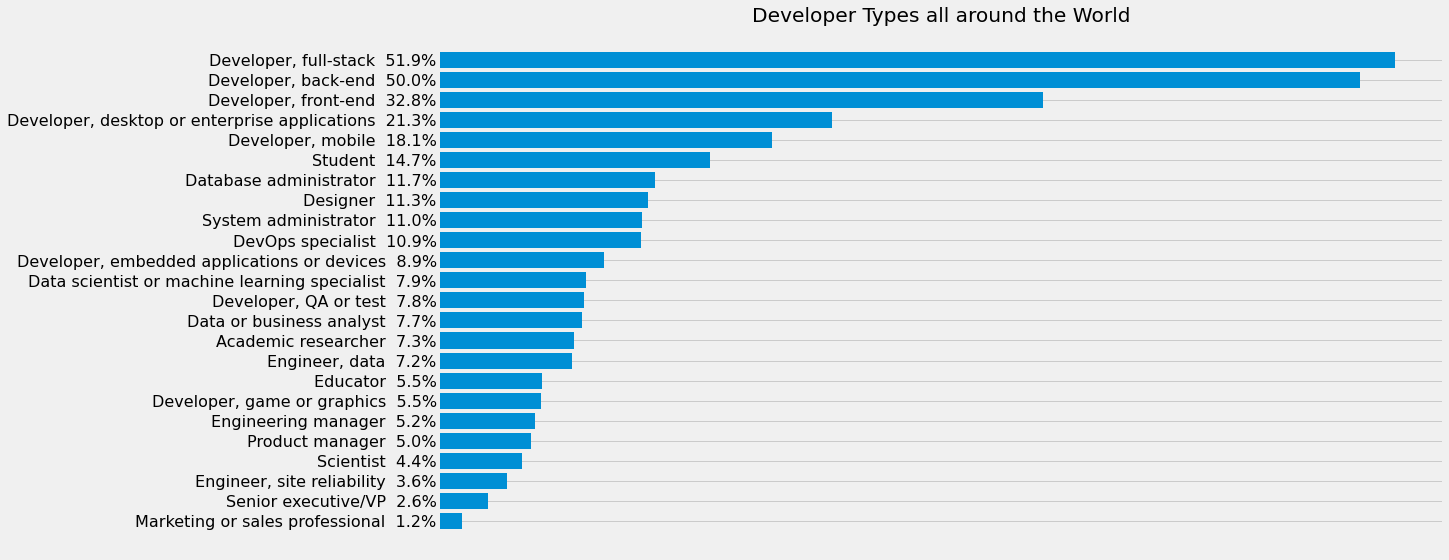

In [67]:
DevType = data["DevType"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
 
DevType.dropna( inplace=True)   # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

DevType = DevType.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში


list_sorter_counter(DevType)  # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Types all around the World") # ვაგებთ გრაფიკს


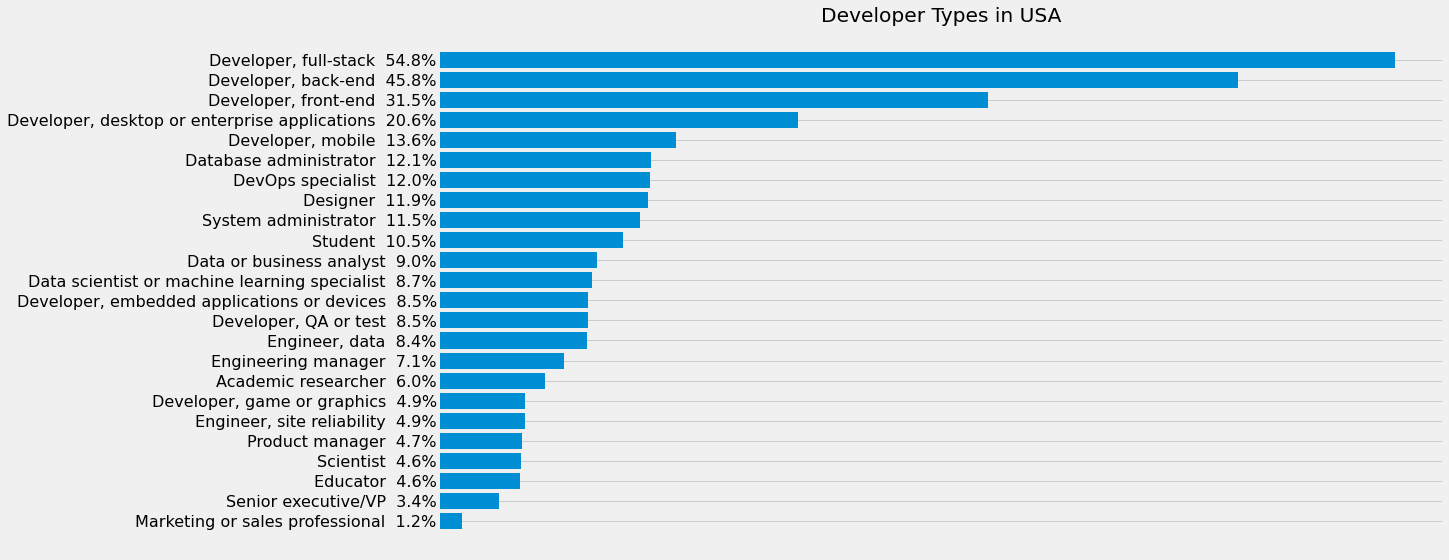

In [68]:
DevType_Filtered = data["DevType"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
 
DevType_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

DevType =data[(DevType_Filtered != "NaN") & (data["Country"] == "United States")]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის USA-სთან



New_DevType = DevType["DevType"]  # ვინაცავთ ახალ ცვლადში

New_DevType = New_DevType.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში



list_sorter_counter(New_DevType)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_DevType ,"fivethirtyeight", False , (16,9), "Developer Types in USA") # ვაგებთ გრაფიკს

                                                                    OpenSourcer

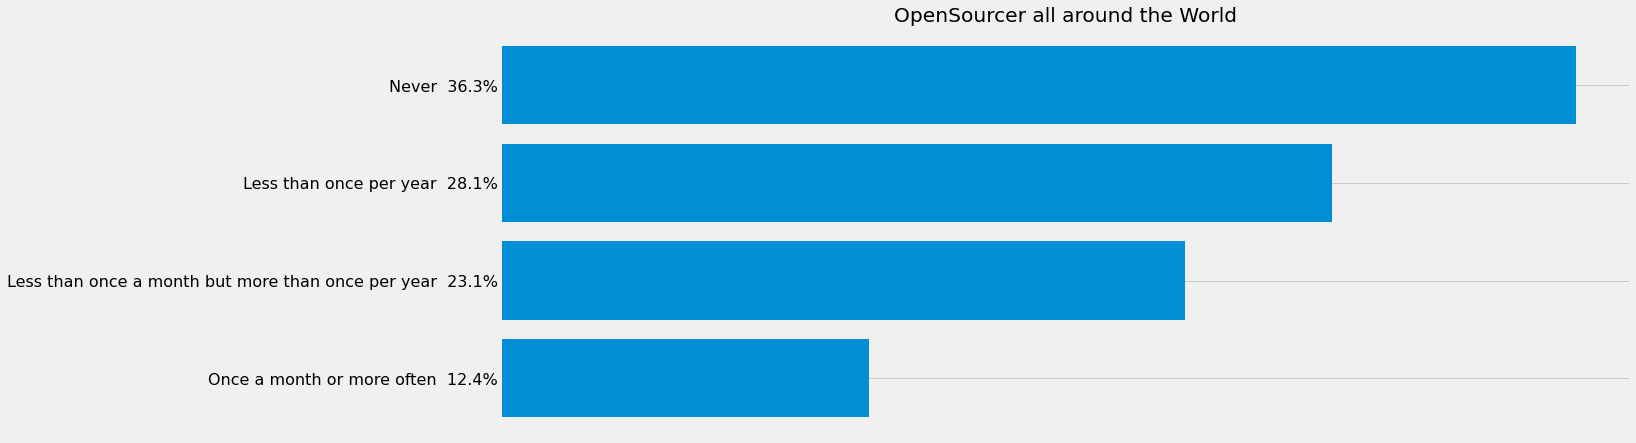

In [69]:
OpenSourcer = data["OpenSourcer"]  # ვიხებთ მხოლოდ OpenSourcer-ის ინფოს

counted = Counter(OpenSourcer)  # ვითვლით OpenSourcer-ების პასუხებს

Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით OpenSourcer-ის პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, OpenSourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer all around the World")   # ვაგებთ გრაფიკს


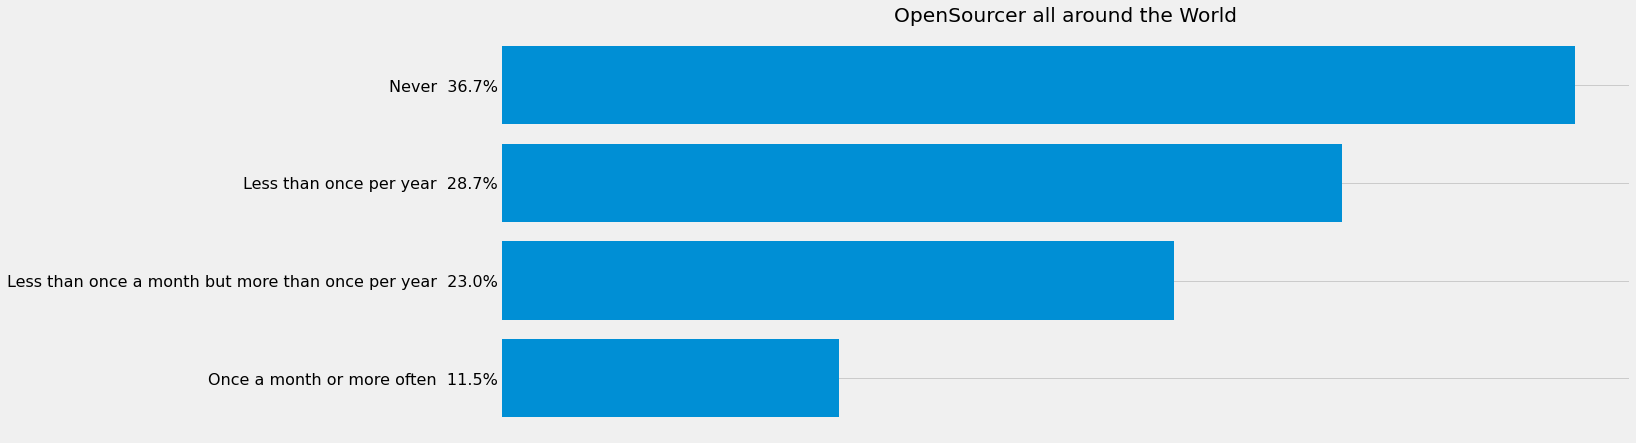

In [70]:
OpenSourcer_USA = data["OpenSourcer"]

OpenSourcer_USA.dropna(inplace = True)

OpenSourcer = data[(OpenSourcer_USA!= "NaN") & (data["Country"] == "United States")]  


New_Opensourcer = OpenSourcer["OpenSourcer"]

counted = Counter(New_Opensourcer)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Opensourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer all around the World")   # ვაგებთ გრაფიკს


                                                            Coding as a Hobby

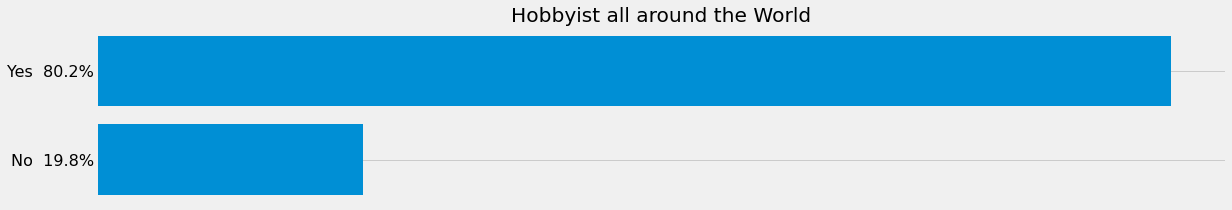

In [71]:
Hobbyist = data["Hobbyist"]

counted = Counter(Hobbyist)  # ვითვლით OpenSourcer-ების პასუხებს

Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით Hobbyist-ის პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, Hobbyist ,"fivethirtyeight", False , (18,3), "Hobbyist all around the World")   # ვაგებთ გრაფიკს



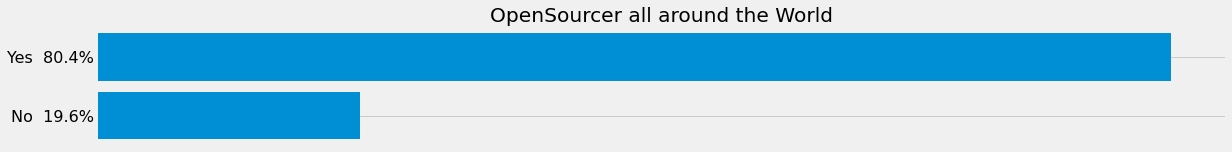

In [72]:
Hobbyist_USA = data["OpenSourcer"]

Hobbyist_USA.dropna(inplace = True)

Hobbyist = data[(Hobbyist_USA != "NaN") & (data["Country"] == "United States")]  


New_Hobbyist= Hobbyist["Hobbyist"]

counted = Counter(New_Hobbyist)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Hobbyist ,"fivethirtyeight", False , (18,2), "OpenSourcer all around the World")   # ვაგებთ გრაფიკს


                                                                  Experience

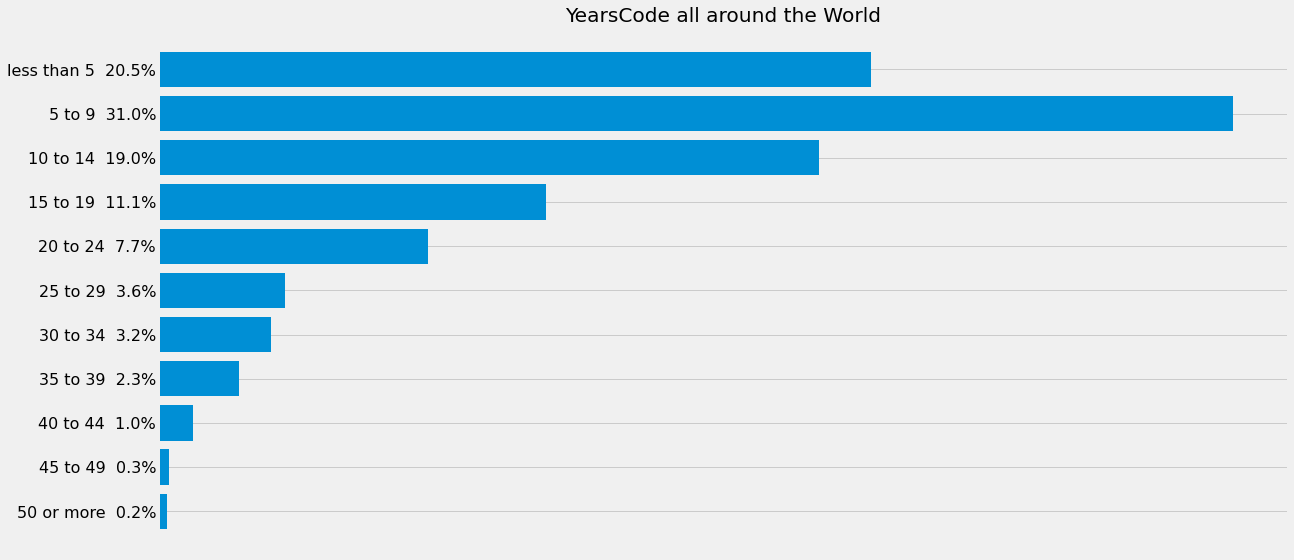

In [73]:
YearsCode = data["YearsCode"]
YearsCode.dropna(inplace = True)


######### ფუნქცია ანაწილებს ადამიანებს სხვადასხვა ასაკობრის ჯგუფში
year_5_to_50(YearsCode)


##### ამით გრაფიკს ვაგებთ  ##########
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, YearsCode, "fivethirtyeight", False , (18,9), "YearsCode all around the World")   # ვაგებთ გრაფიკს

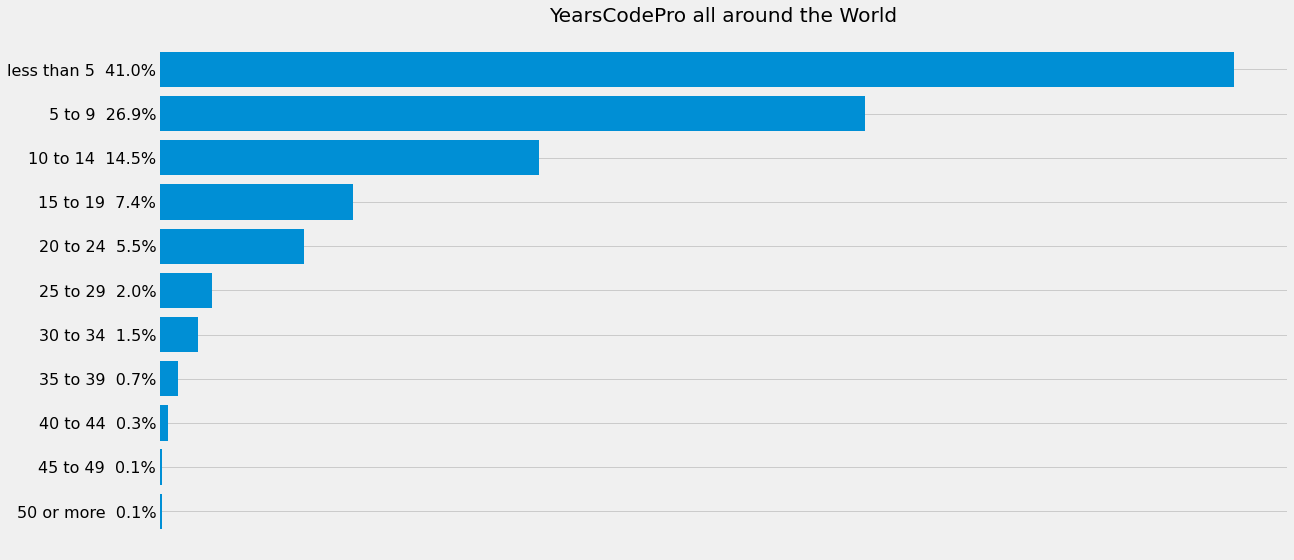

In [74]:
YearsCodePro = data["YearsCodePro"]
YearsCodePro.dropna(inplace=True)


######### ფუნქცია ანაწილებს ადამიანებს სხვადასხვა ასაკობრის ჯგუფში
year_5_to_50(YearsCodePro)


##### ამით კიდე გრაფიკს ვაგებთაა  ##########
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, YearsCodePro, "fivethirtyeight", False , (18,9), "YearsCodePro all around the World")   # ვაგებთ გრაფიკს


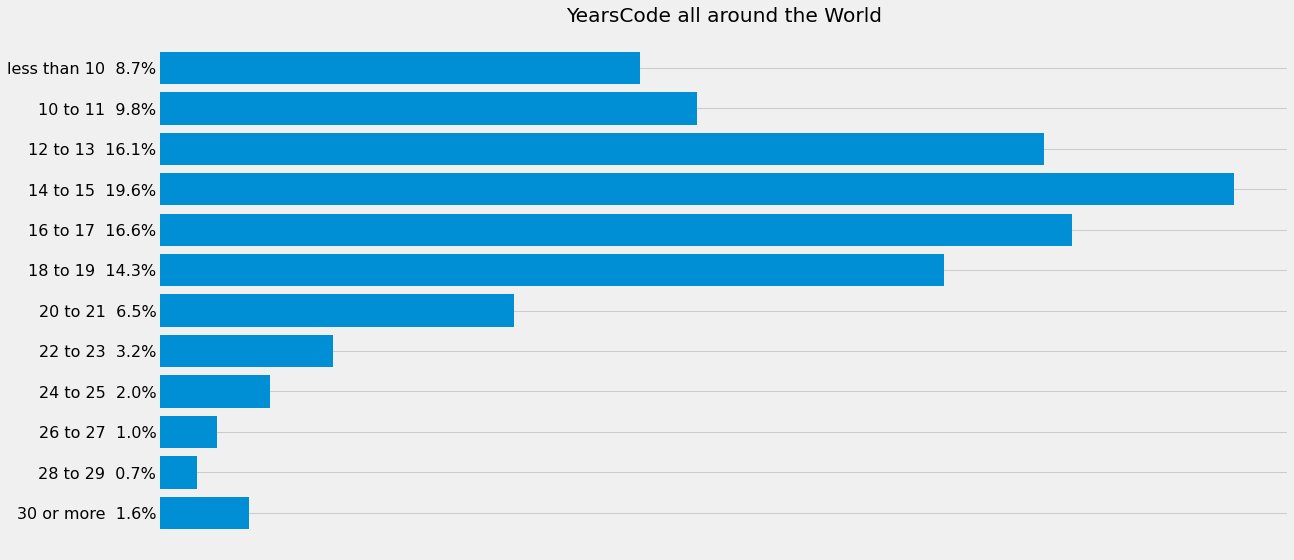

In [75]:
Age1stCode = data["Age1stCode"]
Age1stCode.dropna(inplace = True)


year_10_to_30(Age1stCode)

##### ამით კიდე გრაფიკს ვაგებთაა  ##########
Build_Barh_sizes( Phrases_10_to_30, Quantity_10_to_30, Age1stCode, "fivethirtyeight", False , (18,9), "YearsCode all around the World")   

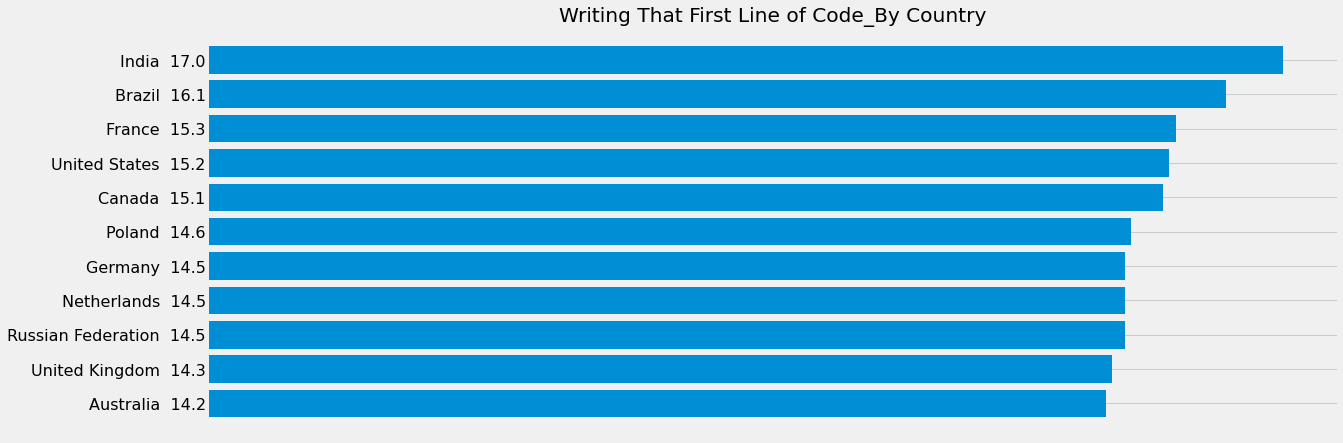

In [76]:
Age1stCode = data["Age1stCode"]
Age1stCode.dropna(inplace = True)
countries = ["India"  , "Brazil" , "France" , "United States" , "Canada" , "Poland" , "Germany" , "Netherlands" , "Russian Federation" , "United Kingdom", "Australia"]


#empty lists to add related data later
key_Phrases=[]    
Quantity=[]


for i in countries:
    age1stcode = data[(Age1stCode != "nan") & (data["Country"] == i)]
    Agefirstcode_country =  np.array(age1stcode["Age1stCode"])
    Agefirstcode_country = np.where(Agefirstcode_country == 'Younger than 5 years', 5, Agefirstcode_country)
    Agefirstcode_country = np.where(Agefirstcode_country == 'Older than 85', "85", Agefirstcode_country)

    Agefirstcode_country = list(map( int, Agefirstcode_country))

    people = len(Agefirstcode_country)
    sum_allages = sum(Agefirstcode_country)

    average = round(sum_allages/people , 1) 

    key_Phrases.append(i)   #adding counties from previous list as key phrases
    Quantity.append(average)  #adding average ages to quantity list

key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code_By Country" ) #building  

                                                                   Education

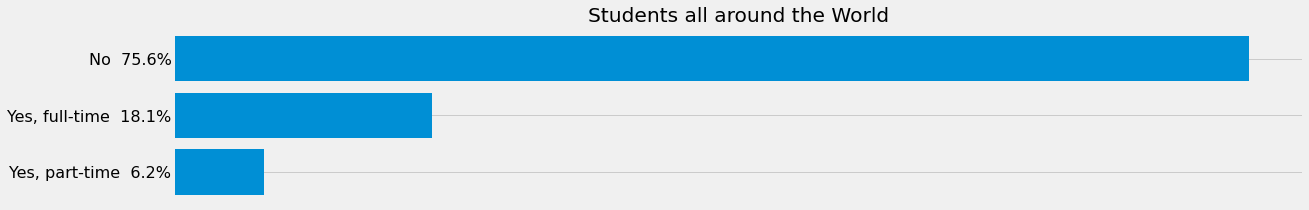

In [77]:
Student = data["Student"]
Student.dropna(inplace = True)
counted = Counter(Student)  # ვითვლით student-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით Student-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, Student ,"fivethirtyeight", False , (18,3), "Students all around the World")   # ვაგებთ გრაფიკს






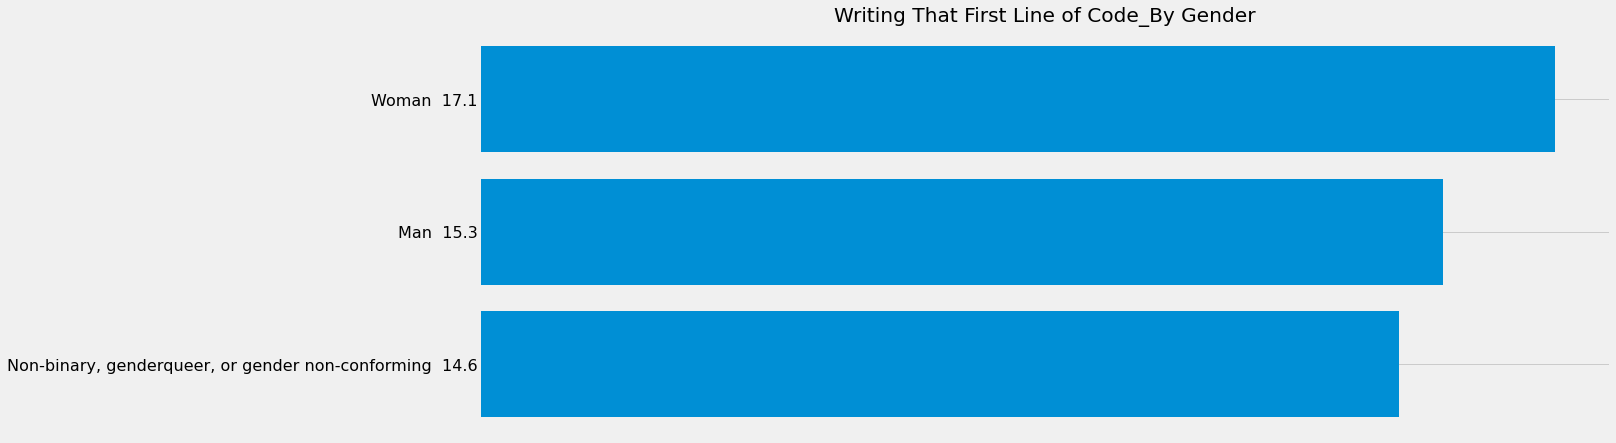

In [78]:
writing_1st_linecode = data["Age1stCode"] #calling data from age of first code 
writing_1st_linecode.dropna(inplace = True) #filtering the data from empty and unnecessary answers

#creating list which contains gender that I want to get data from
gender = ["Woman", "Man", "Non-binary, genderqueer, or gender non-conforming"]

#empty lists to add related data later
key_Phrases = []
Quantity = []

for i in gender:
    writing_1st_linecode_gender = data[(writing_1st_linecode != "nan")  & (data["Gender"] == i)] #combining datas from first code age and gender from previous list. 

    Writing_1st_linecode_gender = np.array(writing_1st_linecode_gender["Age1stCode"]) #transfers data in list
    Writing_1st_linecode_gender = np.where(Writing_1st_linecode_gender == "Younger than 5 years", 5, Writing_1st_linecode_gender)  # changing "Younger than 5" variable as 5 year
    Writing_1st_linecode_gender = np.where(Writing_1st_linecode_gender == "Older than 85", 85, Writing_1st_linecode_gender) # changing "Older than 85" variable as 85 years

    Writing_1st_linecode_gender = list(map(int, Writing_1st_linecode_gender)) #changing variables from string to integers

    number_of_people = len(Writing_1st_linecode_gender) #number of respodents
    ages_all = sum(Writing_1st_linecode_gender) #sum all ages 

    average_age =(ages_all / number_of_people)  #calculating average age

    key_Phrases.append(i)  #adding gender from previous list as key phrases
    Quantity.append(average_age) #adding average ages to quantity list

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()


Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code_By Gender" )  #building

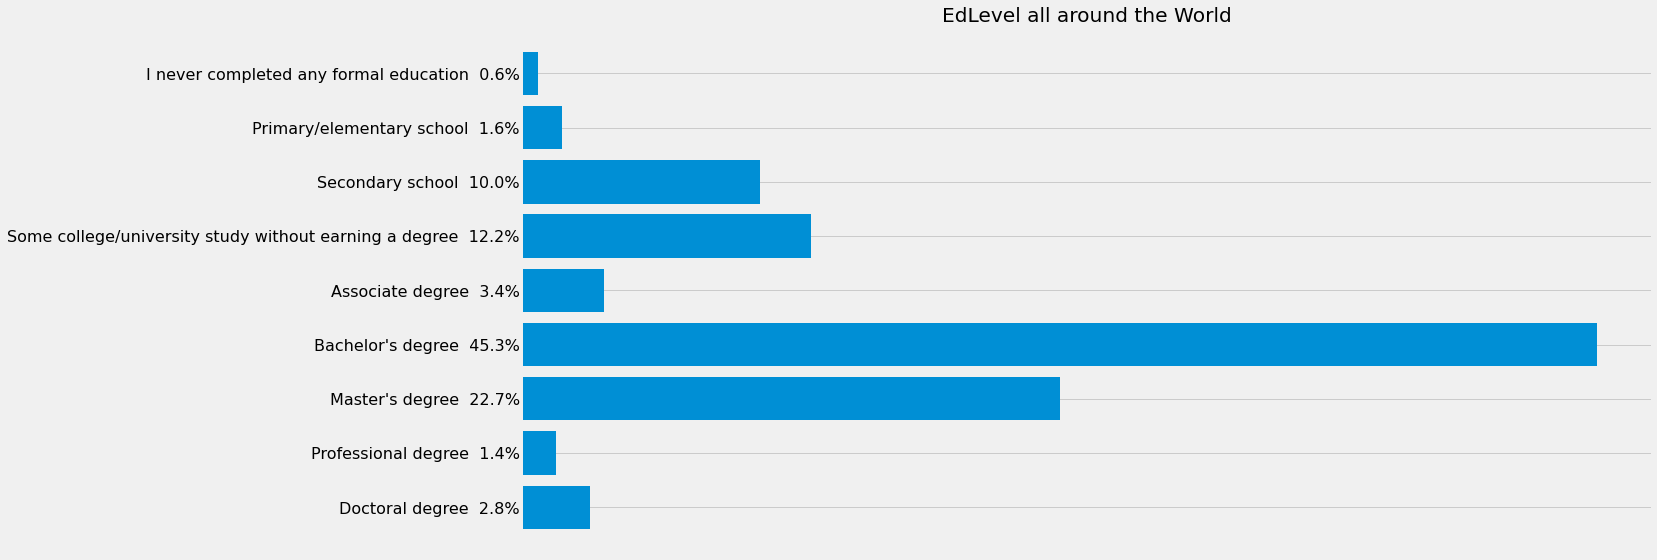

In [79]:

EdLevel = data["EdLevel"]
EdLevel.dropna(inplace = True)


######### ვქმნით ცარიელ სიებს, სადაც უნდა შევინახოთ შესაბამისი მონაცემები #########
no_education = []
primary_school = []
secondary_school = []
collage_degree = []
associate_degree = []
bachelor_degree = []
master_degree = []
professional_degree = []
doctoral_degree = []


########## ვანაწილებთ ფრაზებს შესაბამის სიებში ########
for i in EdLevel:
    if i=="I never completed any formal education":
        no_education.append(i)
    elif i=="Primary/elementary school":
        primary_school.append(i)
    elif i=='Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':
        secondary_school.append(i)
    elif i=='Some college/university study without earning a degree':
        collage_degree.append(i)
    elif i=='Associate degree':
        associate_degree.append(i)
    elif i=='Bachelor’s degree (BA, BS, B.Eng., etc.)':
        bachelor_degree.append(i)
    elif i=='Master’s degree (MA, MS, M.Eng., MBA, etc.)':
        master_degree.append(i)
    elif i ==  'Professional degree (JD, MD, etc.)':
        professional_degree.append(i)
    elif i== 'Other doctoral degree (Ph.D, Ed.D., etc.)':
        doctoral_degree.append(i)





######## ვაკეთებთ ფრაზების და მათი შესაბამისი რაოდენობების შესანახ სიას #####3
key_Phrases=[ "I never completed any formal education", "Primary/elementary school", "Secondary school", "Some college/university study without earning a degree", "Associate degree", "Bachelor's degree", "Master's degree", "Professional degree", "Doctoral degree"]  # ვქმნით ფრაზების შესანახ ლისთს


#### აქ პირდაპირ დავწერე თითოეული სიის სიგრძე ცალკე რო აღარ მეწერა #########
Quantity = [len(no_education), len( primary_school), len(secondary_school), len(collage_degree), len(associate_degree), len(bachelor_degree), len(master_degree), len( professional_degree), len(doctoral_degree)]

########## ამის საშუალებით ვაბრუნებთ გრაფიკზე დატანილ მონაცემებს #########
key_Phrases.reverse()
Quantity.reverse()

#### ამით ვაგებთ გრაფიკსა ##########
Build_Barh_sizes( key_Phrases , Quantity, EdLevel ,"fivethirtyeight", False , (18,9), "EdLevel all around the World")   


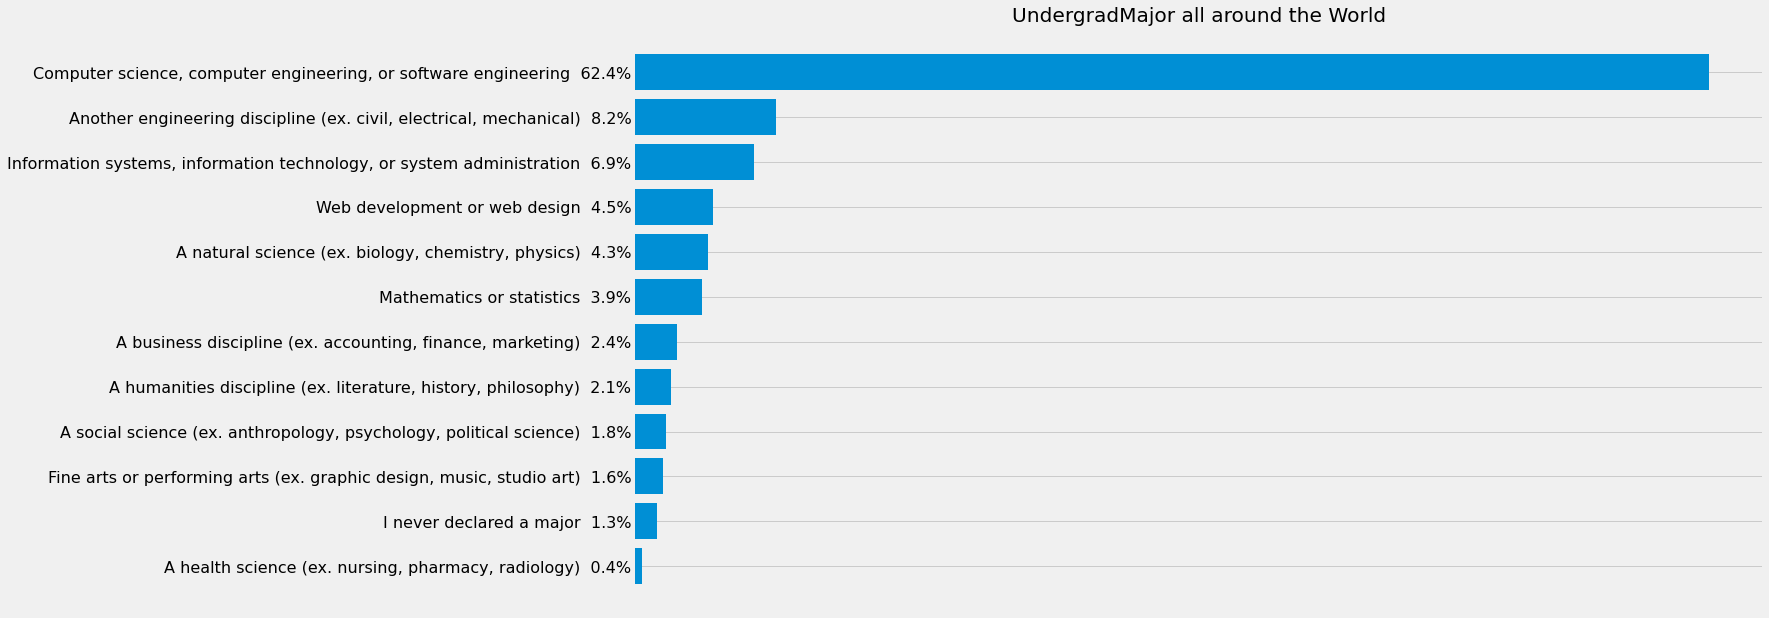

In [80]:
UndergradMajor = data ["UndergradMajor"]
UndergradMajor.dropna(inplace = True)

counted = Counter(UndergradMajor)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, UndergradMajor ,"fivethirtyeight", False , (18,10), "UndergradMajor all around the World")   # ვაგებთ გრაფიკს





In [81]:
UndergradMajor_Filtered = data["UndergradMajor"]    ######## ვიძახებთ Ethnicity-ის
 
UndergradMajor_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

UndergradMajor =data[(UndergradMajor_Filtered!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის სტუდენტებთან


New_UndergradMajor= UndergradMajor["UndergradMajor"]  # მიღებულ მონაცემებს ვინახავთ ახალ ცვლადში

New_UndergradMajor = New_UndergradMajor.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში



list_sorter_counter(New_UndergradMajor)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_UndergradMajor ,"fivethirtyeight", False , (16,10), "UndergradMajor Types in Students") # ვაგებთ გრაფიკს

In [82]:
EduOther = data["EduOther"]
EduOther.dropna(inplace = True)
EduOther = EduOther.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში

list_sorter_counter(EduOther)   ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს


Build_Barh_sizes( key_Phrases , Quantity, EduOther ,"fivethirtyeight", False , (18,10), "EduOther all around the World")   # ვაგებთ გრაფიკს




                                          Demographics

In [83]:
Ethnicity = data ["Ethnicity"]
Ethnicity.dropna(inplace = True)


Ethnicity = Ethnicity.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში

list_sorter_counter(Ethnicity)  ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს

Build_Barh_sizes( key_Phrases , Quantity, Ethnicity ,"fivethirtyeight", False , (18,10), "Ethnicity all around the World")   # ვაგებთ გრაფიკს


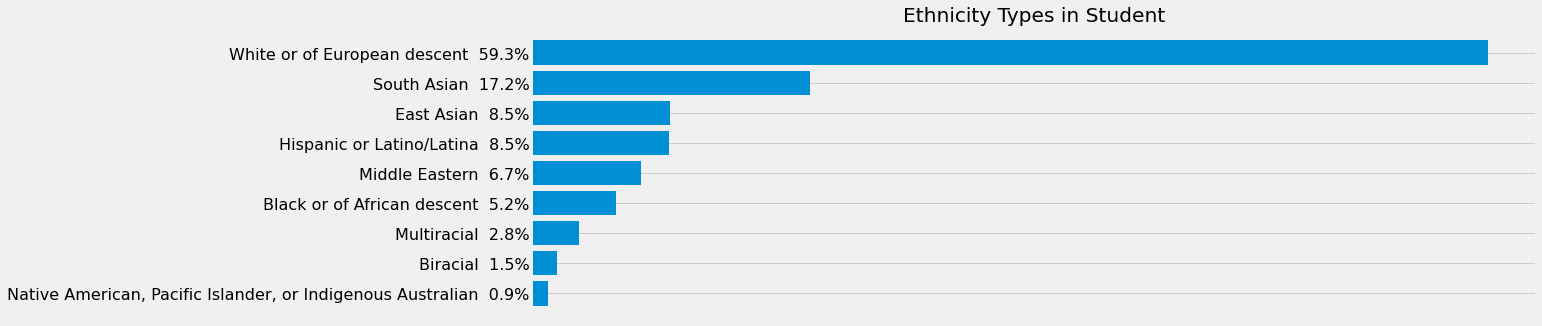

In [84]:
Ethnicity_Filtered = data["Ethnicity"]    ######## ვიძახებთ Ethnicity-ის
 
Ethnicity_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

Ethnicity =data[(Ethnicity_Filtered!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის სტუდენტებთან


New_Ethnicity = Ethnicity["Ethnicity"]  # მიღებულ მონაცემებს ვინახავთ ახალ ცვლადში

New_Ethnicity = New_Ethnicity.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში



list_sorter_counter(New_Ethnicity)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_Ethnicity ,"fivethirtyeight", False , (16,5), "Ethnicity Types in Student") # ვაგებთ გრაფიკს



In [85]:
Gender = data["Gender"]
Gender.dropna(inplace=True)


Gender = Gender.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში

list_sorter_counter(Gender)  ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს

Build_Barh_sizes( key_Phrases , Quantity, Gender ,"fivethirtyeight", False , (18,7), "Ethnicity all around the World")   # ვაგებთ გრაფიკს



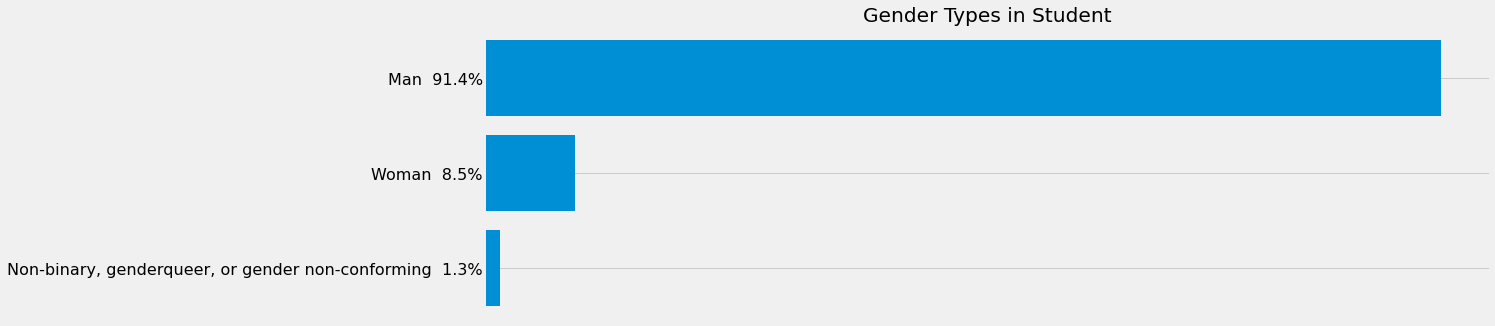

In [86]:
Gender_Filtered = data["Gender"]    # ვიძახებთ Gender-ს
 
Gender_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

Gender =data[(Gender_Filtered!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის სტუდენტებთან


New_Gender = Gender["Gender"]  # ვინახავთ ახალ ცვლადში

New_Gender = New_Gender.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში


list_sorter_counter(New_Gender)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_Gender ,"fivethirtyeight", False , (16,5), "Gender Types in Student") # ვაგებთ გრაფიკს

In [87]:

YearsCode = data["YearsCode"]
YearsCode.dropna(inplace = True)


man  = data[ (YearsCode != "nan") & ((data["Gender"] == "Man") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
new_man = man["YearsCode"]

######### ფუნქცია ანაწილებს ადამიანებს სხვადასხვა ასაკობრის ჯგუფში
year_5_to_50(new_man)
        


# ვაგებთ გრაფიკს
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, new_man ,"fivethirtyeight", False , (16,5), "YearsCode in men") 

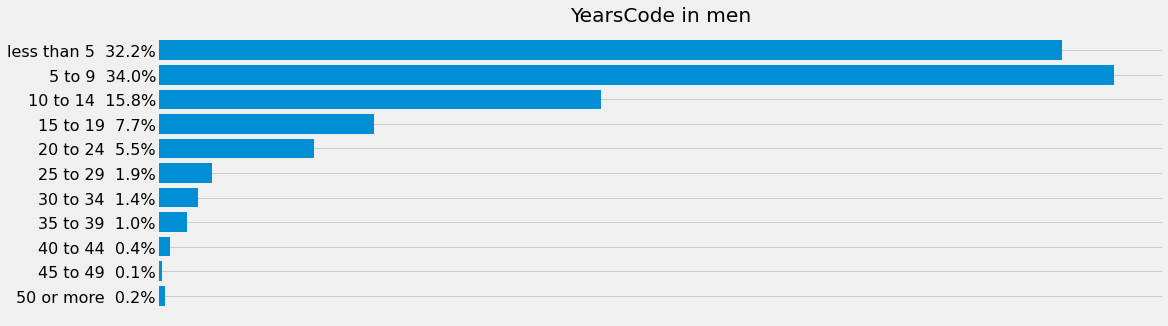

In [88]:

YearsCode = data["YearsCode"]
YearsCode.dropna(inplace = True)


woman  = data[ (YearsCode != "nan") & ((data["Gender"] == "Woman") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
new_woman = woman["YearsCode"]

######### ფუნქცია ანაწილებს ადამიანებს სხვადასხვა ასაკობრის ჯგუფში
year_5_to_50(new_woman)
        


# ვაგებთ გრაფიკს
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, new_woman ,"fivethirtyeight", False , (16,5), "YearsCode in men") 

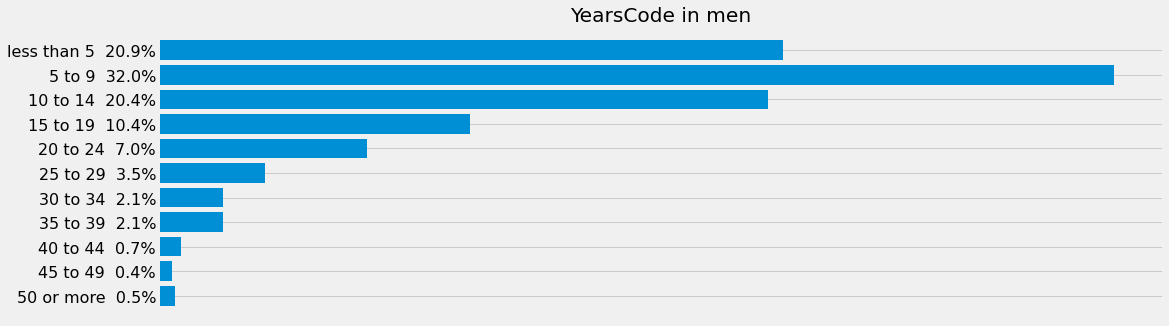

In [89]:
YearsCode = data["YearsCode"]
YearsCode.dropna(inplace = True)


LGBTQ  = data[ (YearsCode != "nan") & ((data["Gender"] == "Non-binary, genderqueer, or gender non-conforming")  | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
new_LGBTQ = LGBTQ["YearsCode"]

######### ფუნქცია ანაწილებს ადამიანებს სხვადასხვა ასაკობრის ჯგუფში
year_5_to_50(new_LGBTQ)
        


# ვაგებთ გრაფიკს
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, new_LGBTQ ,"fivethirtyeight", False , (16,5), "YearsCode in men") 



                                              Sexual Orientation  


In [90]:
Sexuality = data["Sexuality"]
Sexuality.dropna(inplace = True)

Sexuality = Sexuality.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში
list_sorter_counter(Sexuality)  ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს


Build_Barh_sizes( key_Phrases , Quantity, Sexuality ,"fivethirtyeight", False , (18,7), "Sexuality all around the World")   # ვაგებთ გრაფიკს




In [91]:
Sexuality_Filtered = data["Sexuality"]    # ვიძახებთ Gender-ს
 
Sexuality_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

Sexuality =data[(Sexuality_Filtered!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის სტუდენტებთან


New_Sexuality = Sexuality["Sexuality"]  # ვინახავთ ახალ ცვლადში

New_Sexuality = New_Sexuality.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში


list_sorter_counter(New_Sexuality)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, New_Sexuality ,"fivethirtyeight", False , (16,5), "Sexuality Types in Student") # ვაგებთ გრაფიკს

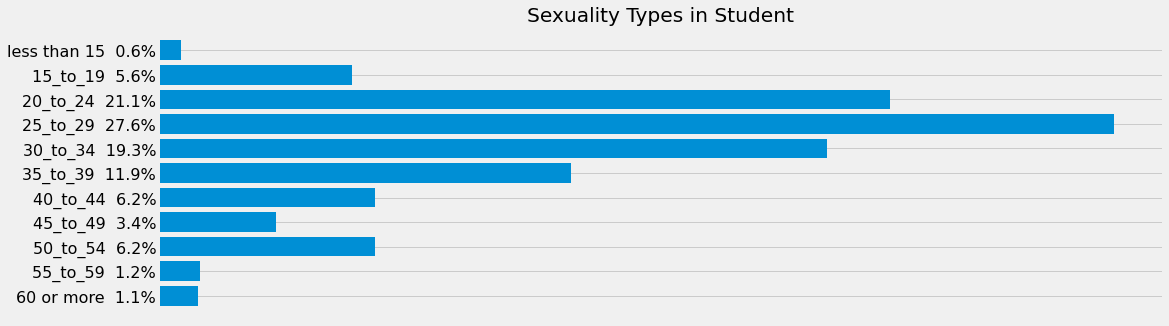

In [92]:
#################### Disability Status-ი არ იყო, ამიტომაც გადავედი ასაკზე #########
Age = data["Age"]
Age.dropna(inplace = True)


year_15_to_60(Age) ######### ფუნქცია ანაწილებს შესაბამის ასაკობრივ ჯგუფებში მონაცემებს

Build_Barh_sizes( Phrases_15_to_60 , quantity_15_to_60, Age ,"fivethirtyeight", False , (16,5), "Sexuality Types in Student") # ვაგებთ გრაფიკს

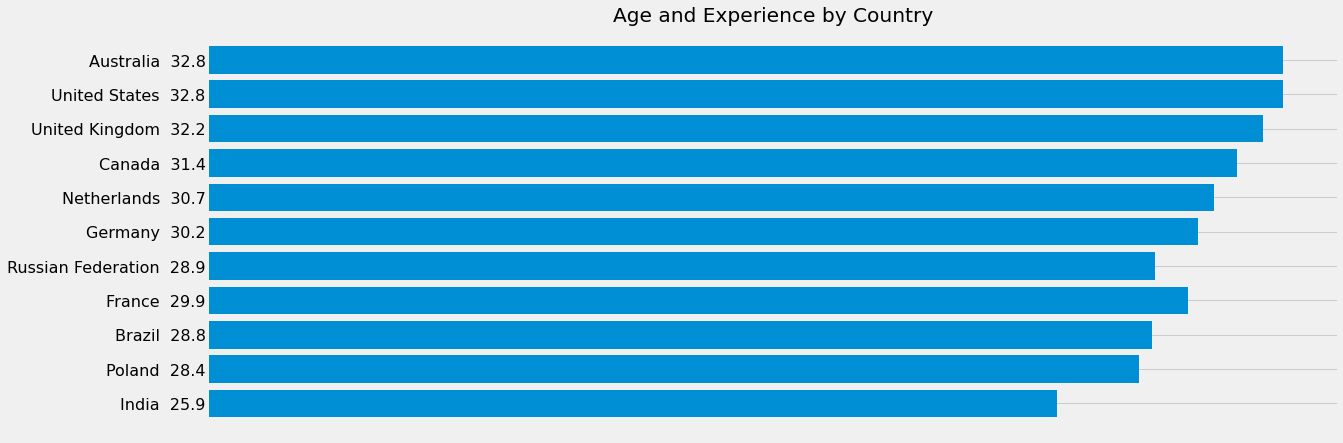

In [93]:
age = data["Age"]
age.dropna(inplace = True)

Countries = ["India"  ,  "Poland"  , "Brazil" , "France",  "Russian Federation" , "Germany" , "Netherlands" , "Canada", "United Kingdom" , "United States" , "Australia"] ##### ქვეყნების ჩამონათვალი

######## ვქმნით ცარიელ სიებს მონაცემების შესანახად
key_Phrases = []
Quantity = []

for i in Countries:
    age_by_countries = data[(age != "nan") & (data["Country"] == i)] #combining datas from  age and country from previous list. 
    Age_by_countries = np.array(age_by_countries ["Age"])  #transfers data in list
    Age_by_countries = list(map(int, Age_by_countries)) #changing variables from string to integers

    number_of_people = len(Age_by_countries)  #number of respodents
    all_ages = sum(Age_by_countries)           #sum all ages

    average_age =round(all_ages / number_of_people , 1)  #calculating average age

    key_Phrases.append(i)        #adding counties from previous list as key phrases
    Quantity.append(average_age) #adding average ages to quantity list

Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,7), "Age and Experience by Country") #building barchart

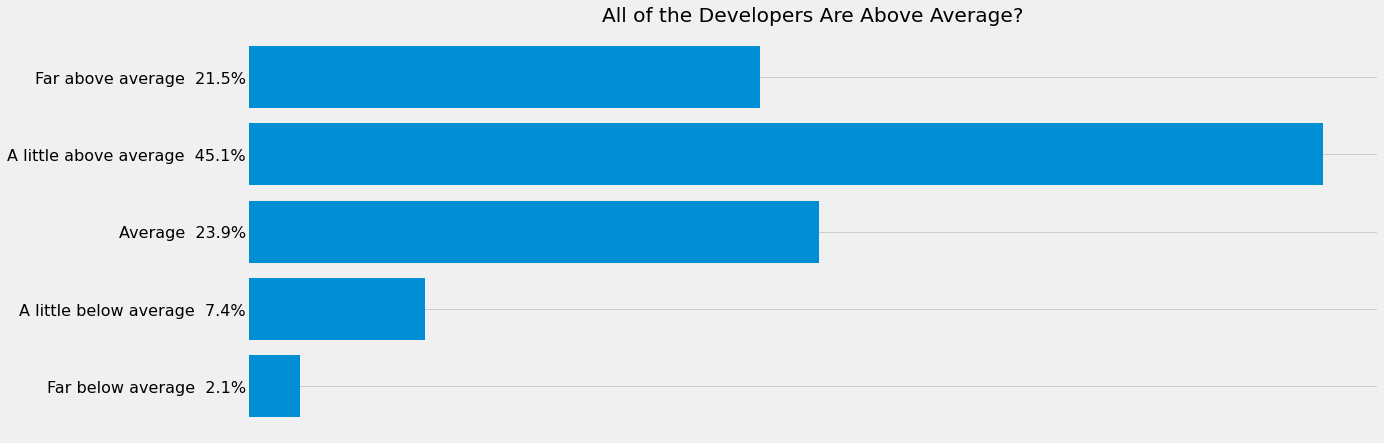

In [94]:
ImpSyn = data["ImpSyn"]
ImpSyn.dropna(inplace = True)

counted = Counter(ImpSyn) ######### დავითვალოთ მონაცემები
key_Phrases = ["Far above average", "A little above average", "Average", "A little below average", "Far below average"] ##  სიაში მოცემულია ის ფრაზები, რომელიც გვჭირდება

Quantity = [] #### ცარიელ სიაში დავამატებთ ამ ფრაზების შესაბამის რაოდენობებს

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse()

########### ამატებს შესაბამის რაოდენობას 
for i in key_Phrases:
    Quantity.append(counted[i]) 


Build_Barh_sizes(key_Phrases, Quantity, ImpSyn, "fivethirtyeight", False , (18,7), "All of the Developers Are Above Average?") #building barchart

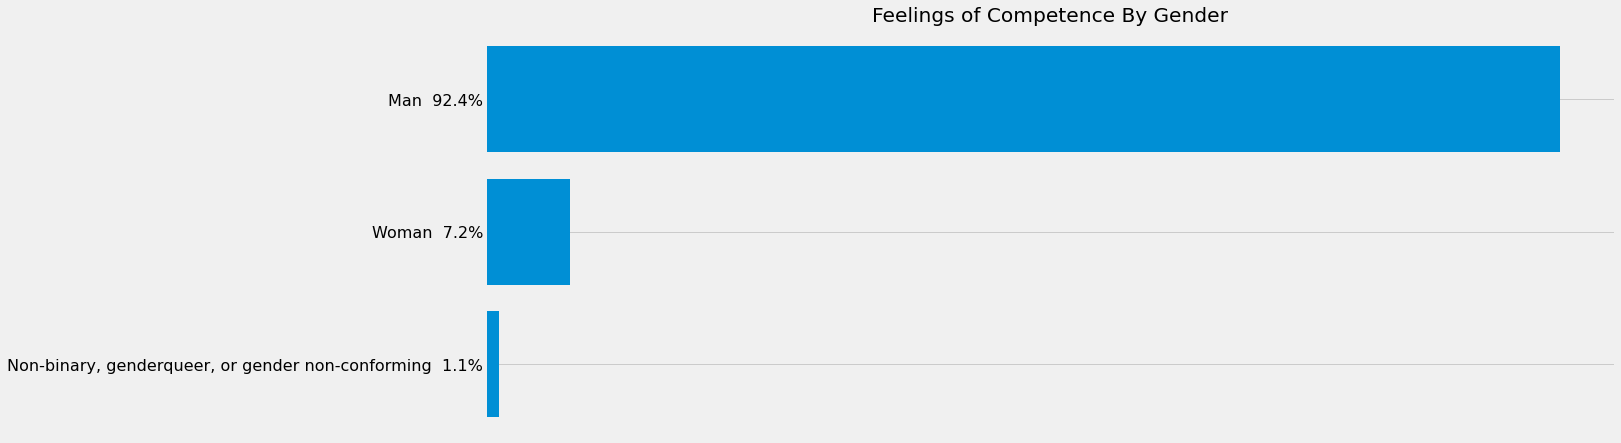

In [95]:
gender = data ["Gender"] #calling data from gender
gender.dropna(inplace = True ) #filtering the data from empty and unnecessary answers

#combinig gender and competence data together
gender_competence  = data[(gender  != "NaN")  & ((data ["ImpSyn"] == "Far above average") | (data ["ImpSyn"] == "A little above average") | (data ["ImpSyn"] == "Average") )]
Gender_competence = gender_competence["Gender"] #save the combined data in new variable

Gender_competence = Gender_competence.str.split(";") #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(Gender_competence) #autosorting 

Build_Barh_sizes(key_Phrases, Quantity, Gender_competence, "fivethirtyeight", False , (18,7), "Feelings of Competence By Gender") #building barchart

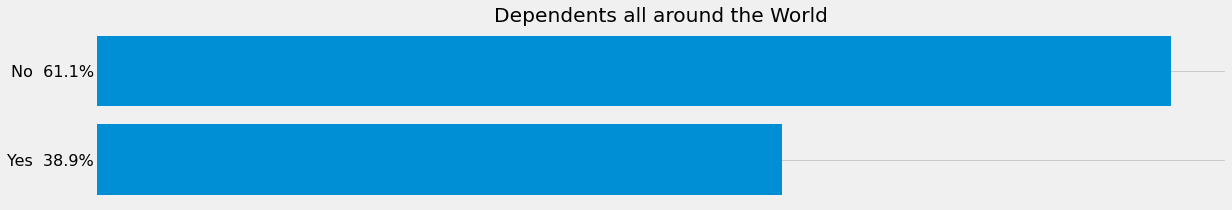

In [96]:
Dependents = data["Dependents"]
Dependents.dropna( inplace = True)

counted = Counter(Dependents)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში


Build_Barh_sizes( key_Phrases , Quantity, Dependents ,"fivethirtyeight", False , (18,3), "Dependents all around the World")   # ვაგებთ გრაფიკს



In [97]:
Dependents_USA = data["Dependents"]

Dependents_USA.dropna(inplace = True)

Dependents = data[(Dependents_USA!= "NaN") & (data["Country"] == "United States")]  


New_Dependents= Dependents["Dependents"]

counted = Counter(New_Dependents)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Dependents ,"fivethirtyeight", False , (18,3), "Dependents in USA")   # ვაგებთ გრაფიკს

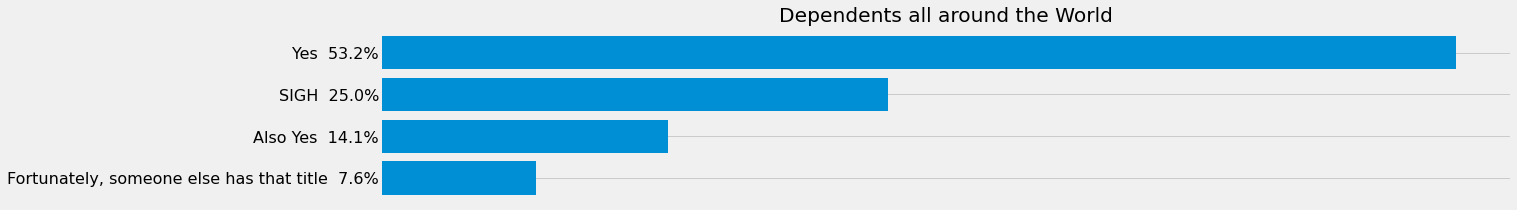

In [98]:
ITperson = data["ITperson"]
ITperson.dropna(inplace = True)

counted = Counter(ITperson)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში


Build_Barh_sizes( key_Phrases , Quantity, ITperson ,"fivethirtyeight", False , (18,3), "Dependents all around the World")   # ვაგებთ გრაფიკს

In [99]:
OffOn = data["OffOn"]
OffOn.dropna(inplace = True)

counted = Counter(OffOn)  # ვითვლით OffOn-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში


Build_Barh_sizes( key_Phrases , Quantity, OffOn ,"fivethirtyeight", False , (18,3), "OffOn all around the World")   # ვაგებთ გრაფიკს

In [100]:
BetterLife = data["BetterLife"]
BetterLife.dropna(inplace = True)

counted = Counter(BetterLife)  # ვითვლით BetterLife-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში


Build_Barh_sizes( key_Phrases , Quantity, BetterLife ,"fivethirtyeight", False , (18,3), "BetterLife all around the World")   # ვაგებთ გრაფიკს


In [101]:
SocialMedia = data["SocialMedia"]
SocialMedia.dropna(inplace = True)

counted = Counter(SocialMedia)  # ვითვლით SocialMedia-ების პასუხებს

########### ვცვლით დიქშენერის ელემენტებს ###############
counted["Youku Tudou"] = counted["Youku Tudou 优酷"] 
del counted["Youku Tudou 优酷"]

counted["WeChat"] = counted["WeChat 微信"] 
del counted["WeChat 微信"]

counted["Weibo"] = counted["Weibo 新浪微博"] 
del counted["Weibo 新浪微博"]


Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში


Build_Barh_sizes( key_Phrases , Quantity, SocialMedia ,"fivethirtyeight", False , (18,9), "SocialMedia all around the World")   # ვაგებთ გრაფიკს

In [102]:
SocialMedia_USA = data["SocialMedia"]

SocialMedia_USA.dropna(inplace = True)

SocialMedia = data[(SocialMedia_USA!= "NaN") & (data["Country"] == "United States")]  


New_SocialMedia= SocialMedia["SocialMedia"]

counted = Counter(New_SocialMedia)  

########### ვცვლით დიქშენერის ელემენტებს ###############
counted["Youku Tudou"] = counted["Youku Tudou 优酷"] 
del counted["Youku Tudou 优酷"]

counted["WeChat"] = counted["WeChat 微信"] 
del counted["WeChat 微信"]

counted["Weibo"] = counted["Weibo 新浪微博"] 
del counted["Weibo 新浪微博"]

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_SocialMedia ,"fivethirtyeight", False , (18,9), "New_SocialMedia in USA")   # ვაგებთ გრაფიკს

In [103]:
ScreenName = data[ "ScreenName"]
ScreenName.dropna(inplace = True)

counted = Counter(ScreenName)  # ვითვლით ScreenName-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, ScreenName ,"fivethirtyeight", False , (18,9), "ScreenName in USA")   # ვაგებთ გრაფიკს

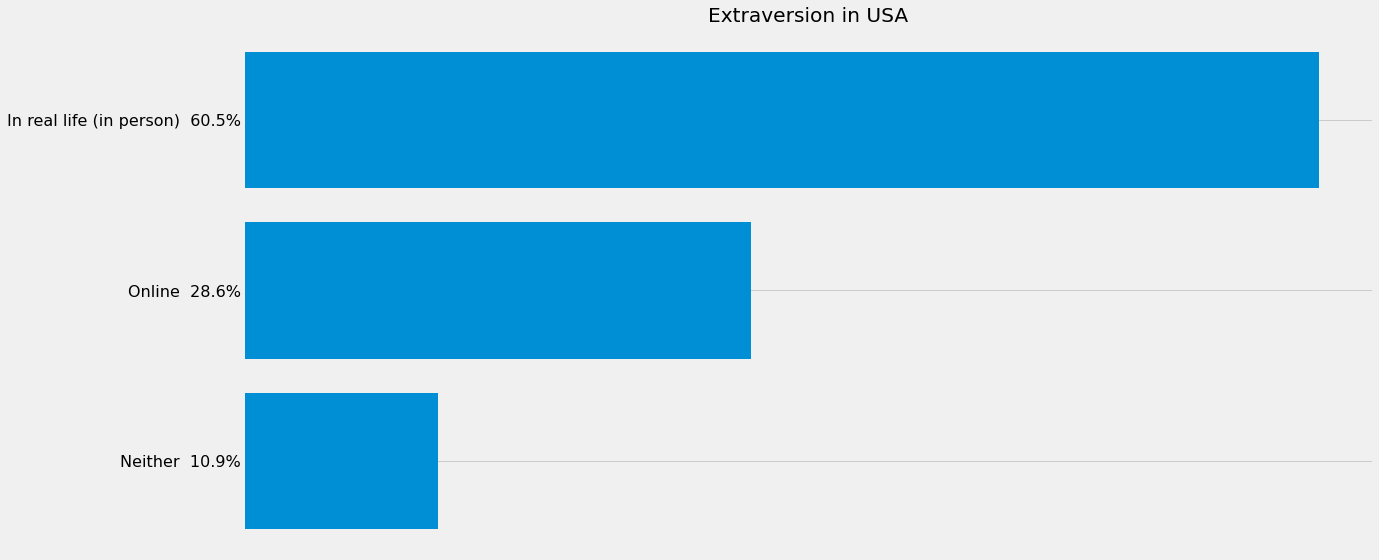

In [104]:
Extraversion = data["Extraversion"]
Extraversion.dropna(inplace = True)

counted = Counter(Extraversion)  # ვითვლით ScreenName-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, Extraversion ,"fivethirtyeight", False , (18,9), "Extraversion in USA")   # ვაგებთ გრაფიკს

                                Programming, Scripting, and Markup Languages

In [105]:

LanguageWorkedWith = data ["LanguageWorkedWith"]
LanguageWorkedWith.dropna(inplace = True)

LanguageWorkedWith_no_others = []  #### ვქმნით ცარიელ სიას სადაც ვამატებთ ელემენტებს other-ების გარეშე (ცალკე მდომი other-ების გარეშე)


#### ამით ვამატებს LanguageWorkedWith_no_others- ის სიაში იმ ელემენტებს, სადაც არ არის ცალკე მდგომი other-ები.
for i in LanguageWorkedWith:
    if i == "Other(s):":
        a=6
    else:
        LanguageWorkedWith_no_others.append(i.split(";"))

union = [] #### ამ სიაში უნდა დავამატოთ other- ებისგან მთლიანად გაფილტრული ელემენტები

##### ვფილტრავთ მთელ სიას other- ებისგან (სხვა პასუხებთან ერთად მდგომი other- ებისგან)
for i in LanguageWorkedWith_no_others:
    for k in i:
        if k != "Other(s):":
           union.append(k)


counted = Counter(union)  ####### დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება

counted = sort_dict_by_value(counted, False)  ######## ალაგებს ელემენტებს რაოდენობების მიხედვით

key_Phrases = []  ######## ვქმნით ფრაზების შესანახ სიას
Quantity = []  ###### ვქმნით რაოდენობების შესანახ სიას

items = counted.items()  ########## დიქშენერის გარდაქმნის სიად

############ ალაგებს ფრაზებს და შესაბამის რაოდენობებს ცალ- ცალკე სიაში ##########
for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])


Build_Barh_sizes( key_Phrases , Quantity, LanguageWorkedWith_no_others ,"fivethirtyeight", False , (18,13), "LanguageWorkedWith all around the World")   # ვაგებთ გრაფიკს


In [106]:
WebFrameWorkedWith = data ["WebFrameWorkedWith"]
WebFrameWorkedWith.dropna(inplace = True)

WebFrameWorkedWith_no_others = []   #### ვქმნით ცარიელ სიას სადაც ვამატებთ ელემენტებს other-ების გარეშე (ცალკე მდომი other-ების გარეშე)


#### ამით ვამატებს LanguageWorkedWith_no_others- ის სიაში იმ ელემენტებს, სადაც არ არის ცალკე მდგომი other-ები.
for i in WebFrameWorkedWith:
    if i == "Other(s):":
        a=6
    else:
       WebFrameWorkedWith_no_others.append(i.split(";"))

union = []     #### ამ სიაში უნდა დავამატოთ other- ებისგან მთლიანად გაფილტრული ელემენტები

##### ვფილტრავთ მთელ სიას other- ებისგან (სხვა პასუხებთან ერთად მდგომი other- ებისგან)
for i in WebFrameWorkedWith_no_others:
    for k in i:
        if k != "Other(s):":
           union.append(k)


counted = Counter(union)     ####### დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება

counted = sort_dict_by_value(counted, False)      ######## ალაგებს ელემენტებს რაოდენობების მიხედვით

key_Phrases = []       ######## ვქმნით ფრაზების შესანახ სიას
Quantity = []          ###### ვქმნით რაოდენობების შესანახ სიას


items = counted.items()      ########## დიქშენერის გარდაქმნის სიად


############ ალაგებს ფრაზებს და შესაბამის რაოდენობებს ცალ- ცალკე სიაში ##########
for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])


Build_Barh_sizes( key_Phrases , Quantity, WebFrameWorkedWith_no_others ,"fivethirtyeight", False , (18,13), "Web Frameworks all around the World")   # ვაგებთ გრაფიკს


In [107]:
MiscTechWorkedWith = data ["MiscTechWorkedWith"]
MiscTechWorkedWith.dropna(inplace = True)


MiscTechWorkedWith_no_others = []   #### ვქმნით ცარიელ სიას სადაც ვამატებთ ელემენტებს other-ების გარეშე (ცალკე მდომი other-ების გარეშე)


#### ამით ვამატებს LanguageWorkedWith_no_others- ის სიაში იმ ელემენტებს, სადაც არ არის ცალკე მდგომი other-ები.
for i in MiscTechWorkedWith:
    if i == "Other(s):":
        a=6
    else:
       MiscTechWorkedWith_no_others.append(i.split(";"))

union = []     #### ამ სიაში უნდა დავამატოთ other- ებისგან მთლიანად გაფილტრული ელემენტები

##### ვფილტრავთ მთელ სიას other- ებისგან (სხვა პასუხებთან ერთად მდგომი other- ებისგან)
for i in MiscTechWorkedWith_no_others:
    for k in i:
        if k != "Other(s):":
           union.append(k)


counted = Counter(union)     ####### დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება

counted = sort_dict_by_value(counted, False)      ######## ალაგებს ელემენტებს რაოდენობების მიხედვით

key_Phrases = []       ######## ვქმნით ფრაზების შესანახ სიას
Quantity = []          ###### ვქმნით რაოდენობების შესანახ სიას


items = counted.items()      ########## დიქშენერის გარდაქმნის სიად


############ ალაგებს ფრაზებს და შესაბამის რაოდენობებს ცალ- ცალკე სიაში ##########
for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])


Build_Barh_sizes( key_Phrases , Quantity, MiscTechWorkedWith_no_others ,"fivethirtyeight", False , (18,13), "Web Frameworks all around the World")   # ვაგებთ გრაფიკს


In [108]:
DatabaseWorkedWith = data ["DatabaseWorkedWith"]
DatabaseWorkedWith.dropna(inplace = True)

DatabaseWorkedWith_no_others = []   #### ვქმნით ცარიელ სიას სადაც ვამატებთ ელემენტებს other-ების გარეშე (ცალკე მდომი other-ების გარეშე)


#### ამით ვამატებს LanguageWorkedWith_no_others- ის სიაში იმ ელემენტებს, სადაც არ არის ცალკე მდგომი other-ები.
for i in DatabaseWorkedWith:
    if i == "Other(s):":
        a=6
    else:
       DatabaseWorkedWith_no_others.append(i.split(";"))

union = []     #### ამ სიაში უნდა დავამატოთ other- ებისგან მთლიანად გაფილტრული ელემენტები

##### ვფილტრავთ მთელ სიას other- ებისგან (სხვა პასუხებთან ერთად მდგომი other- ებისგან)
for i in DatabaseWorkedWith_no_others:
    for k in i:
        if k != "Other(s):":
           union.append(k)


counted = Counter(union)     ####### დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება

counted = sort_dict_by_value(counted, False)      ######## ალაგებს ელემენტებს რაოდენობების მიხედვით

key_Phrases = []       ######## ვქმნით ფრაზების შესანახ სიას
Quantity = []          ###### ვქმნით რაოდენობების შესანახ სიას


items = counted.items()      ########## დიქშენერის გარდაქმნის სიად


############ ალაგებს ფრაზებს და შესაბამის რაოდენობებს ცალ- ცალკე სიაში ##########
for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])


Build_Barh_sizes( key_Phrases , Quantity, DatabaseWorkedWith_no_others ,"fivethirtyeight", False , (18,13), "Web Frameworks all around the World")   # ვაგებთ გრაფიკს


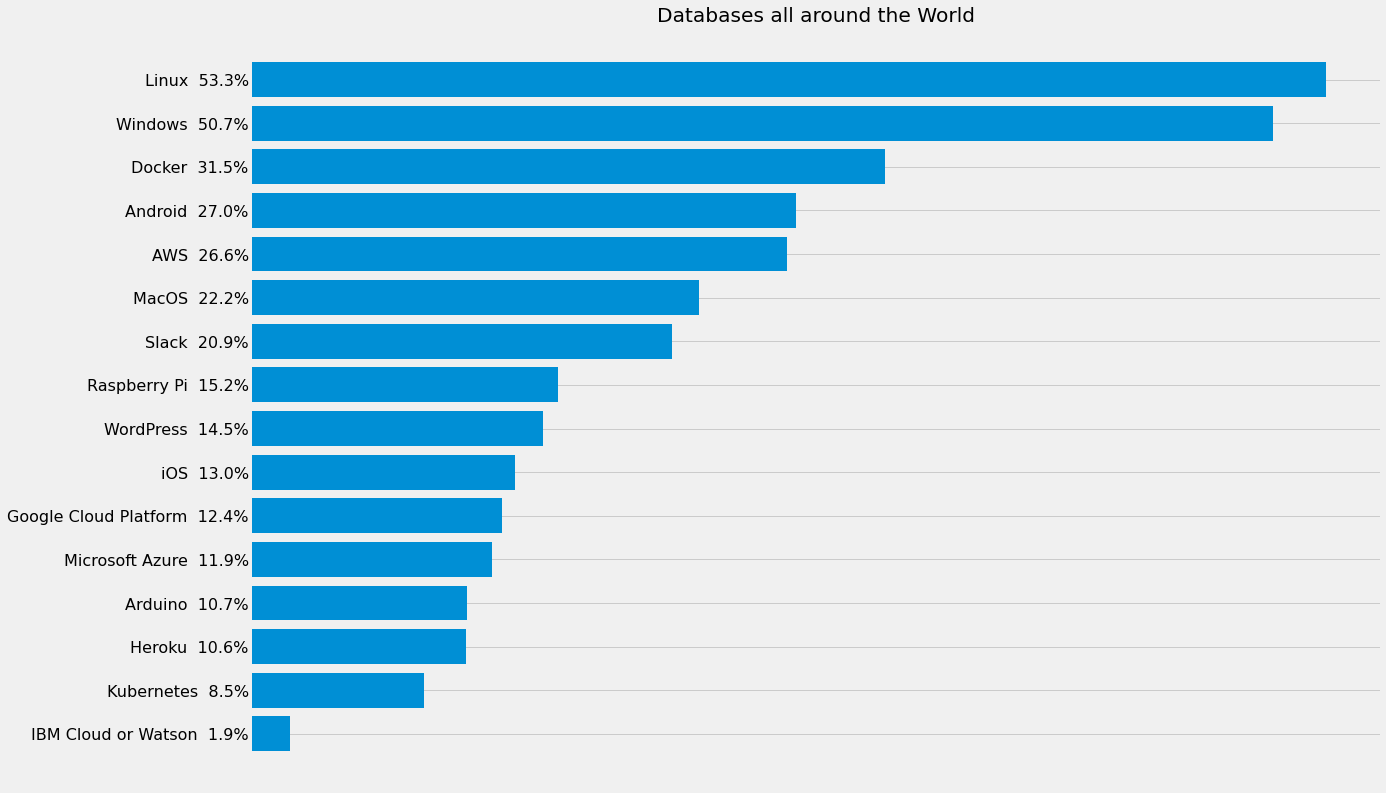

In [109]:
PlatformWorkedWith = data["PlatformWorkedWith"]
PlatformWorkedWith.dropna(inplace = True)

PlatformWorkedWith_no_others = []   #### ვქმნით ცარიელ სიას სადაც ვამატებთ ელემენტებს other-ების გარეშე (ცალკე მდომი other-ების გარეშე)


#### ამით ვამატებს LanguageWorkedWith_no_others- ის სიაში იმ ელემენტებს, სადაც არ არის ცალკე მდგომი other-ები.
for i in PlatformWorkedWith:
    if i == "Other(s):":
        a=6
    else:
       PlatformWorkedWith_no_others.append(i.split(";"))

union = []     #### ამ სიაში უნდა დავამატოთ other- ებისგან მთლიანად გაფილტრული ელემენტები

##### ვფილტრავთ მთელ სიას other- ებისგან (სხვა პასუხებთან ერთად მდგომი other- ებისგან)
for i in PlatformWorkedWith_no_others:
    for k in i:
        if k != "Other(s):":
           union.append(k)


counted = Counter(union)     ####### დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება

counted = sort_dict_by_value(counted, False)      ######## ალაგებს ელემენტებს რაოდენობების მიხედვით

key_Phrases = []       ######## ვქმნით ფრაზების შესანახ სიას
Quantity = []          ###### ვქმნით რაოდენობების შესანახ სიას


items = counted.items()      ########## დიქშენერის გარდაქმნის სიად


############ ალაგებს ფრაზებს და შესაბამის რაოდენობებს ცალ- ცალკე სიაში ##########
for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])


Build_Barh_sizes( key_Phrases , Quantity, PlatformWorkedWith_no_others ,"fivethirtyeight", False , (18,13), "Databases all around the World")   # ვაგებთ გრაფიკს


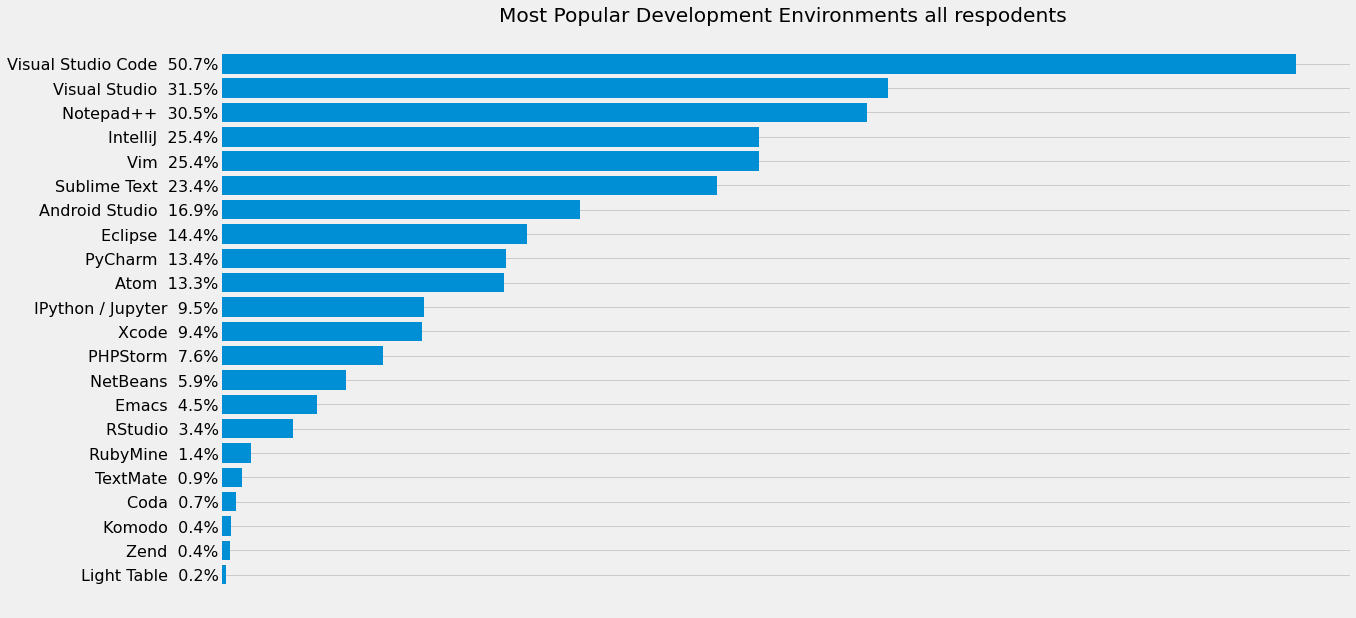

In [110]:
DevEnviron = data["DevEnviron"] #calling data from developer environment
DevEnviron.dropna(inplace = True) #filtering the data from empty and unnecessary answers

DevEnviron = DevEnviron.str.split(";")  #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(DevEnviron) #autosorting 

Build_Barh_sizes(key_Phrases, Quantity, DevEnviron, "fivethirtyeight", False , (18,10), "Most Popular Development Environments all respodents ") #b

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


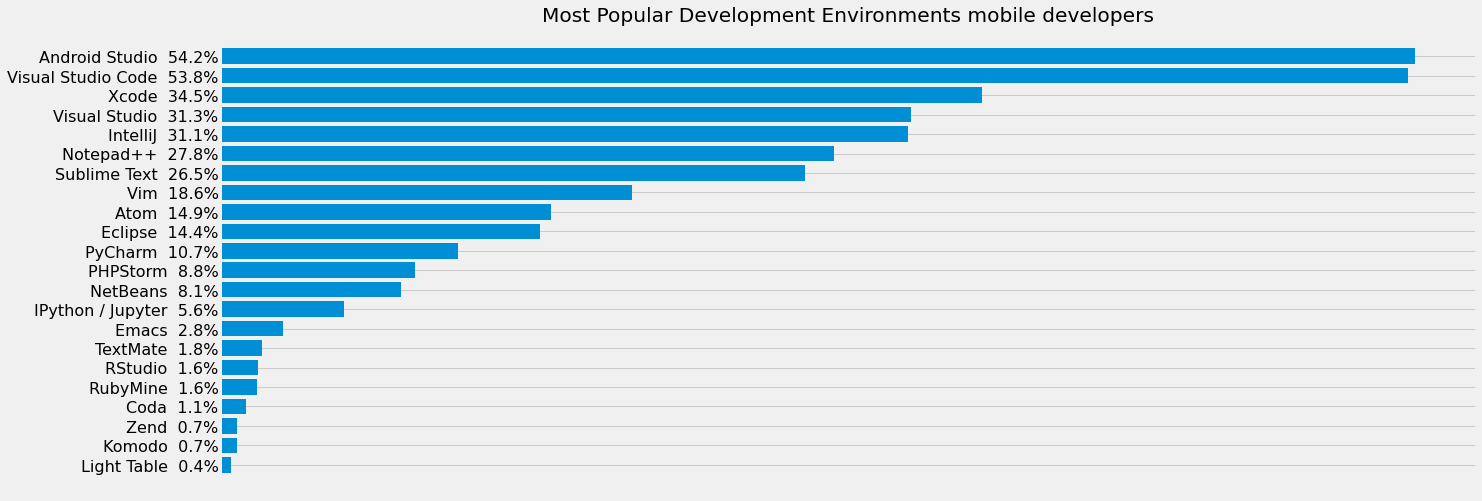

In [111]:
DevType = data["DevType"]    #calling data from developer types
DevType.dropna(inplace = True) #filtering the data from empty and unnecessary answers

#for saving setences where is shown the word "mobile" to find mobile developers
new_list = []

#finding sentences with "mobile" in it and adding new_list
for i in DevType:
    if "mobile" in i:
       new_list.append(i)

counted = Counter(new_list) #writing in dictionary and counting to avoid repeating 

#rewriting dictionary into list where there are 1 sentence with the word "mobile" in it
key_list = list(counted)


dev_environment = data["DevEnviron"] #calling data fom developer environment


all_ifo = [] #list where the combined data will be added

#preparing data to add to all_info
for i in key_list:
    new_data = data[(dev_environment != "Nan") & (data["DevType"] == i) ] #combining data from developer environment and devtype (devtype data should match key_list items)

    new_DevEnviron = new_data['DevEnviron'] #save the combined data in new variable 
    new_DevEnviron.dropna(inplace = True) #filtering the data from empty and unnecessary answers
    
    #adding data to all_info
    for i in new_DevEnviron:
        all_ifo.append(i.split(";")) #adding data to all_info and fracturing at (;)-s




list_sorter_counter(all_ifo) #autosorting

Build_Barh_sizes( key_Phrases , Quantity, all_ifo ,"fivethirtyeight", False , (20,8), "Most Popular Development Environments mobile developers") #building ba

In [112]:
DevType = data["DevType"]    #calling data from developer types
DevType.dropna(inplace = True) #filtering the data from empty and unnecessary answers


#for saving sentences where is shown the word "SRE" or "DevOps" (to find matching)
list_with_SRE_and_Devops = []

#finding sentences with "SRE" or "DevOps" in it and adding list_with_SRE_and_Devops
for i in DevType:
    if "site reliability" in i or "DevOps" in i:
       list_with_SRE_and_Devops.append(i)


counted = Counter(list_with_SRE_and_Devops) #writing in dictionary and counting to avoid repeating 

#rewriting dictionary into list where there are 1 sentence with the word "DRE" or "DevOps" in it
key_list = list(counted)




dev_environment = data["DevEnviron"] #calling data fom developer environment

#list where the combined data will be added
devtype_with_enironment = []

#preparing data to add to all_info
for i in key_list:
    new_data = data[(dev_environment != "Nan") & (data["DevType"] == i) ] #combining data from developer environment and devtype (devtype data should match key_list items)

    new_DevEnviron = new_data['DevEnviron'] #save the combined data in new variable

    new_DevEnviron.dropna(inplace = True)  #filtering the data from empty and unnecessary answers

    #adding data to all_info
    for i in new_DevEnviron:
        devtype_with_enironment.append(i.split(";")) #adding data to all_info and fracturing at (;)-s




list_sorter_counter(devtype_with_enironment) #autosorting

Build_Barh_sizes( key_Phrases , Quantity, devtype_with_enironment ,"fivethirtyeight", False , (20,8), "Most Popular Development Environments SRE/DevOps") #

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [113]:
OpSys = data ["OpSys"]
OpSys.dropna(inplace = True)

counted = Counter(OpSys)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, OpSys ,"fivethirtyeight", False , (18,7), "Developers' Primary Operating Systems all around the World")   # ვაგებთ გრაფიკს





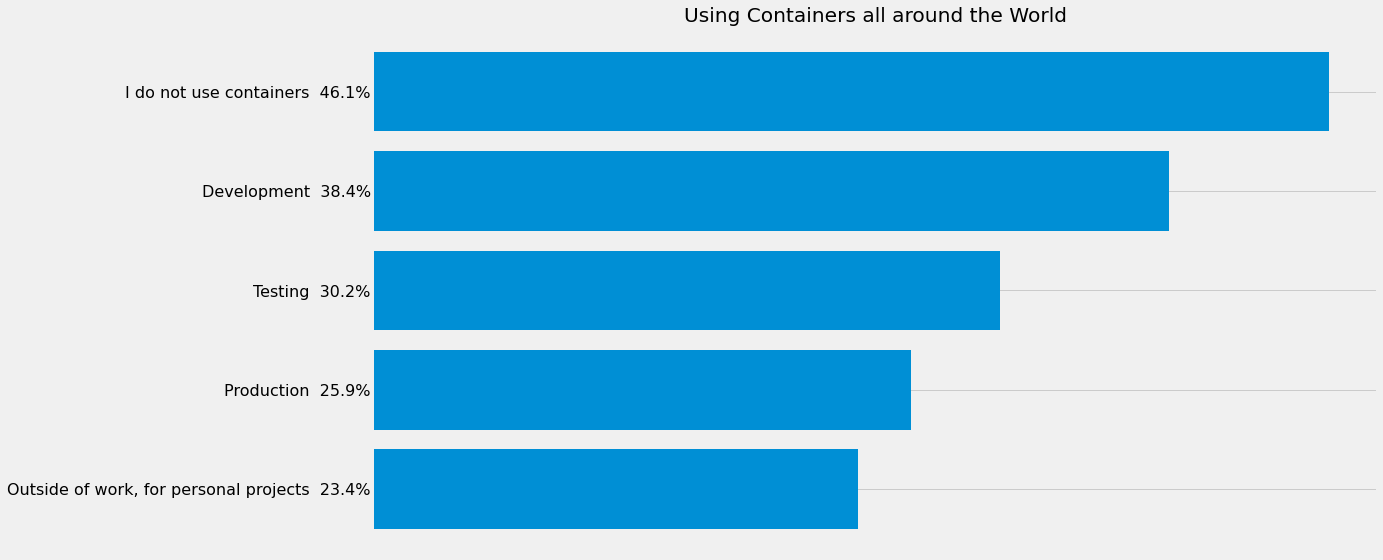

In [114]:
Containers = data["Containers"]
Containers.dropna(inplace = True)

Containers = Containers.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში


list_sorter_counter(Containers)  # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, Containers ,"fivethirtyeight", False , (16,9), "Using Containers all around the World") # ვაგებთ გრაფიკს



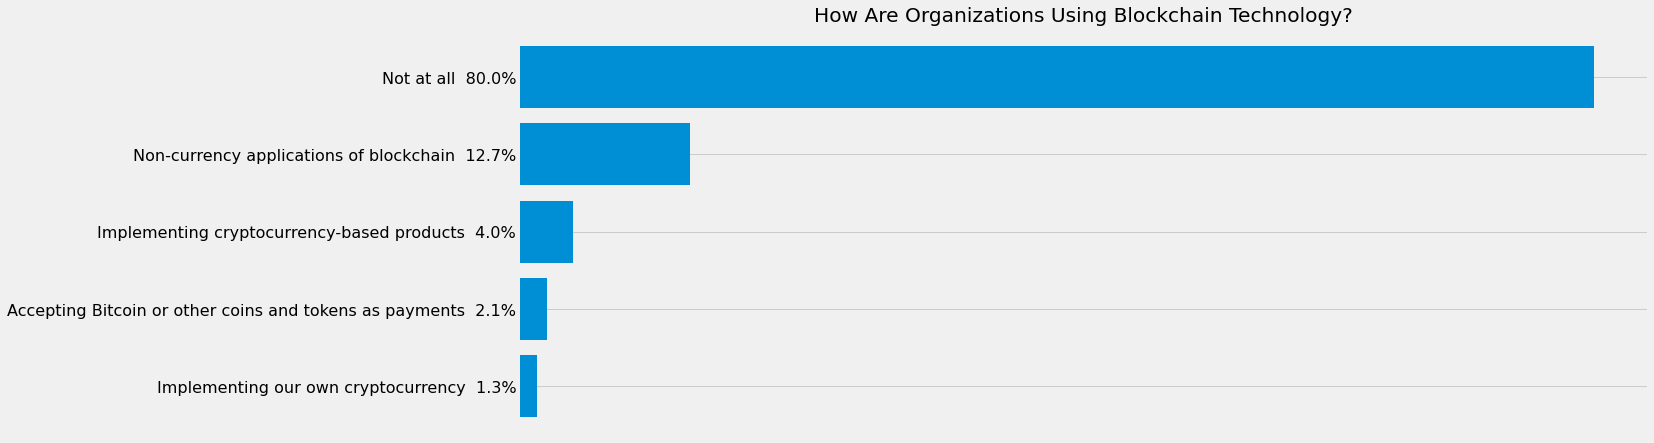

In [115]:
BlockchainOrg = data["BlockchainOrg"]
BlockchainOrg.dropna(inplace = True)

counted = Counter(BlockchainOrg)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, BlockchainOrg ,"fivethirtyeight", False , (18,7), "How Are Organizations Using Blockchain Technology?")   # ვაგებთ გრაფიკს



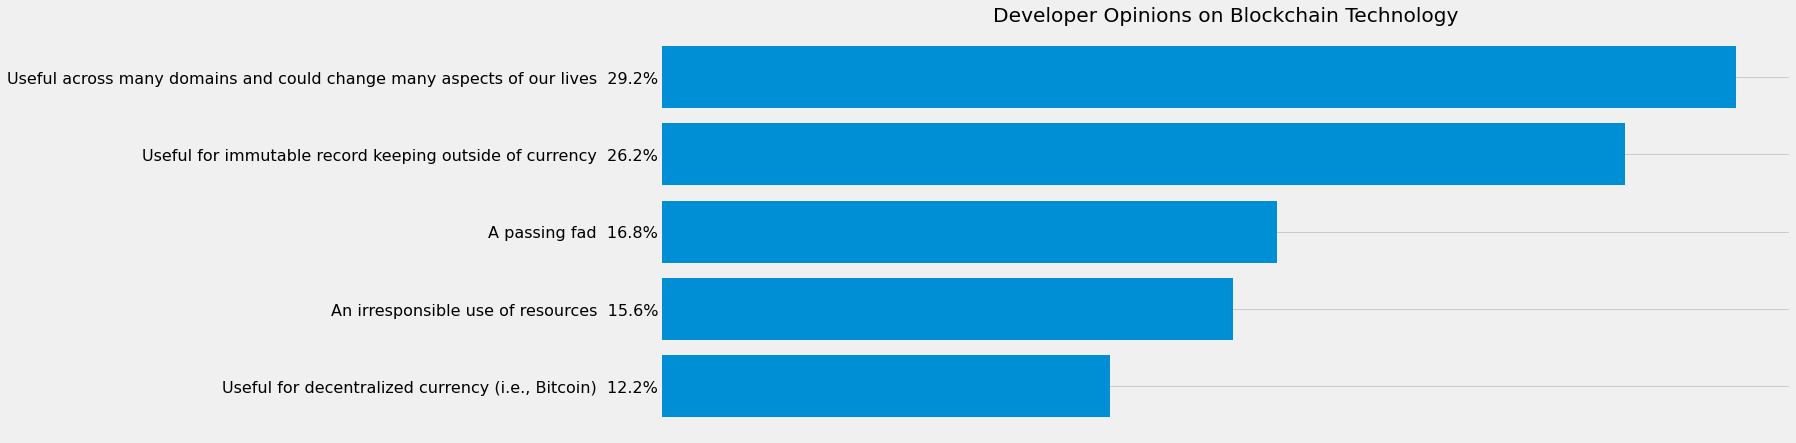

In [116]:
BlockchainIs = data["BlockchainIs"]
BlockchainIs.dropna(inplace = True)

counted = Counter(BlockchainIs)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, BlockchainIs ,"fivethirtyeight", False , (18,7), "Developer Opinions on Blockchain Technology")   # ვაგებთ გრაფიკს


In [117]:
Employment = data["Employment"]
Employment.dropna(inplace = True)

counted = Counter(Employment)  # ვითვლით UndergradMajor-ების პასუხებს
Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით UndergradMajor-ების პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, Employment ,"fivethirtyeight", False , (18,7), "Employment Status all around the world")   # ვაგებთ გრაფიკს


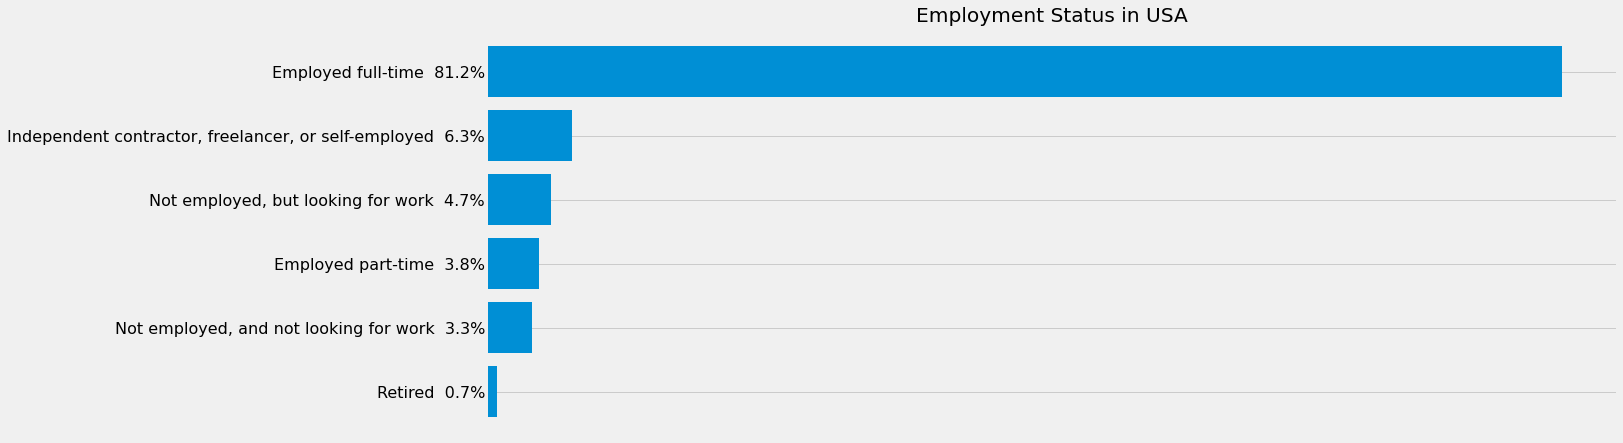

In [118]:
Employment_USA = data["Employment"]

Employment_USA.dropna(inplace = True)

Employment = data[(Employment_USA!= "NaN") & (data["Country"] == "United States")]  


New_Employment = Employment["Employment"]

counted = Counter(New_Employment)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Employment ,"fivethirtyeight", False , (18,7), "Employment Status in USA")   # ვაგებთ გრაფიკს


In [119]:
Employment_India = data["Employment"]

Employment_India.dropna(inplace = True)

Employment = data[(Employment_India!= "NaN") & (data["Country"] == "India")]  


New_Employment = Employment["Employment"]

counted = Counter(New_Employment)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Employment ,"fivethirtyeight", False , (18,7), "Employment Status in India")   # ვაგებთ გრაფიკს


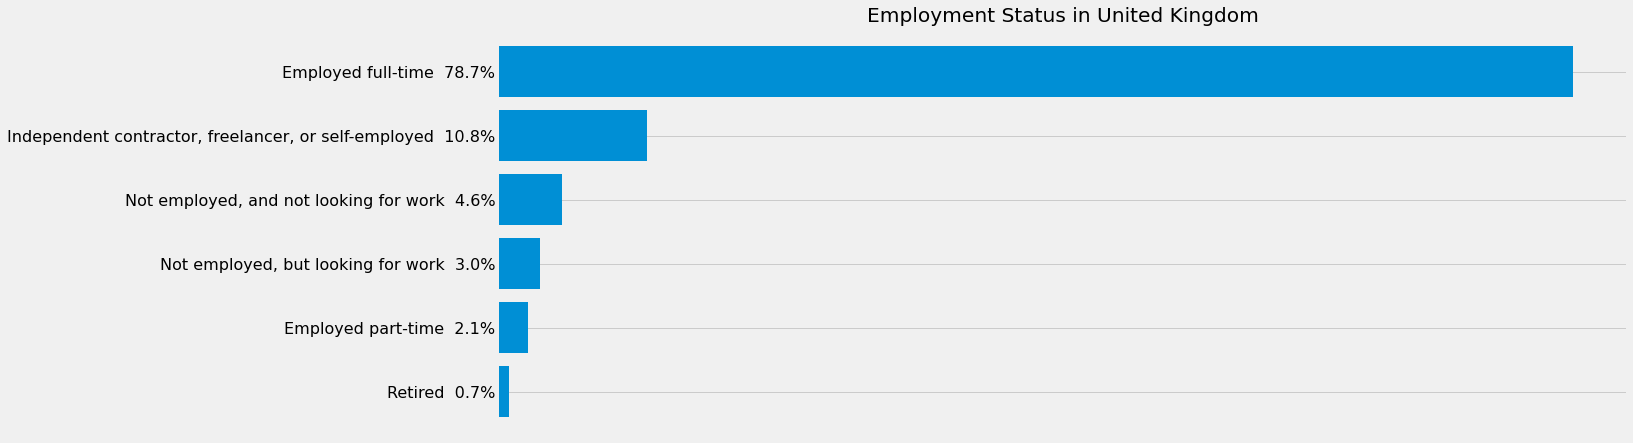

In [120]:
Employment_Kingdom = data["Employment"]

Employment_Kingdom.dropna(inplace = True)

Employment = data[(Employment_Kingdom!= "NaN") & (data["Country"] == "United Kingdom")]  


New_Employment = Employment["Employment"]

counted = Counter(New_Employment)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Employment ,"fivethirtyeight", False , (18,7), "Employment Status in United Kingdom")   # ვაგებთ გრაფიკს


In [121]:
Employment_Germany = data["Employment"]

Employment_Germany.dropna(inplace = True)

Employment = data[(Employment_Germany!= "NaN") & (data["Country"] == "Germany")]  


New_Employment = Employment["Employment"]

counted = Counter(New_Employment)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Employment ,"fivethirtyeight", False , (18,7), "Employment Status in Germany")   # ვაგებთ გრაფიკს


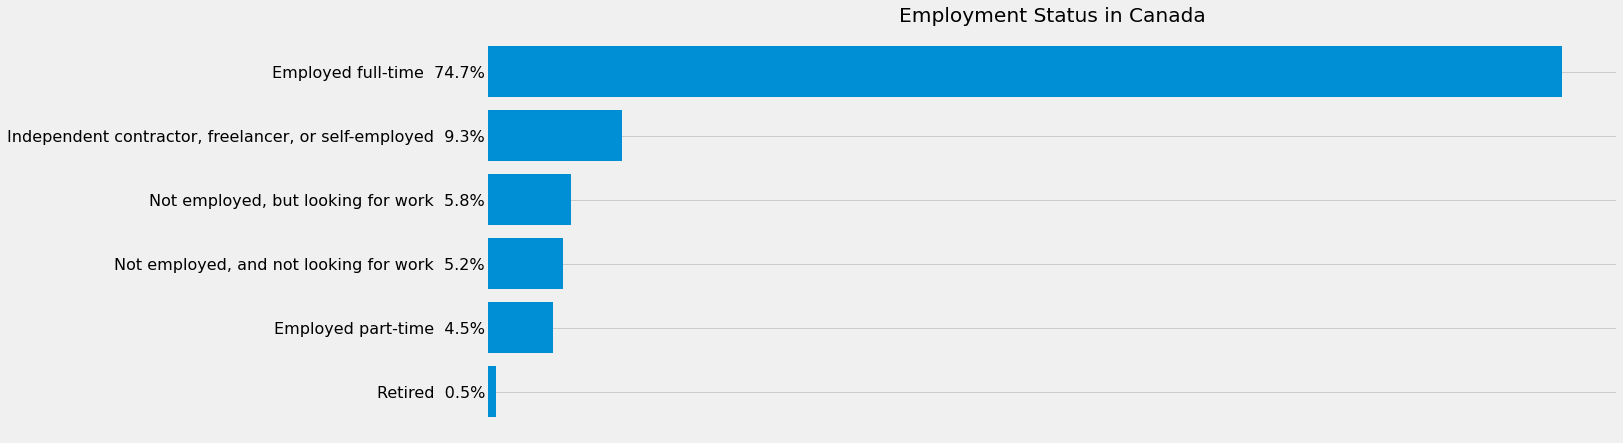

In [122]:
Employment_Canada = data["Employment"]

Employment_Canada.dropna(inplace = True)

Employment = data[(Employment_Canada!= "NaN") & (data["Country"] == "Canada")]  


New_Employment = Employment["Employment"]

counted = Counter(New_Employment)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Employment ,"fivethirtyeight", False , (18,7), "Employment Status in Canada")   # ვაგებთ გრაფიკს


                                     Company Type

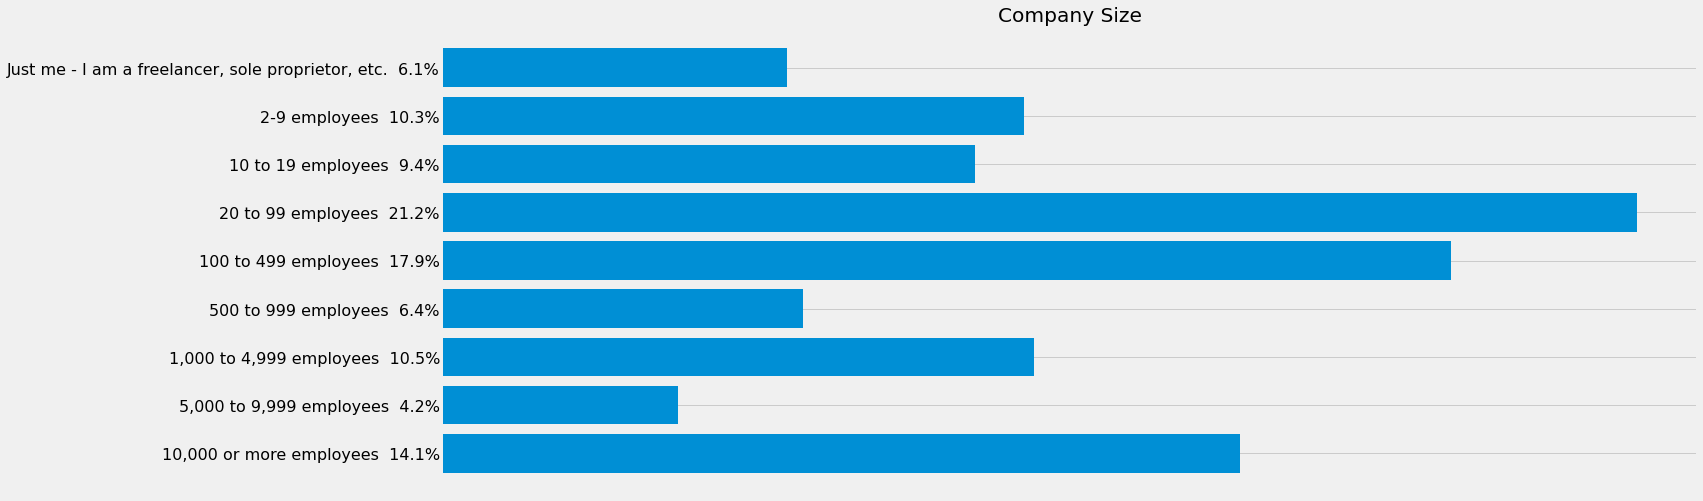

In [123]:
OrgSize = data["OrgSize"]
OrgSize.dropna(inplace = True)

counted = Counter(OrgSize) ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases = ["Just me - I am a freelancer, sole proprietor, etc.", "2-9 employees", "10 to 19 employees","20 to 99 employees",
"100 to 499 employees", "500 to 999 employees", "1,000 to 4,999 employees", "5,000 to 9,999 employees", "10,000 or more employees"]

########## ვქმნით რაოდენობების ცარიელ სიას
Quantity =[]

####### ფრაზების თითოეული ელემეტის შესაბამის რაოდენობებს ვამატებთ რაოდენობის ცარიელ სიაში ########
for i in key_Phrases:
    Quantity.append(counted[i])

key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes( key_Phrases , Quantity, OrgSize ,"fivethirtyeight", False , (20,8), "Company Size")  ### ვაგებთ გრაფიკს

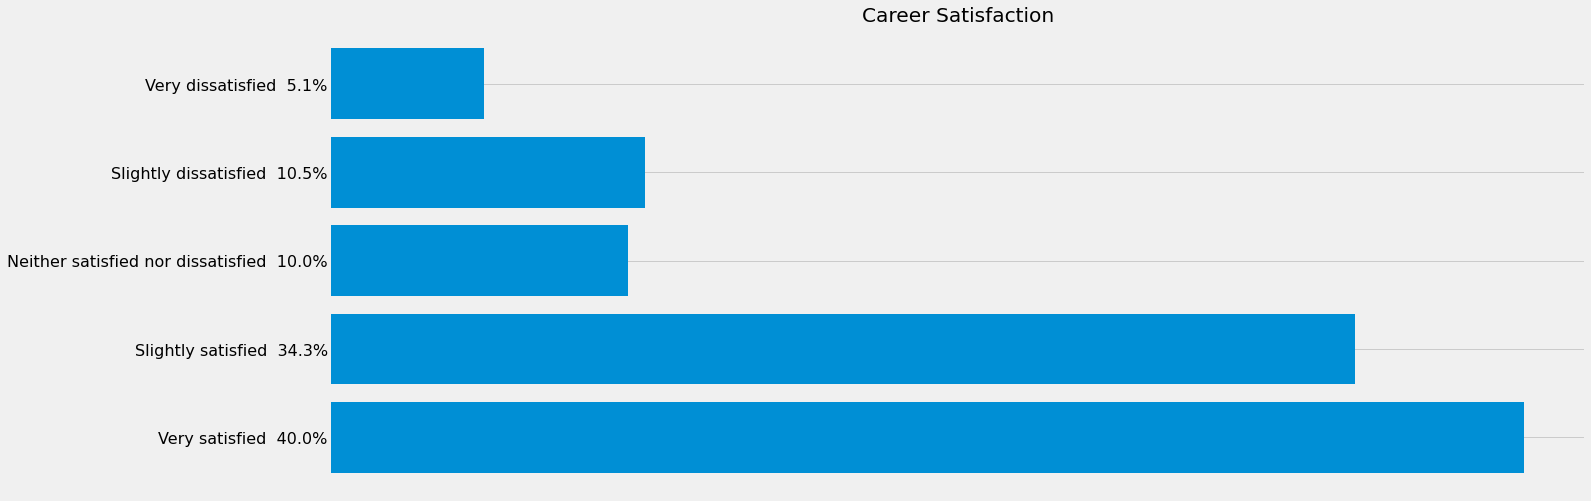

In [124]:
CareerSat = data["CareerSat"]
CareerSat.dropna(inplace = True)

counted = Counter(CareerSat) ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases = ["Very satisfied", "Slightly satisfied", "Neither satisfied nor dissatisfied", "Slightly dissatisfied", "Very dissatisfied"]

########## ვქმნით რაოდენობების ცარიელ სიას
Quantity = []

####### ფრაზების თითოეული ელემეტის შესაბამის რაოდენობებს ვამატებთ რაოდენობის ცარიელ სიაში ########
for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, CareerSat ,"fivethirtyeight", False , (20,8), "Career Satisfaction")  ####### ვაგებთ გრაფიკს

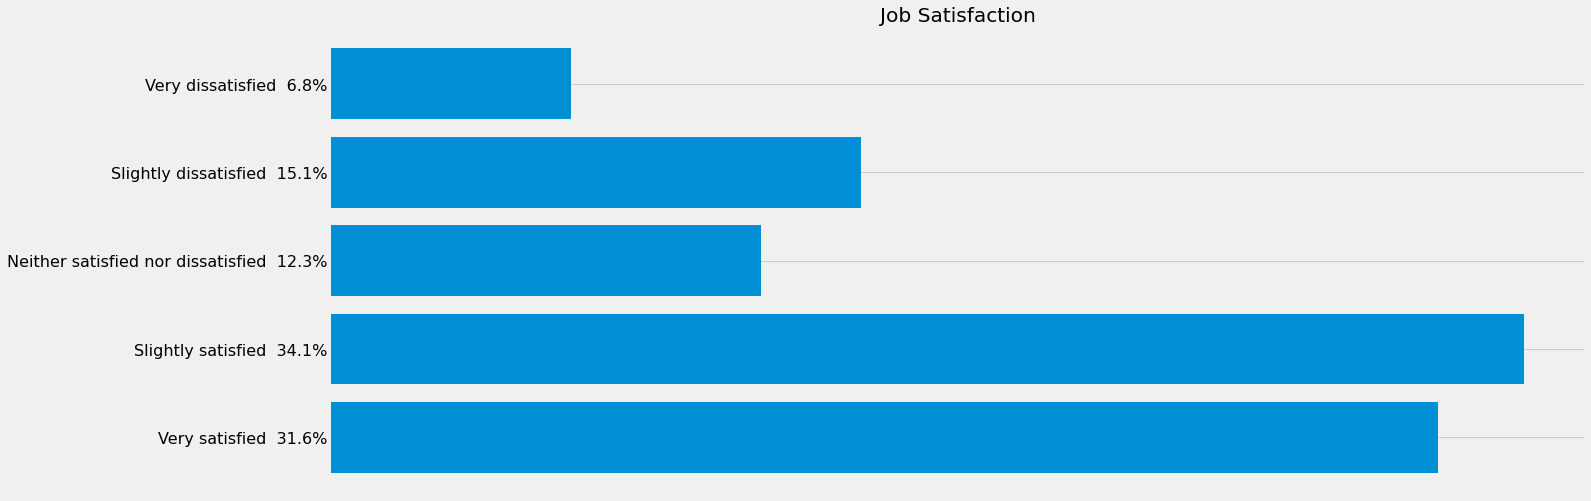

In [125]:
JobSat =  data["JobSat"]
JobSat.dropna(inplace = True)

counted = Counter(JobSat)   ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases = ["Very satisfied", "Slightly satisfied", "Neither satisfied nor dissatisfied", "Slightly dissatisfied", "Very dissatisfied"]

########## ვქმნით რაოდენობების ცარიელ სიას
Quantity = []

####### ფრაზების თითოეული ელემეტის შესაბამის რაოდენობებს ვამატებთ რაოდენობის ცარიელ სიაში ########
for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, JobSat ,"fivethirtyeight", False , (20,8), "Job Satisfaction")  ### ვაგებთ გრაფიკს



In [126]:
confidence = data["MgrIdiot"]
confidence.dropna(inplace  = True)

counted = Counter(confidence)   ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases = ["I don't have a manager", "Not at all confident", "Somewhat confident", "Very confident"]

########## ვქმნით რაოდენობების ცარიელ სიას
Quantity = []

####### ფრაზების თითოეული ელემეტის შესაბამის რაოდენობებს ვამატებთ რაოდენობის ცარიელ სიაში ########
for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, confidence ,"fivethirtyeight", False , (20,8), "How Confident Are Developers in Their Managers?") ### ვაგებთ გრაფიკს

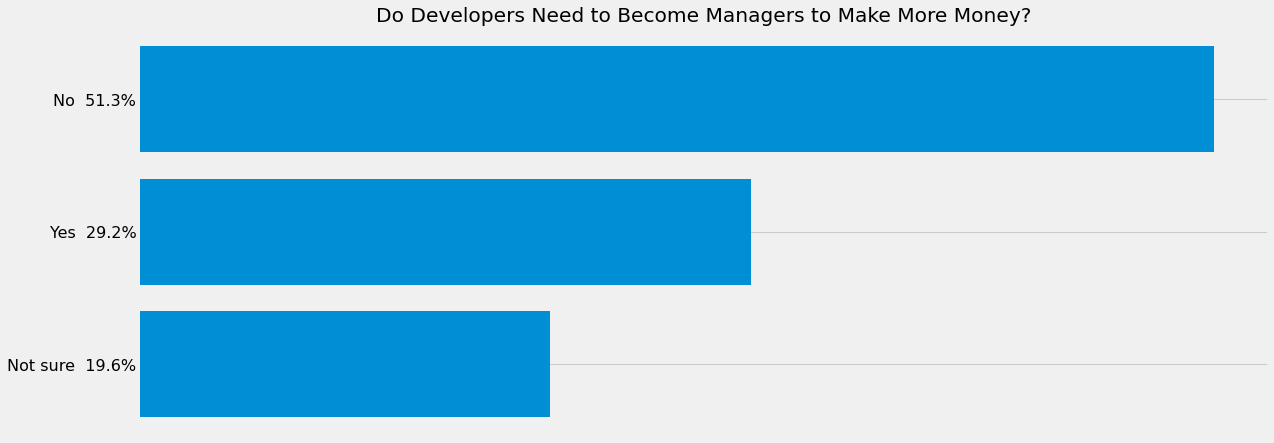

In [127]:
MgrMoney = data["MgrMoney"]
MgrMoney.dropna(inplace = True)

counted = Counter(MgrMoney)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, MgrMoney ,"fivethirtyeight", False , (18,7), "Do Developers Need to Become Managers to Make More Money?")   # ვაგებთ გრაფიკს



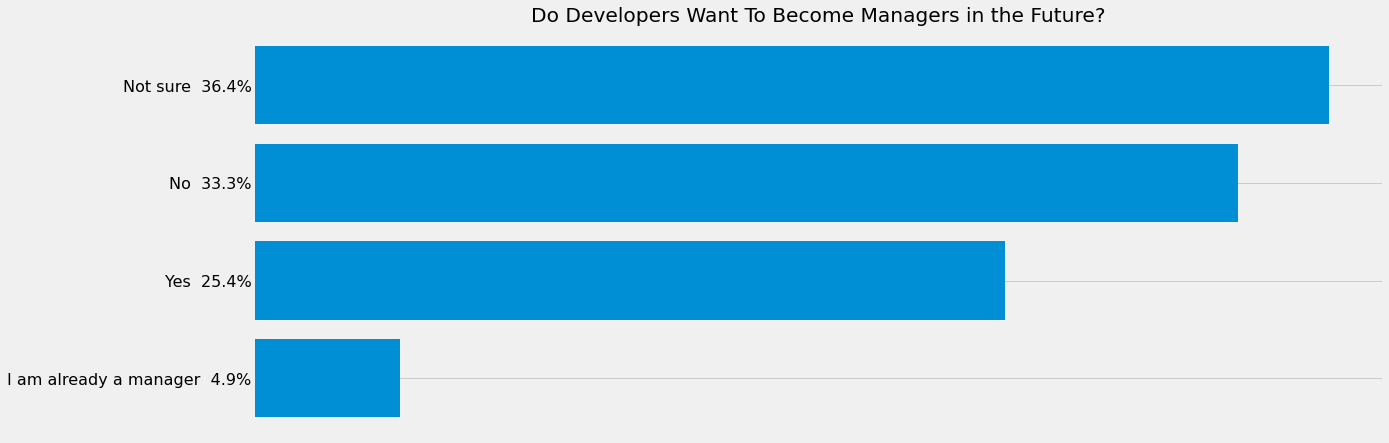

In [128]:
MgrWant = data["MgrWant"]
MgrWant.dropna(inplace = True)

counted = Counter(MgrWant)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, MgrWant ,"fivethirtyeight", False , (18,7), "Do Developers Want To Become Managers in the Future?")   # ვაგებთ გრაფიკს


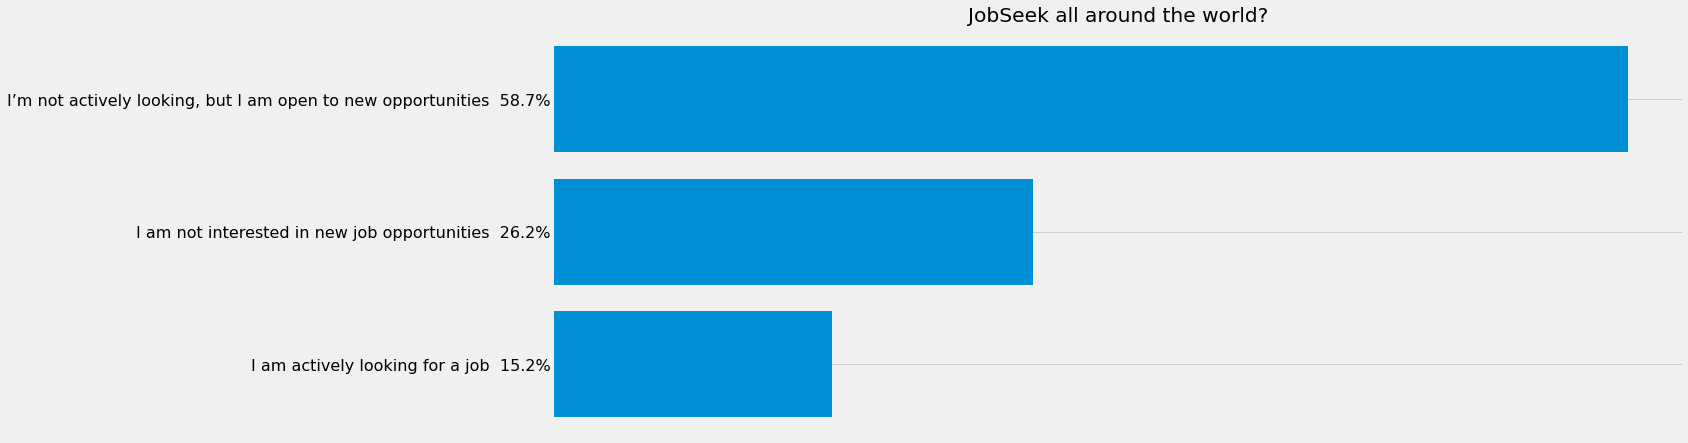

In [129]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace = True)

counted = Counter(JobSeek)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, JobSeek ,"fivethirtyeight", False , (18,7), "JobSeek all around the world?")   # ვაგებთ გრაფიკს


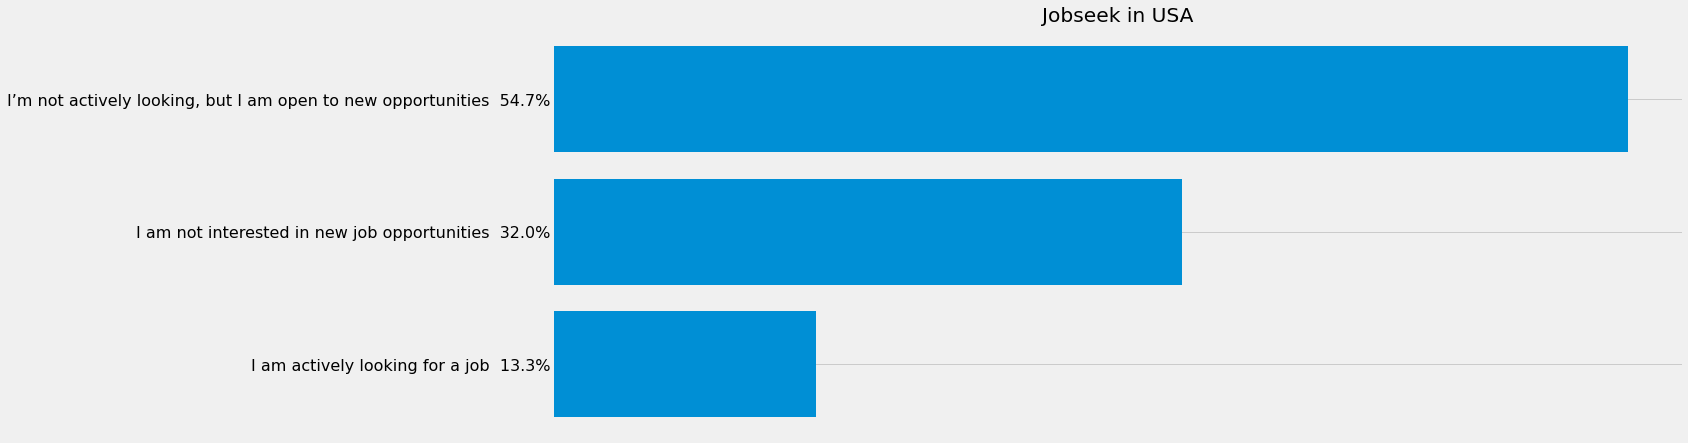

In [130]:

JobSeek_USA = data["JobSeek"]

JobSeek_USA.dropna(inplace = True)

JobSeek = data[(JobSeek_USA!= "NaN") & (data["Country"] == "United States")]  


New_JobSeek = JobSeek["JobSeek"]

counted = Counter(New_JobSeek)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_JobSeek ,"fivethirtyeight", False , (18,7), "Jobseek in USA")   # ვაგებთ გრაფიკს


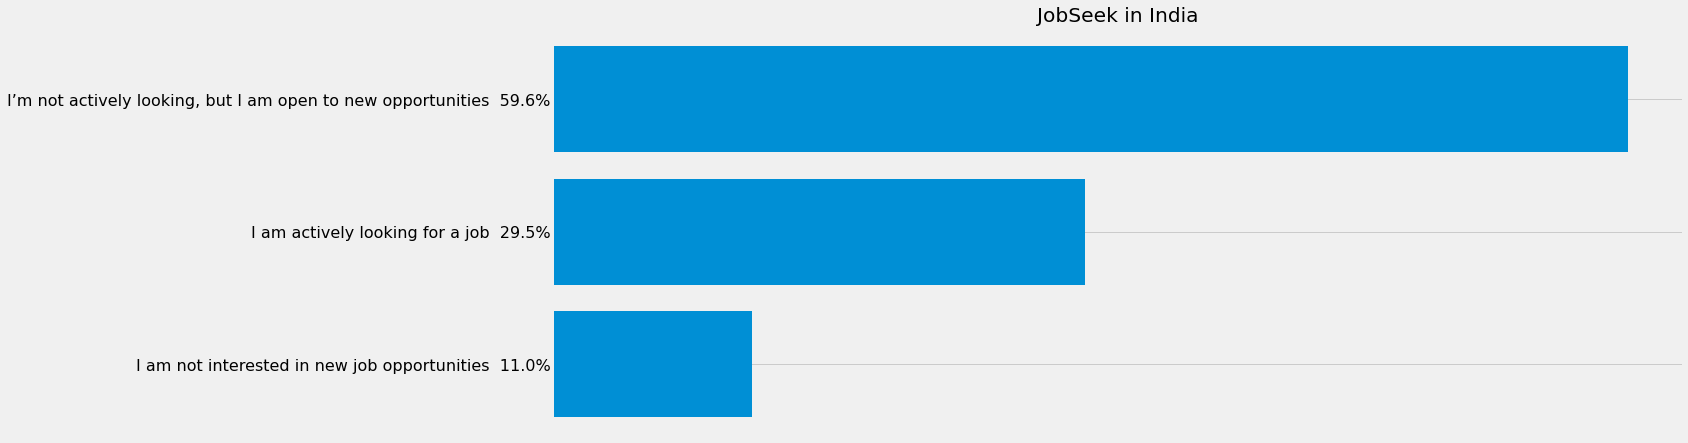

In [131]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace = True)

JobSeek_India = data[(JobSeek!="NaN") & (data["Country"] == "India")]

New_JobSeek = JobSeek_India["JobSeek"]

counted = Counter(New_JobSeek)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_JobSeek ,"fivethirtyeight", False , (18,7), "JobSeek in India")   # ვაგებთ გრაფიკს


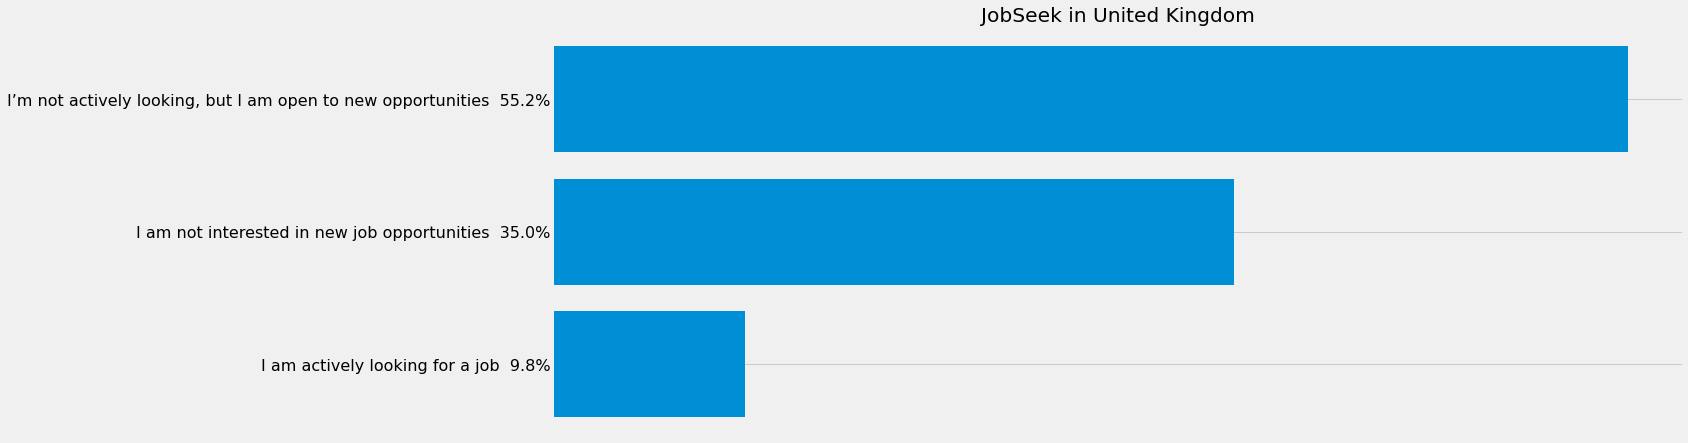

(5692,)

In [132]:
################# აქ შეცდომა მაქვს

JobSeek = data["JobSeek"]
JobSeek.dropna(inplace = True)

JobSeek_UK = data [(JobSeek != "nan") & ((data["Country"] == "United Kingdom") | (data["Country"] == "Iceland") | (data["Country"] == "Ireland") )] #combining Jobseek and UK's data

New_JobSeek = JobSeek_UK["JobSeek"]

counted = Counter(New_JobSeek)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_JobSeek ,"fivethirtyeight", False , (18,7), "JobSeek in United Kingdom")   # ვაგებთ გრაფიკს
New_JobSeek.shape

In [133]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace = True)

JobSeek_India = data[(JobSeek!="NaN") & (data["Country"] == "Germany")]

New_JobSeek = JobSeek_India["JobSeek"]

counted = Counter(New_JobSeek)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_JobSeek ,"fivethirtyeight", False , (18,7), "JobSeek in United Kingdom")   # ვაგებთ გრაფიკს


In [134]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace = True)

JobSeek_India = data[(JobSeek!="NaN") & (data["Country"] == "Canada")]

New_JobSeek = JobSeek_India["JobSeek"]

counted = Counter(New_JobSeek)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_JobSeek ,"fivethirtyeight", False , (18,7), "JobSeek in United Kingdom")   # ვაგებთ გრაფიკს


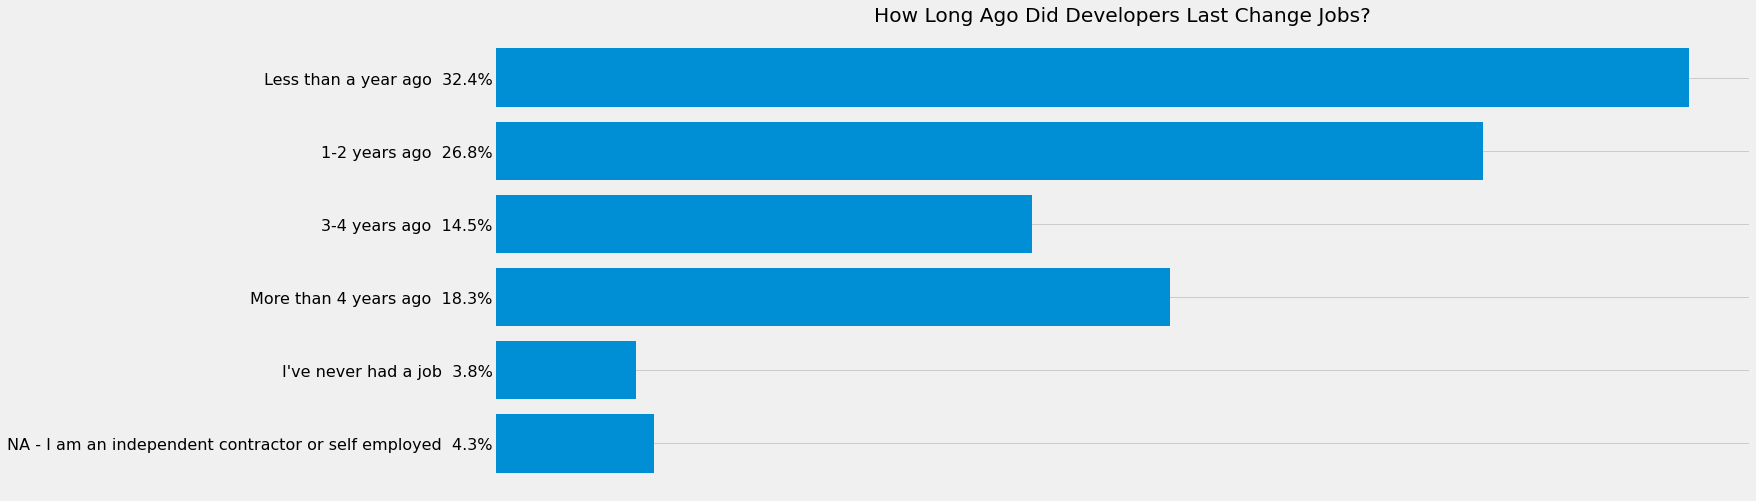

In [135]:
LastHireDate = data["LastHireDate"]
LastHireDate.dropna(inplace =True)

counted  = Counter(LastHireDate)  ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases  =["NA - I am an independent contractor or self employed",
                "I've never had a job", "More than 4 years ago", "3-4 years ago", 
                "1-2 years ago", "Less than a year ago"]

######### ვქმნით რაოდენობის შესანახ ცარიელ სიას #########
Quantity = []

###### ვანაწილებთ ფრაზებს რაოდენობების მიხედვით
for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, LastHireDate ,"fivethirtyeight", False , (20,8), "How Long Ago Did Developers Last Change Jobs?")


In [136]:
LastInt = data["LastInt"]
LastInt.dropna(inplace = True)

LastInt = LastInt.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში

list_sorter_counter(LastInt)  ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს

Build_Barh_sizes( key_Phrases , Quantity, LastInt ,"fivethirtyeight", False , (18,7), "Most common interview practices")   # ვაგებთ გრაფიკს



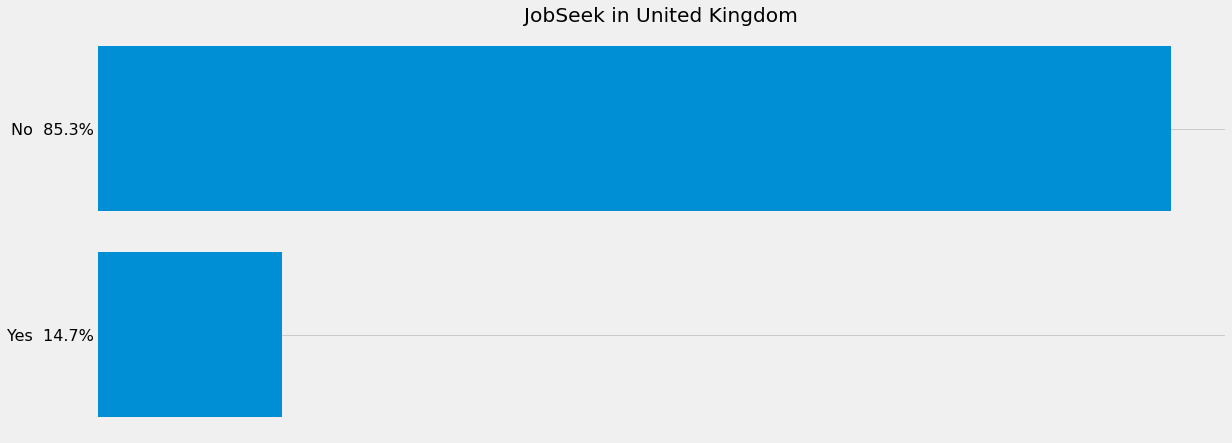

In [137]:
FizzBuzz = data["FizzBuzz"]
FizzBuzz.dropna(inplace = True)

counted = Counter(FizzBuzz)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, FizzBuzz ,"fivethirtyeight", False , (18,7), "JobSeek in United Kingdom")   # ვაგებთ გრაფიკს


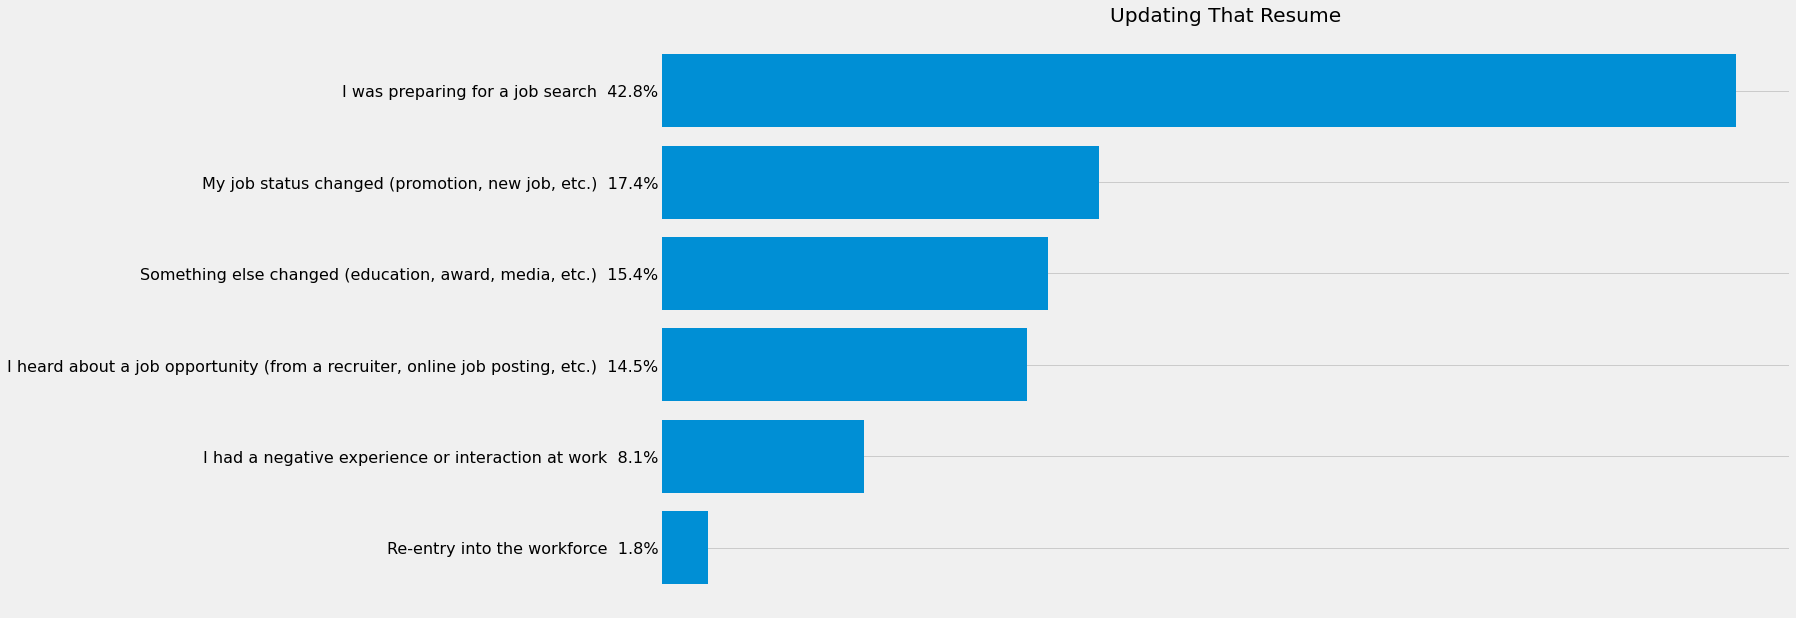

In [138]:
ResumeUpdate = data["ResumeUpdate"]
ResumeUpdate.dropna(inplace = True)

counted = Counter(ResumeUpdate)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, ResumeUpdate ,"fivethirtyeight", False , (18,10), "Updating That Resume")   # ვაგებთ გრაფიკს


In [139]:
JobFactors = data["JobFactors"]
JobFactors.dropna(inplace = True)

JobFactors = JobFactors.str.split(";")

list_sorter_counter(JobFactors)

Build_Barh_sizes( key_Phrases , Quantity, JobFactors ,"fivethirtyeight", False , (20,10), "Most Important Job Factors all over the world")



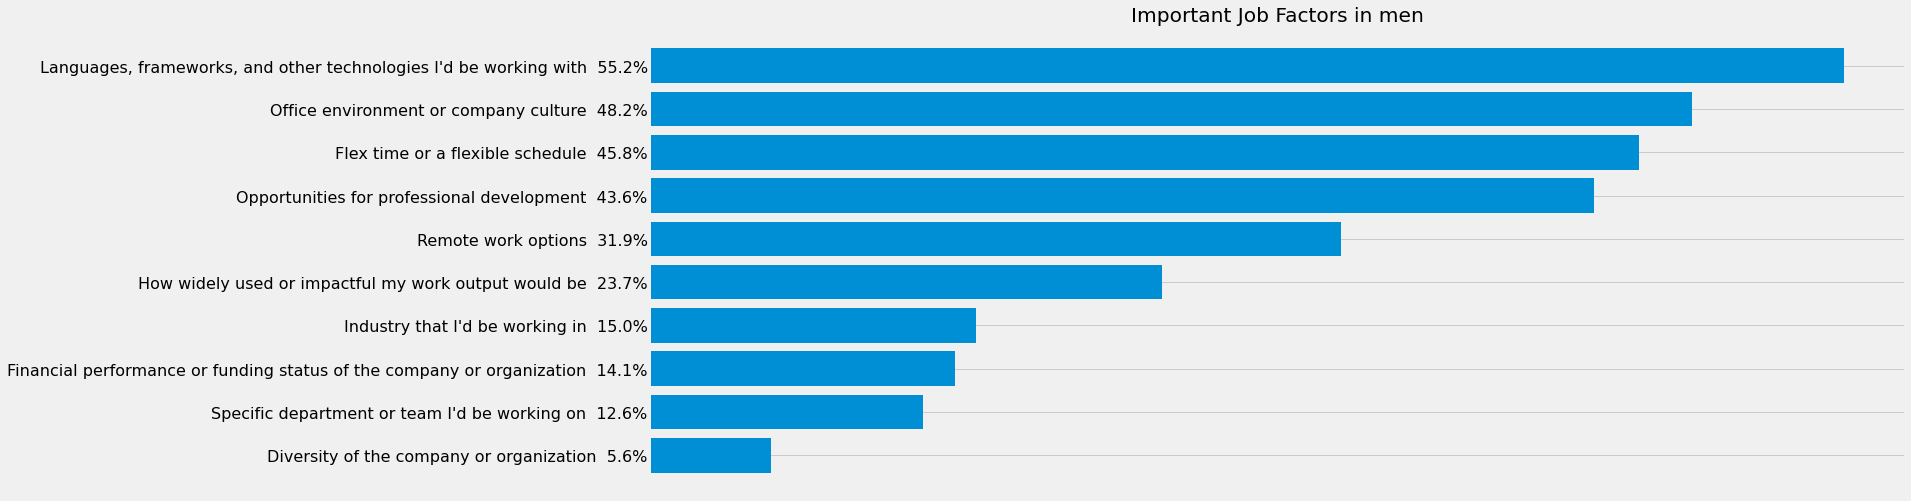

In [140]:
JobFactors  = data["JobFactors"]
JobFactors.dropna(inplace = True )

JobFactors_man =   data[ (JobFactors != "nan") & ((data["Gender"] == "Man") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
JobFactors_man = JobFactors_man["JobFactors"]
JobFactors_man = JobFactors_man.str.split(";")

list_sorter_counter(JobFactors_man)

Build_Barh_sizes( key_Phrases , Quantity, JobFactors_man ,"fivethirtyeight", False , (20,8), "Important Job Factors in men")



In [141]:
JobFactors  = data["JobFactors"]
JobFactors.dropna(inplace = True )

JobFactors_woman =   data[ (JobFactors != "nan") & ((data["Gender"] == "Woman") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
JobFactors_woman = JobFactors_woman["JobFactors"]
JobFactors_woman = JobFactors_woman.str.split(";")

list_sorter_counter(JobFactors_woman)

Build_Barh_sizes( key_Phrases , Quantity, JobFactors_woman ,"fivethirtyeight", False , (20,8), "Important Job Factors in women")


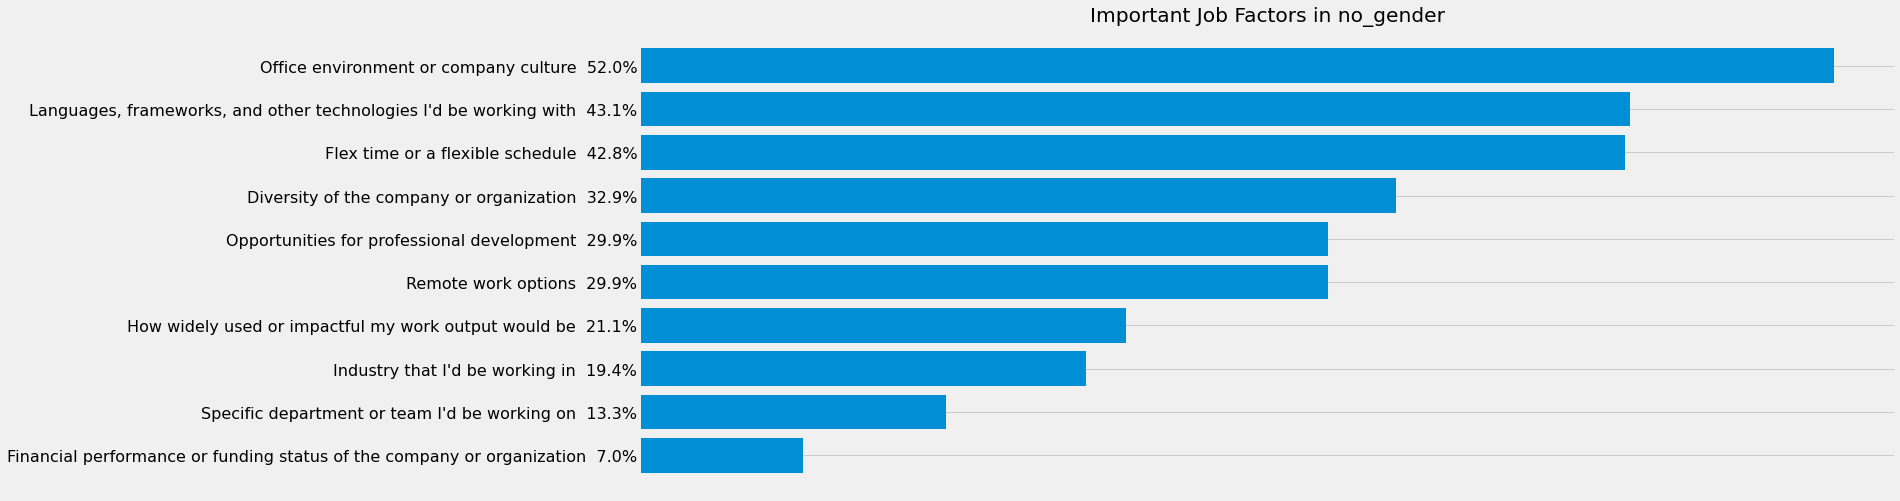

In [142]:
JobFactors  = data["JobFactors"]
JobFactors.dropna(inplace = True )

JobFactors_no_gender =   data[ (JobFactors != "nan") & ((data["Gender"] == "Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
JobFactors_no_gender = JobFactors_no_gender["JobFactors"]
JobFactors_no_gender = JobFactors_no_gender.str.split(";")

list_sorter_counter(JobFactors_no_gender)

Build_Barh_sizes( key_Phrases , Quantity, JobFactors_no_gender ,"fivethirtyeight", False , (20,8), "Important Job Factors in no_gender")


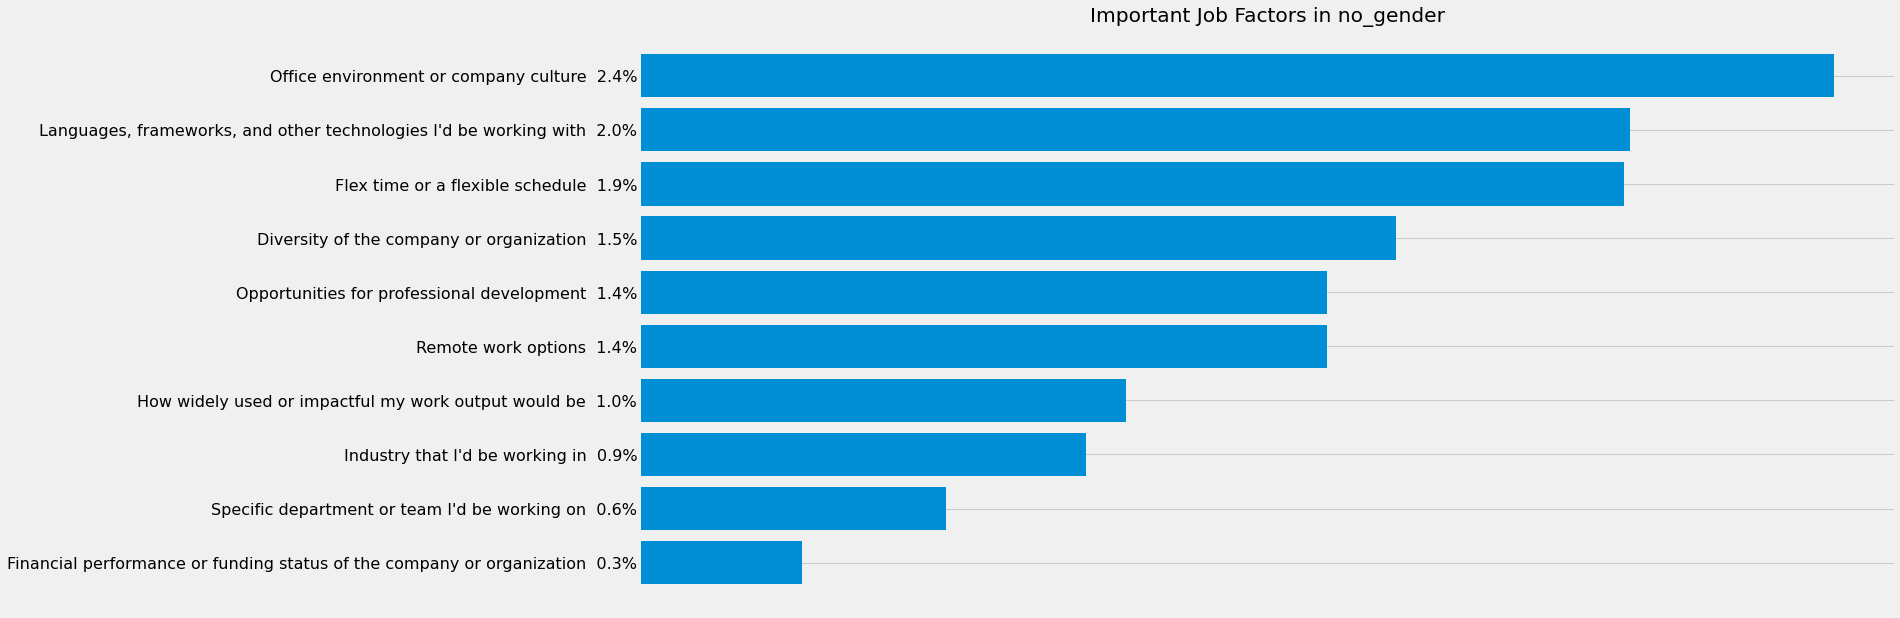

In [143]:
JobFactors  = data["JobFactors"]
JobFactors.dropna(inplace = True )

JobFactors_in_USA =   data[ (JobFactors != "nan") & (data["Country"] == "United States")]
JobFactors_in_USA = JobFactors_in_USA["JobFactors"]
JobFactors_in_USA = JobFactors_in_USA.str.split(";")

list_sorter_counter(JobFactors_no_gender)

Build_Barh_sizes( key_Phrases , Quantity, JobFactors_in_USA ,"fivethirtyeight", False , (20,10), "Important Job Factors in no_gender")


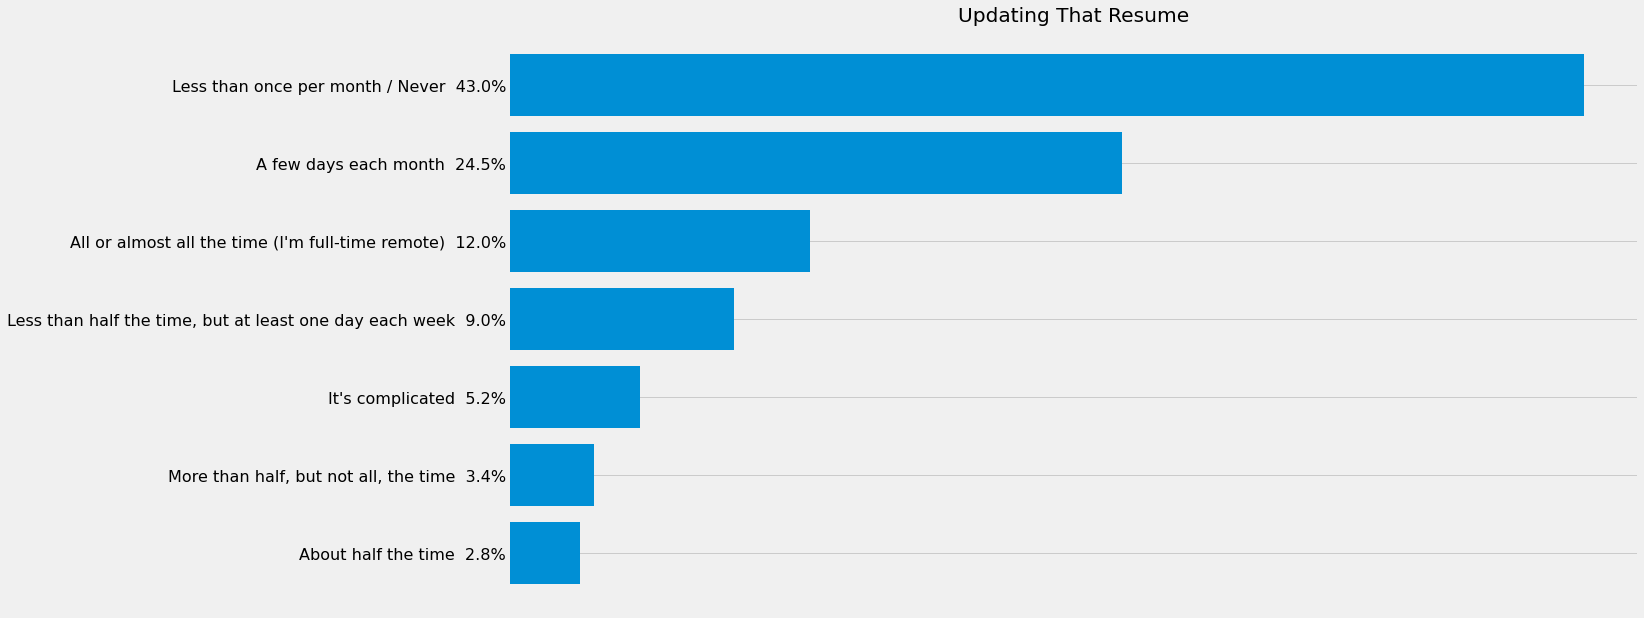

In [144]:
WorkRemote = data["WorkRemote"]
WorkRemote.dropna(inplace = True)

counted = Counter(WorkRemote)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, WorkRemote ,"fivethirtyeight", False , (18,10), "Updating That Resume")   # ვაგებთ გრაფიკს


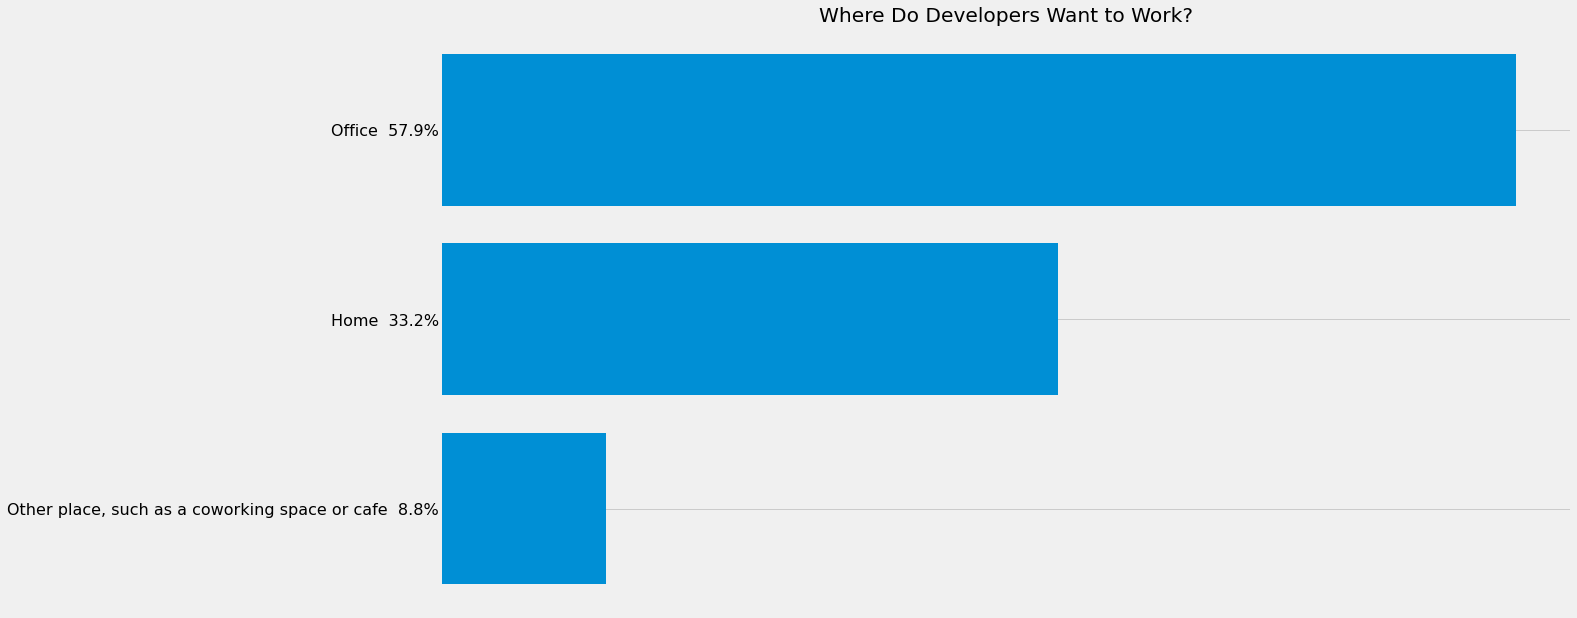

In [145]:
WorkLoc = data["WorkLoc"]
WorkLoc.dropna(inplace = True)

counted = Counter(WorkLoc)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, WorkLoc ,"fivethirtyeight", False , (18,10), "Where Do Developers Want to Work?")   # ვაგებთ გრაფიკს


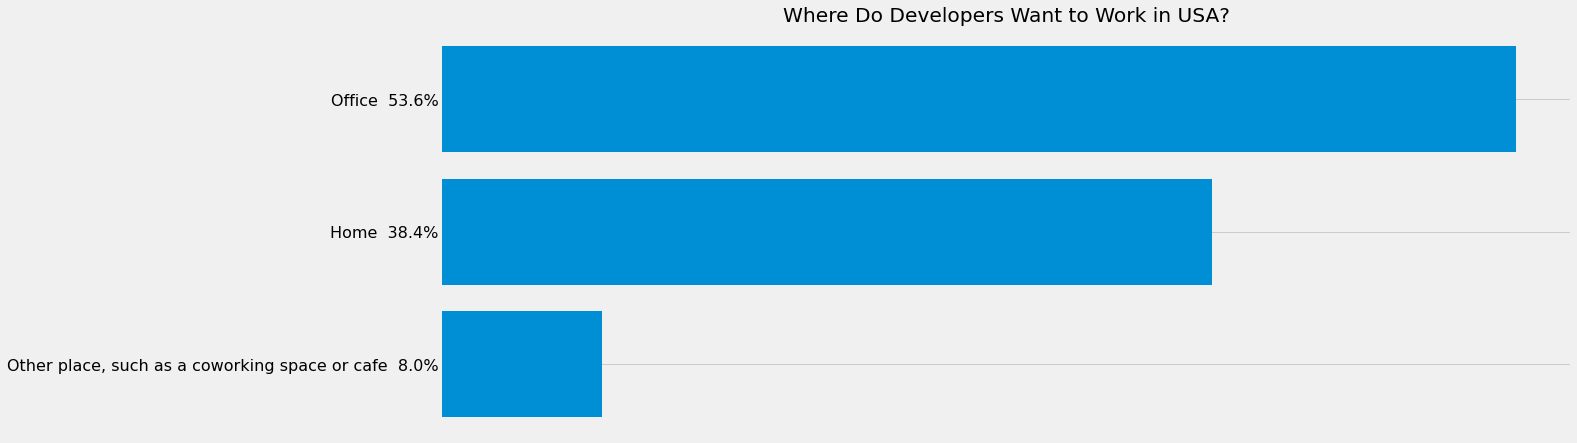

In [146]:
WorkLoc = data["WorkLoc"]
WorkLoc.dropna(inplace = True)

WorkLoc_USA = data[(WorkLoc!="NaN") & (data["Country"] == "United States")]

New_WorkLoc = WorkLoc_USA["WorkLoc"]

counted = Counter(New_WorkLoc)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_WorkLoc ,"fivethirtyeight", False , (18,7), "Where Do Developers Want to Work in USA?")   # ვაგებთ გრაფიკს

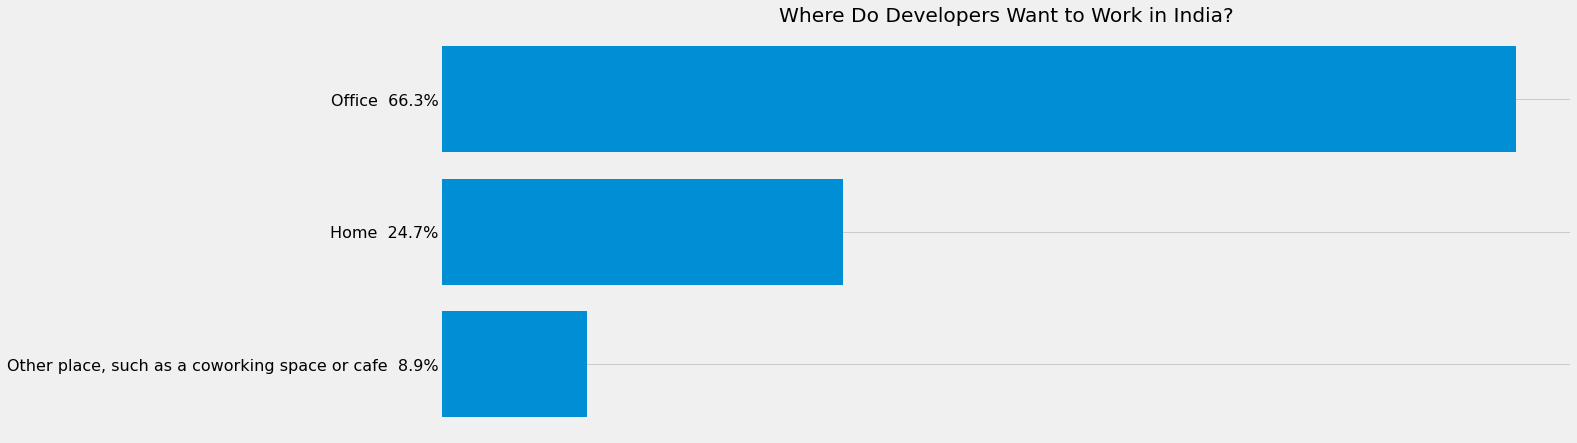

In [147]:
WorkLoc = data["WorkLoc"]
WorkLoc.dropna(inplace = True)

WorkLoc_India = data[(WorkLoc!="NaN") & (data["Country"] == "India")]

New_WorkLoc = WorkLoc_India["WorkLoc"]

counted = Counter(New_WorkLoc)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_WorkLoc ,"fivethirtyeight", False , (18,7), "Where Do Developers Want to Work in India?")   # ვაგებთ გრაფიკს

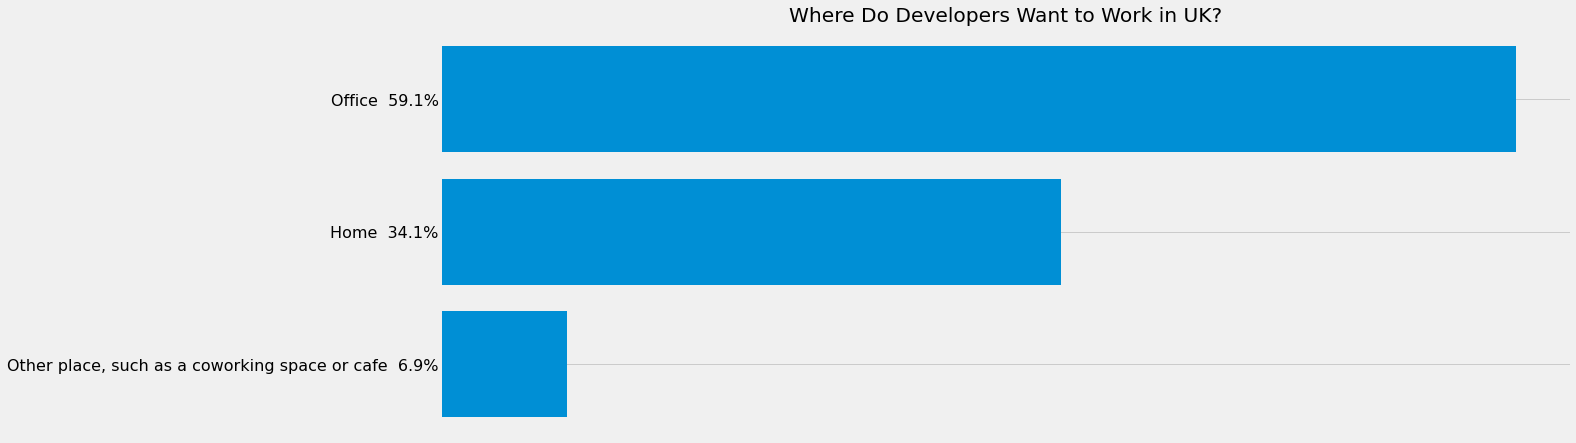

In [148]:
WorkLoc = data["WorkLoc"]
WorkLoc.dropna(inplace = True)

WorkLoc_UK = data[(WorkLoc!="NaN") & (data["Country"] == "United Kingdom")]

New_WorkLoc = WorkLoc_UK["WorkLoc"]

counted = Counter(New_WorkLoc)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_WorkLoc ,"fivethirtyeight", False , (18,7), "Where Do Developers Want to Work in UK?")   # ვაგებთ გრაფიკს

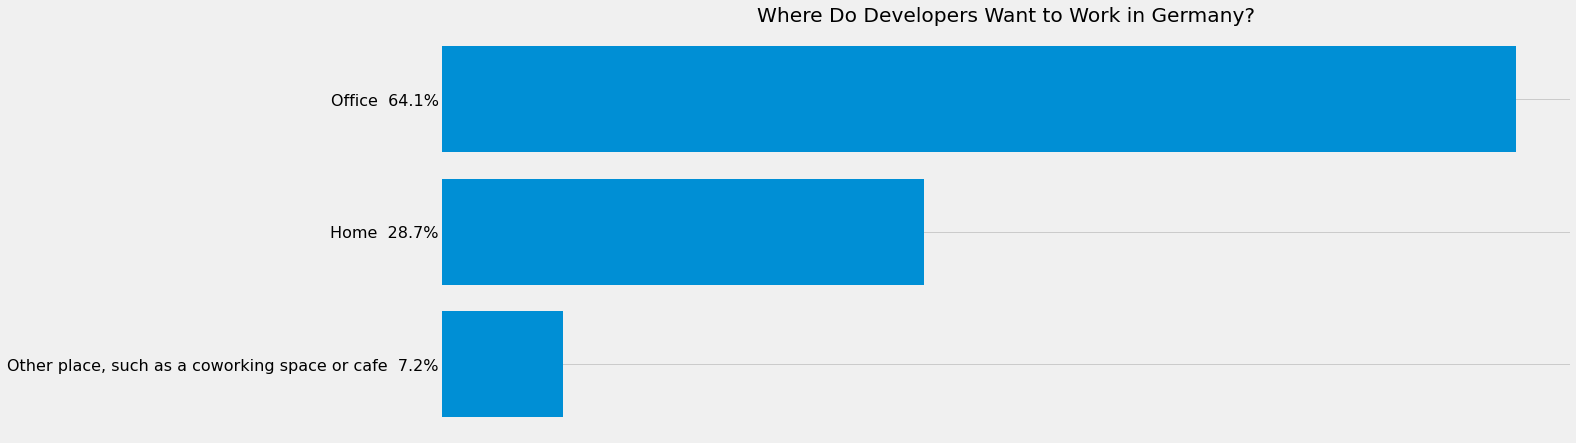

In [149]:
WorkLoc = data["WorkLoc"]
WorkLoc.dropna(inplace = True)

WorkLoc_Germany = data[(WorkLoc!="NaN") & (data["Country"] == "Germany")]

New_WorkLoc = WorkLoc_Germany["WorkLoc"]

counted = Counter(New_WorkLoc)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_WorkLoc ,"fivethirtyeight", False , (18,7), "Where Do Developers Want to Work in Germany?")   # ვაგებთ გრაფიკს

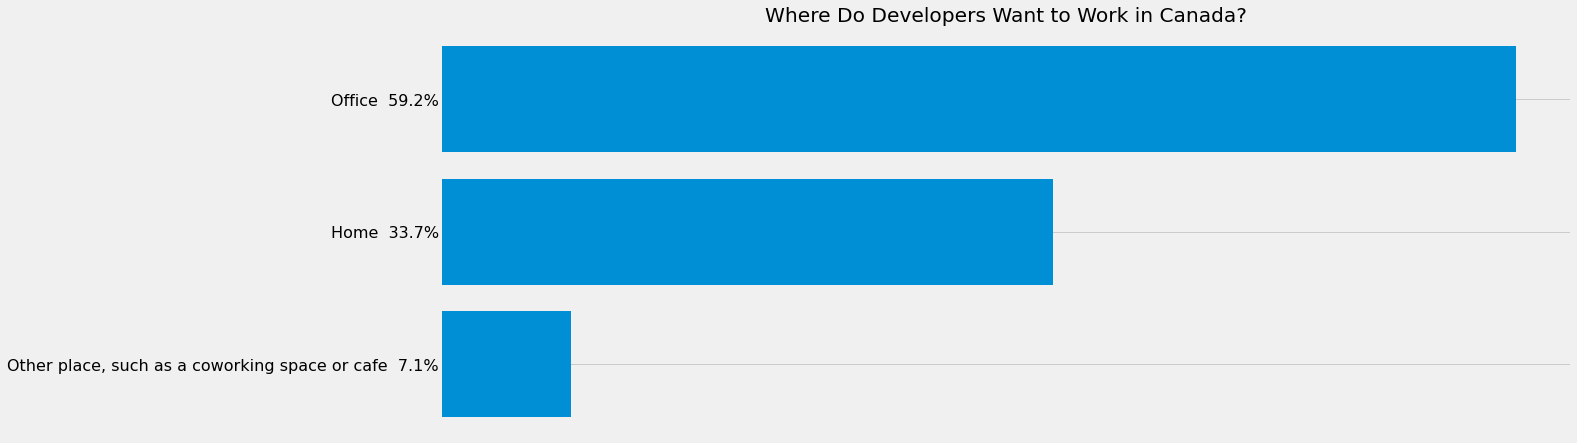

In [150]:
WorkLoc = data["WorkLoc"]
WorkLoc.dropna(inplace = True)

WorkLoc_Canada = data[(WorkLoc!="NaN") & (data["Country"] == "Canada")]

New_WorkLoc = WorkLoc_Canada["WorkLoc"]

counted = Counter(New_WorkLoc)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_WorkLoc ,"fivethirtyeight", False , (18,7), "Where Do Developers Want to Work in Canada?")   # ვაგებთ გრაფიკს

In [151]:
WorkPlan = data["WorkPlan"]
WorkPlan.dropna(inplace = True)

counted = Counter(WorkPlan) ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases = ["There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely", "There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns", "There's no schedule or spec; I work on what seems most important or urgent"]

########## ვქმნით რაოდენობების ცარიელ სიას
Quantity = []

####### ფრაზების თითოეული ელემეტის შესაბამის რაოდენობებს ვამატებთ რაოდენობის ცარიელ სიაში ########
for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, WorkPlan ,"fivethirtyeight", False , (20,8), "How Structured Is the Work of Developers?")  ####### ვაგებთ გრაფიკს




In [152]:
WorkChallenge = data["WorkChallenge"]
WorkChallenge.dropna(inplace= True)

WorkChallenge = WorkChallenge.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში
list_sorter_counter(WorkChallenge)  ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს


Build_Barh_sizes( key_Phrases , Quantity, WorkChallenge ,"fivethirtyeight", False , (18,7), "WorkChallenge all around the World")   # ვაგებთ გრაფიკს




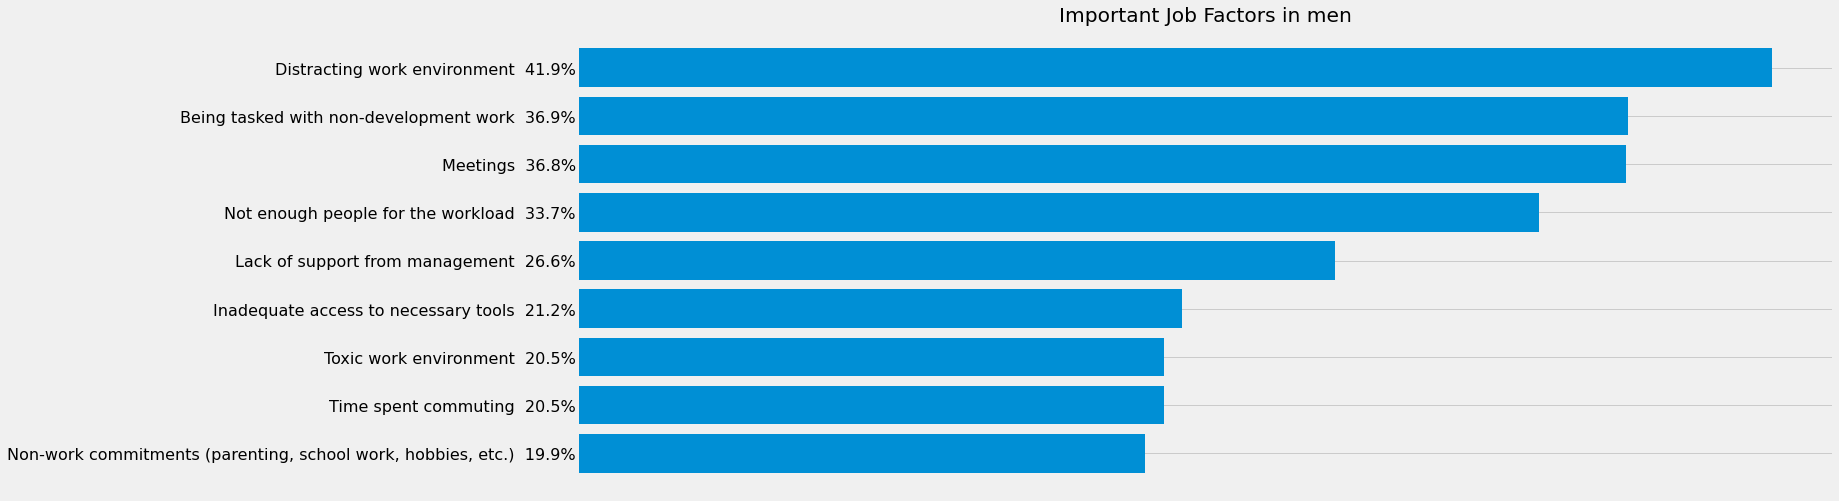

In [153]:
WorkChallenge  = data["WorkChallenge"]
WorkChallenge.dropna(inplace = True )

WorkChallenge_man =   data[ (WorkChallenge != "nan") & ((data["Gender"] == "Man") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
WorkChallenge_man = WorkChallenge_man["WorkChallenge"]
WorkChallenge_man = WorkChallenge_man.str.split(";")

list_sorter_counter(WorkChallenge_man)

Build_Barh_sizes( key_Phrases , Quantity, WorkChallenge_man ,"fivethirtyeight", False , (20,8), "Important Job Factors in men")


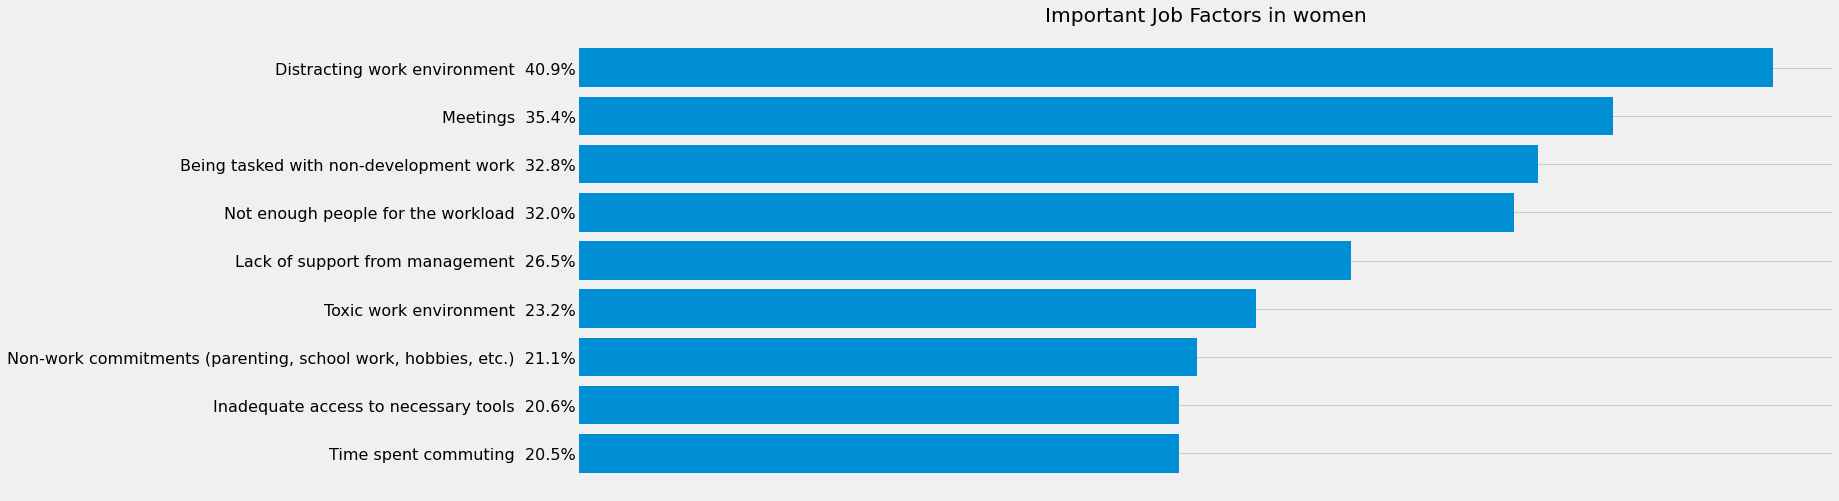

In [154]:
WorkChallenge  = data["WorkChallenge"]
WorkChallenge.dropna(inplace = True )

WorkChallenge_woman =   data[ (WorkChallenge != "nan") & ((data["Gender"] == "Woman") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
WorkChallenge_woman = WorkChallenge_woman["WorkChallenge"]
WorkChallenge_woman = WorkChallenge_woman.str.split(";")

list_sorter_counter(WorkChallenge_woman)

Build_Barh_sizes( key_Phrases , Quantity, WorkChallenge_woman ,"fivethirtyeight", False , (20,8), "Important Job Factors in women")


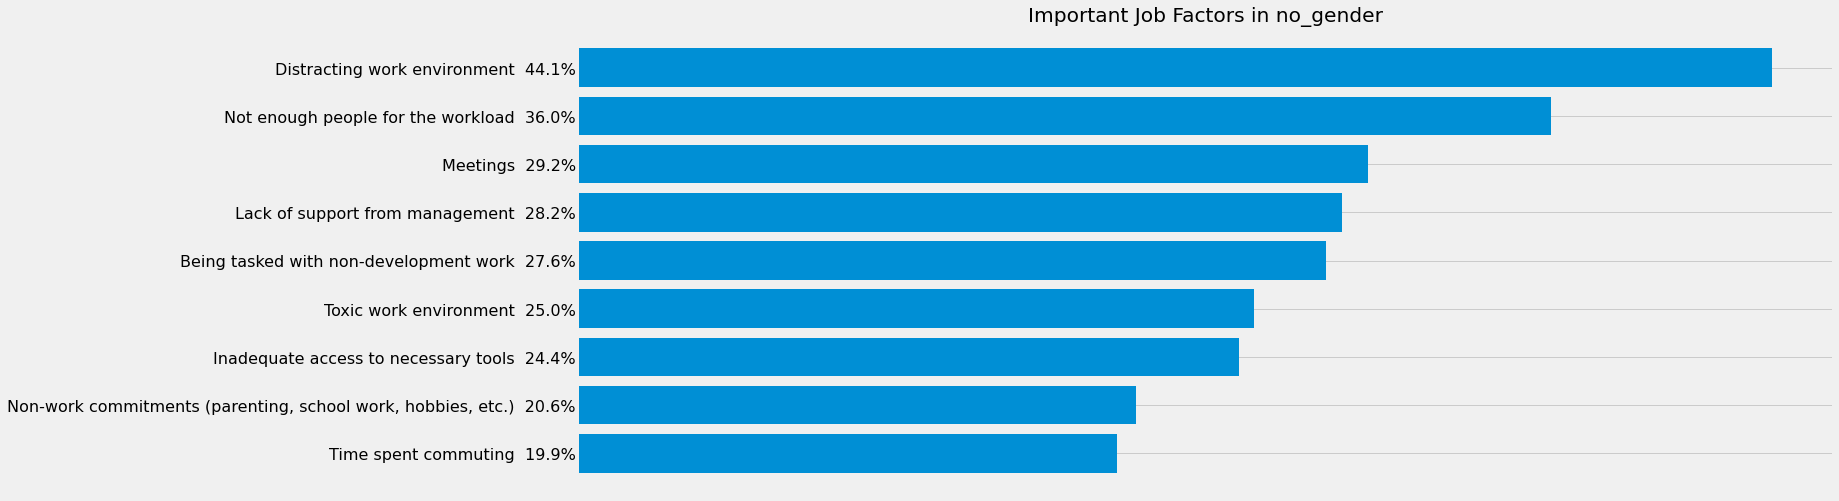

In [155]:
WorkChallenge  = data["WorkChallenge"]
WorkChallenge.dropna(inplace = True )

WorkChallenge_no_gender =   data[ (WorkChallenge != "nan") & ((data["Gender"] == "Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender
WorkChallenge_no_gender = WorkChallenge_no_gender["WorkChallenge"]
WorkChallenge_no_gender = WorkChallenge_no_gender.str.split(";")

list_sorter_counter(WorkChallenge_no_gender)

Build_Barh_sizes( key_Phrases , Quantity, WorkChallenge_no_gender ,"fivethirtyeight", False , (20,8), "Important Job Factors in no_gender")


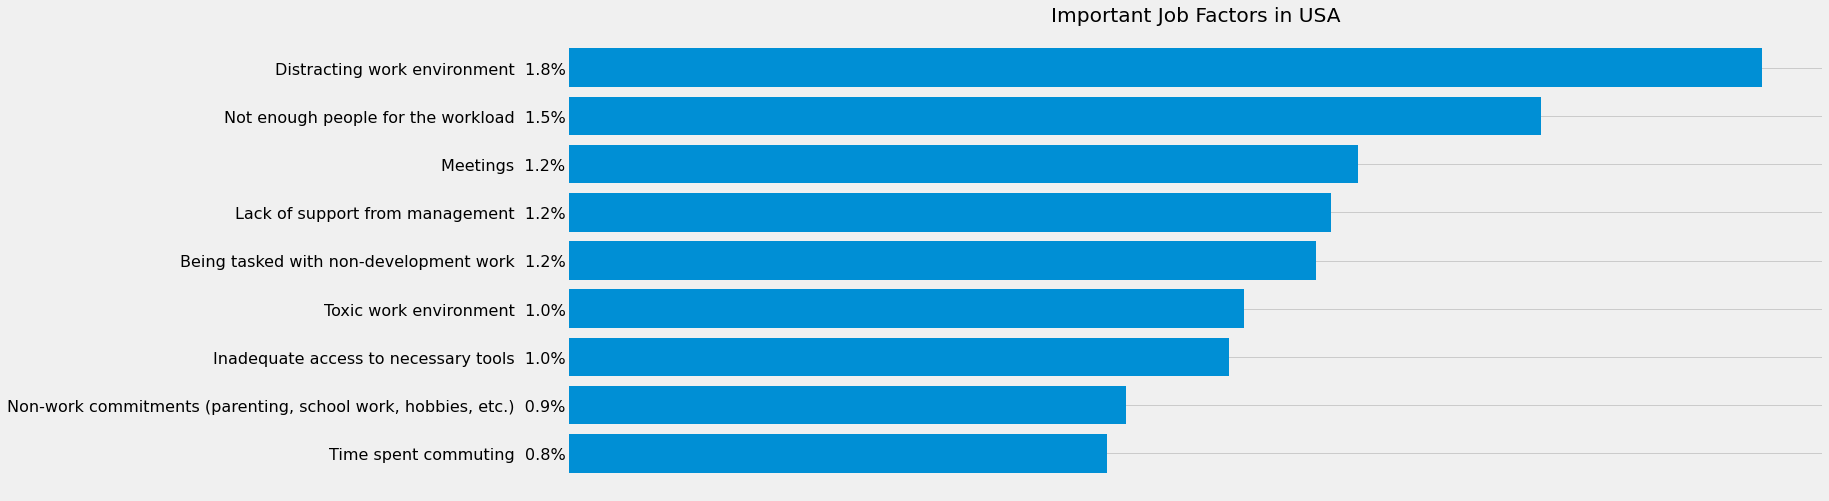

In [156]:
########## აქაც რაღაც შეცდომმა მაქვს
WorkChallenge  = data["WorkChallenge"]
WorkChallenge.dropna(inplace = True )

WorkChallenge_USA =   data[ (WorkChallenge != "nan") & (data["Country"] == "United States")] # Data by gender
WorkChallenge_USA = WorkChallenge_USA["WorkChallenge"]
WorkChallenge_USA = WorkChallenge_USA.str.split(";")

list_sorter_counter(WorkChallenge_no_gender)

Build_Barh_sizes( key_Phrases , Quantity, WorkChallenge_USA ,"fivethirtyeight", False , (20,8), "Important Job Factors in USA")


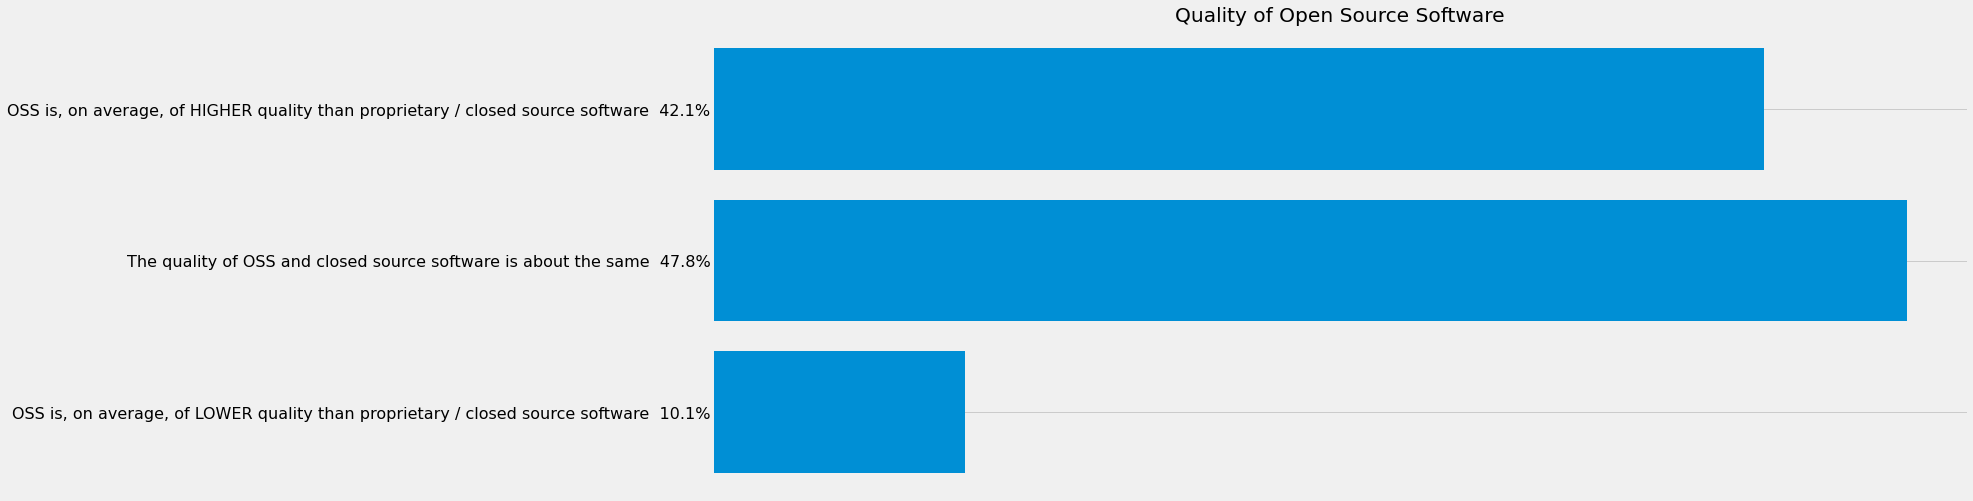

In [157]:
OpenSource = data["OpenSource"]
OpenSource.dropna(inplace = True)

counted  = Counter(OpenSource)  ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases  =["OSS is, on average, of LOWER quality than proprietary / closed source software",
                "The quality of OSS and closed source software is about the same", 
                "OSS is, on average, of HIGHER quality than proprietary / closed source software"]

######### ვქმნით რაოდენობის შესანახ ცარიელ სიას #########
Quantity = []

###### ვანაწილებთ ფრაზებს რაოდენობების მიხედვით
for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, OpenSource ,"fivethirtyeight", False , (20,8), "Quality of Open Source Software")


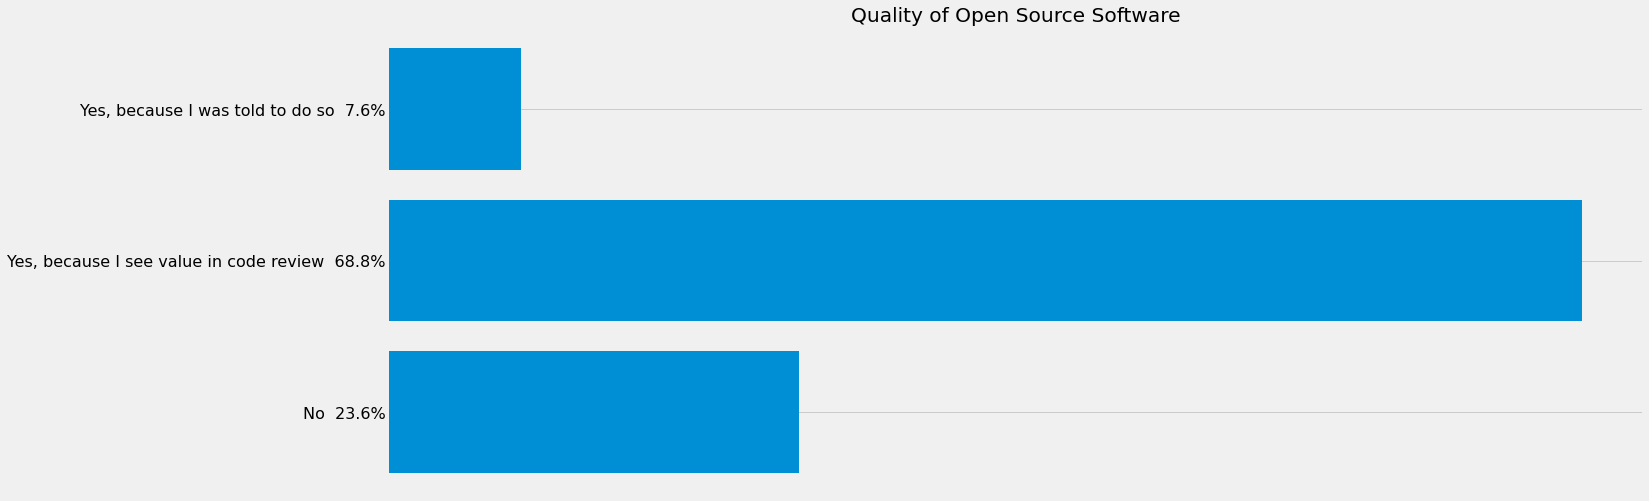

In [158]:
CodeRev = data["CodeRev"]
CodeRev.dropna(inplace = True)

counted  = Counter(CodeRev)  ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases  =["No",
                "Yes, because I see value in code review", 
                "Yes, because I was told to do so"]

######### ვქმნით რაოდენობის შესანახ ცარიელ სიას #########
Quantity = []

###### ვანაწილებთ ფრაზებს რაოდენობების მიხედვით
for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, CodeRev ,"fivethirtyeight", False , (20,8), "Quality of Open Source Software")


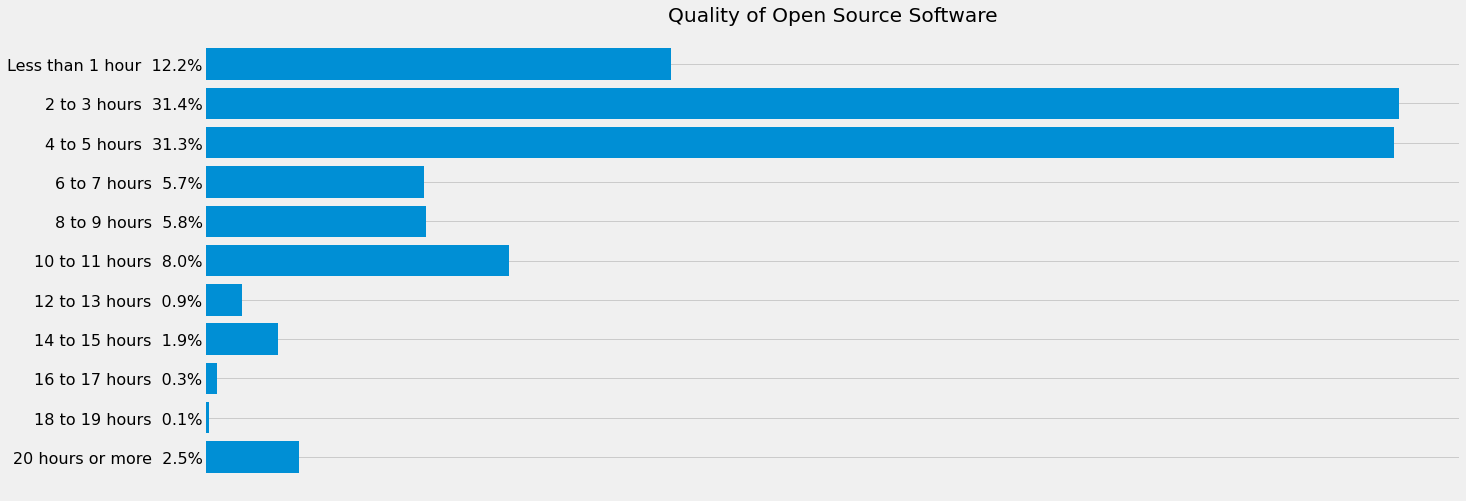

In [159]:
CodeRevHrs = data["CodeRevHrs"]
CodeRevHrs.dropna(inplace = True)

########## ვქმნით სხვადასხვა ასაკის შესანახად ცარიელ ლისთებს #################
less_than_1 = []
from_2_to_3 = []
from_4_to_5 = []
from_6_to_7 = []
from_8_to_9 = []
from_10_to_11 = []
from_12_to_13 = []
from_14_to_15 = []
from_16_to_17 = []
from_18_to_19 = []
more_than_20 =[]


######## ვანაწილებთ სხვადასხვა ასაკს თავის შესაბამის ლისტში ######
###### int-ს იმიტომ ვუწერთ წინ i-ს, რომ სიაში არსებული float-ები დაამრგვალოს მთელ რიცხვებამდე

for i in CodeRevHrs:
    if int(i) in range(0,2):
        less_than_1.append(i)
    elif int(i) in range(2,4,):
        from_2_to_3.append(i)
    elif int(i) in range(4,6):
        from_4_to_5.append(i)
    elif int(i) in range(6,8):
        from_6_to_7.append(i)
    elif int(i) in range(8,10):
        from_8_to_9.append(i)
    elif int(i) in range(10,12):
        from_10_to_11.append(i)
    elif int(i) in range(12,14):
        from_12_to_13.append(i)
    elif int(i) in range(14,16):
        from_14_to_15 .append(i)
    elif int(i) in range(16,18):
        from_16_to_17.append(i)
    elif int(i) in range(18,20):
        from_18_to_19.append(i)
    else:
        more_than_20.append(i)
        

######### ვანაწილებთ რაოდენობებს და შესაბამის შუალედებს 2 სხვადასხვა ლისტში #############
Phrases_5_to_50= ["Less than 1 hour", "2 to 3 hours", "4 to 5 hours", "6 to 7 hours", "8 to 9 hours", "10 to 11 hours", "12 to 13 hours", "14 to 15 hours", "16 to 17 hours", "18 to 19 hours", "20 hours or more"]
quantity_5_to_50 = [len(less_than_1), len(from_2_to_3), len(from_4_to_5), len(from_6_to_7), len(from_8_to_9), len(from_10_to_11), len(from_12_to_13), len(from_14_to_15), len(from_16_to_17), len(from_18_to_19), len(more_than_20)]

Phrases_5_to_50.reverse()      ###### ეს რაღაცა ჯანდაბა ატრიალებს გრაფიკს, ამუ თავში რაც იყო ზევით მიდის და პირიქით #######
quantity_5_to_50.reverse()

Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, CodeRevHrs ,"fivethirtyeight", False , (20,8), "Quality of Open Source Software")


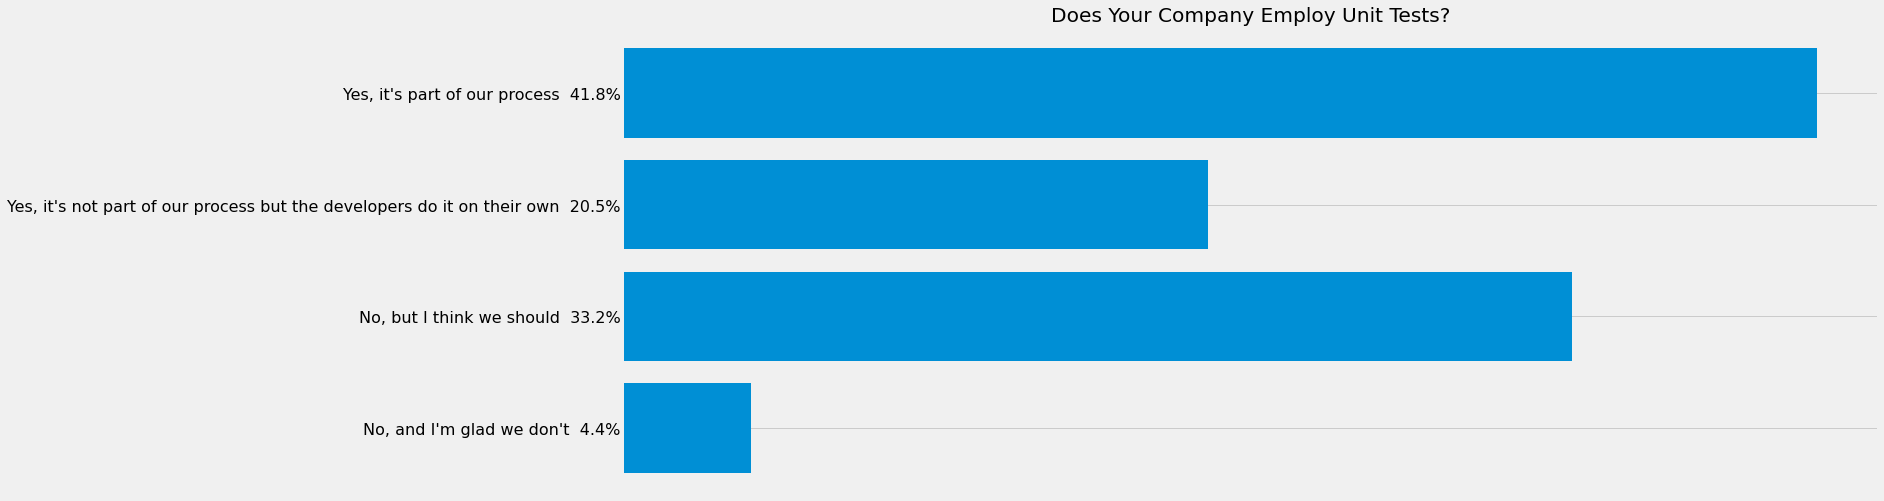

In [160]:
UnitTests = data["UnitTests"]
UnitTests.dropna(inplace = True)

counted  = Counter(UnitTests)  ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases  =["No, and I'm glad we don't",
                "No, but I think we should", 
                "Yes, it's not part of our process but the developers do it on their own",
                "Yes, it's part of our process"]
                

######### ვქმნით რაოდენობის შესანახ ცარიელ სიას #########
Quantity = []

###### ვანაწილებთ ფრაზებს რაოდენობების მიხედვით
for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, UnitTests ,"fivethirtyeight", False , (20,8), "Does Your Company Employ Unit Tests?")


In [161]:
hours_worked_per_week = data["WorkWeekHrs"]  #calling data from WorkWeekHrs
hours_worked_per_week.dropna(inplace =True) #filtering the data from empty and unnecessary answers

#creating the function where is written logics for sorting data
def logics_for_work_hours(hours_worked_per_week):
    #Creating empty lists with specific ages where the related data will be placed 
    less_than_30_hours = []
    thirty_to_34_hours = []
    thirtyfive_to_39_hours = []
    fourty_to_44_hours = []
    fourtyfive_to_49_hours = []
    fifty_to_54_hours = []
    fiftyfive_to_59_hours = []
    sixty_to_64_hours = []
    sixtyfive_to_69_hours = []
    seventy_hours_or_more = []


    #adding data to related lists 
    for i in hours_worked_per_week:
        if int(i) in list(range(0,30)):
            less_than_30_hours.append(i)
        elif int(i) in list(range(30,35)):
            thirty_to_34_hours.append(i)
        elif int(i) in list(range(35,40)):
            thirtyfive_to_39_hours.append(i)
        elif int(i) in list(range(40,45)):
            fourty_to_44_hours.append(i)
        elif int(i) in list(range (45,50)):
            fourtyfive_to_49_hours.append(i)
        elif int(i) in list(range(50,55)):
            fifty_to_54_hours.append(i)
        elif int(i) in list(range (55,60)):
            fiftyfive_to_59_hours.append(i)
        elif int(i) in list(range (60,65)):
            sixty_to_64_hours.append(i)
        elif int(i) in list(range (65,70)):
            sixtyfive_to_69_hours.append(i)
        else:
            seventy_hours_or_more.append(i)

    #defining length of the lists that have been created after adding data 
    len_less_than_30_hours = len(less_than_30_hours)
    len_thirty_to_34_hours = len(thirty_to_34_hours)
    len_thirtyfive_to_39_hours = len(thirtyfive_to_39_hours)
    len_fourty_to_44_hours = len(fourty_to_44_hours)
    len_fourtyfive_to_49_hours = len(fourtyfive_to_49_hours) 
    len_fifty_to_54_hours = len(fifty_to_54_hours)
    len_fiftyfive_to_59_hours = len(fiftyfive_to_59_hours)
    len_sixty_to_64_hours = len(sixty_to_64_hours)
    len_sixtyfive_to_69_hours = len(sixtyfive_to_69_hours)
    len_seventy_hours_or_more = len(seventy_hours_or_more)

    global key_Phrases  #declaring key phrases as global 
    global Quantity     #declaring Quantity as global 

    #writing the key phrases and quantity iformation by hand 
    # where the key phrases are presented as list with specific ages in it 
    #and quantity is the list with the length of the lists where the data was added 
    key_Phrases = ["Less than 30 hours", "30 to 34 hours", "35 to 39 hours", "40 to 44 hours", "45 to 49 hours", "50 to 54 hours",
                    "55 to 59 hours", "60 to 64 hours", "65 to 69 hours", "70 hours or more"]
    Quantity = [len_less_than_30_hours, len_thirty_to_34_hours, len_thirtyfive_to_39_hours, len_fourty_to_44_hours, 
                len_fourtyfive_to_49_hours, len_fifty_to_54_hours, len_fiftyfive_to_59_hours, len_sixty_to_64_hours,
                len_sixtyfive_to_69_hours, len_seventy_hours_or_more]

#calling the function to sort the data
logics_for_work_hours(hours_worked_per_week)

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes(key_Phrases, Quantity, hours_worked_per_week, "fivethirtyeight", False , (18,7), "Hours Worked Per Week Overal") #building barchart

                                                       Community

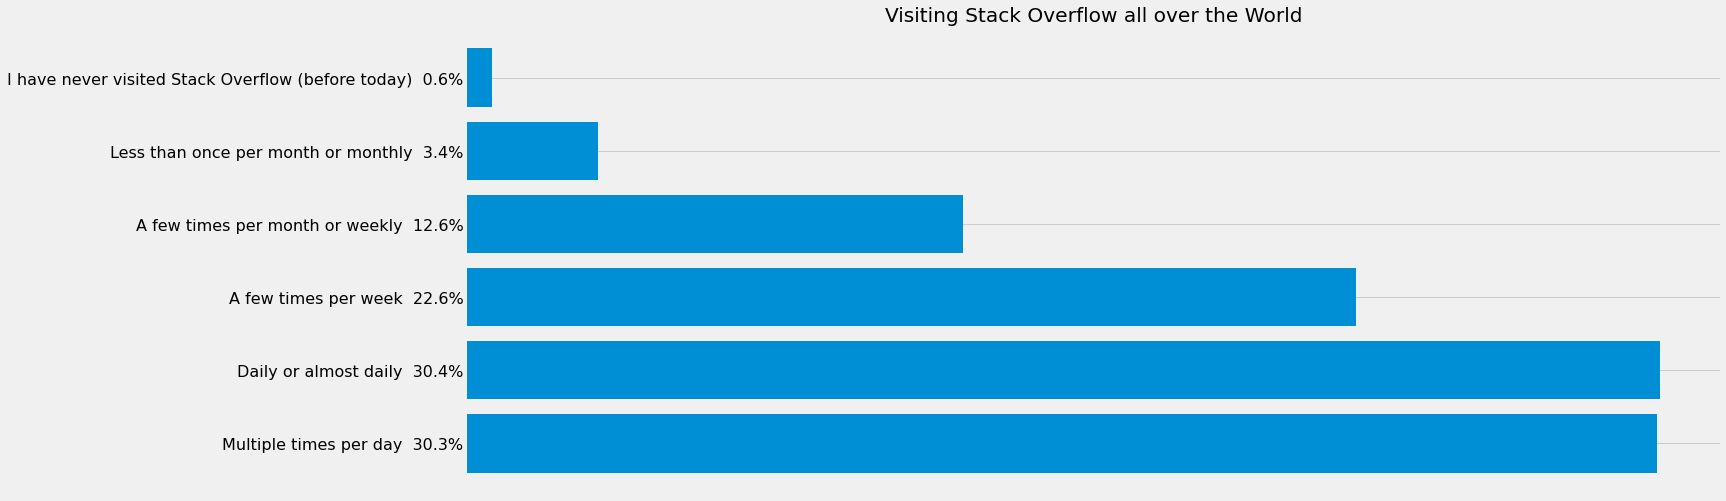

In [162]:
SOVisitFreq = data["SOVisitFreq"]
SOVisitFreq	.dropna(inplace = True)



counted  = Counter(SOVisitFreq)  ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases  =["I have never visited Stack Overflow (before today)",
                "Less than once per month or monthly", 
                "A few times per month or weekly",
                "A few times per week",
                "Daily or almost daily",
                "Multiple times per day"
                ]
                

######### ვქმნით რაოდენობის შესანახ ცარიელ სიას #########
Quantity = []

###### ვანაწილებთ ფრაზებს რაოდენობების მიხედვით
for i in key_Phrases:
    Quantity.append(counted[i])

key_Phrases.reverse()
Quantity.reverse()


Build_Barh_sizes( key_Phrases , Quantity, SOVisitFreq ,"fivethirtyeight", False , (20,8), "Visiting Stack Overflow all over the World")


In [163]:
SOVisitFreq = data["SOVisitFreq"]
SOVisitFreq	.dropna(inplace = True)

SOVisitFreq_USA = data[(SOVisitFreq!="NaN") & (data["Country"] == "United States")]
New_SOVisitFreq = SOVisitFreq_USA["SOVisitFreq"]

counted  = Counter(New_SOVisitFreq)  ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases  =["I have never visited Stack Overflow (before today)",
                "Less than once per month or monthly", 
                "A few times per month or weekly",
                "A few times per week",
                "Daily or almost daily",
                "Multiple times per day"
                ]
                

######### ვქმნით რაოდენობის შესანახ ცარიელ სიას #########
Quantity = []

###### ვანაწილებთ ფრაზებს რაოდენობების მიხედვით
for i in key_Phrases:
    Quantity.append(counted[i])

key_Phrases.reverse()
Quantity.reverse()


Build_Barh_sizes( key_Phrases , Quantity, New_SOVisitFreq ,"fivethirtyeight", False , (20,8), "Visiting Stack Overflow in USA")


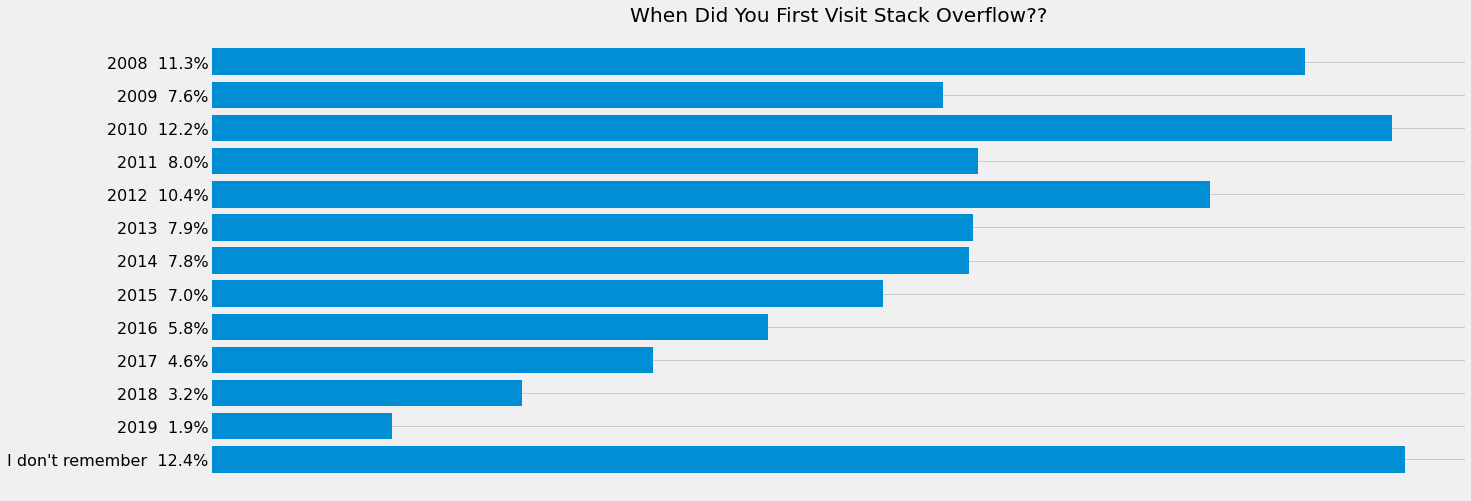

In [164]:
SOVisit1st = data["SOVisit1st"]
SOVisit1st.dropna(inplace = True)

counted  = Counter(SOVisit1st)  ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases  =["I don't remember", "2019", "2018", "2017", "2016", "2015", "2014",
                "2013", "2012", "2011", "2010", "2009", "2008" ]
                

######### ვქმნით რაოდენობის შესანახ ცარიელ სიას #########
Quantity = []

###### ვანაწილებთ ფრაზებს რაოდენობების მიხედვით
for i in key_Phrases:
    Quantity.append(counted[i])




Build_Barh_sizes( key_Phrases , Quantity, SOVisit1st ,"fivethirtyeight", False , (20,8), "When Did You First Visit Stack Overflow??")


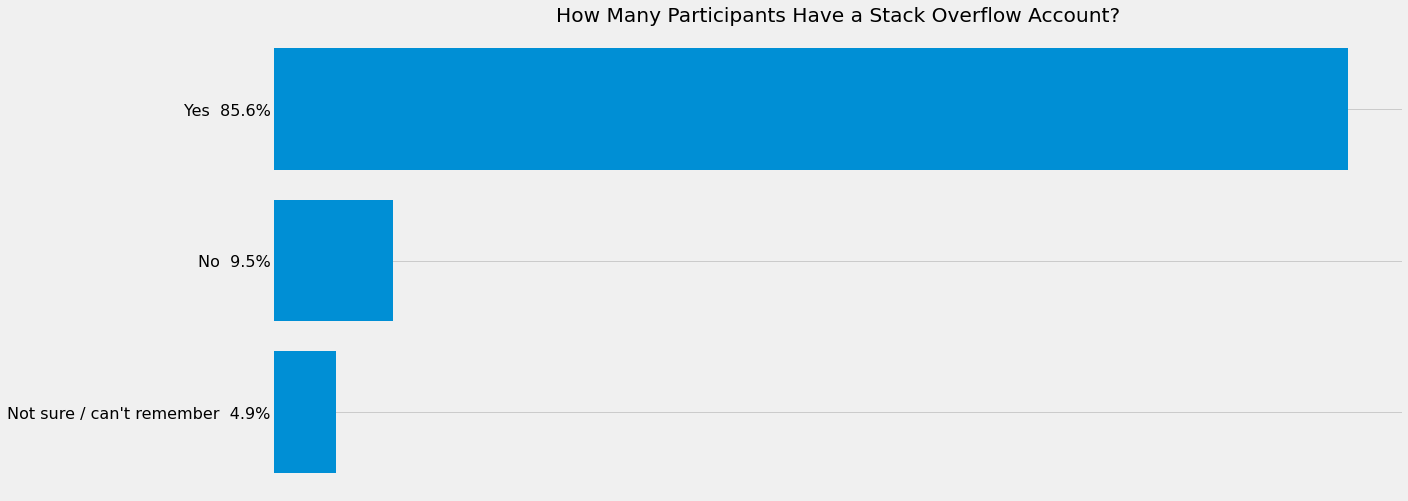

In [165]:
SOAccount = data["SOAccount"]
SOAccount.dropna(inplace = True)

counted = Counter(SOAccount)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, SOAccount ,"fivethirtyeight", False , (18,8), "How Many Participants Have a Stack Overflow Account?")   # ვაგებთ გრაფიკს


In [166]:
SOVisitTo = data["SOVisitTo"]
SOVisitTo.dropna(inplace = True)

SOVisitTo = SOVisitTo.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში
list_sorter_counter(SOVisitTo)  ### ვქმნით ერთ დიდ სიას და ვითლით ლისტის ფრაზების შესაბამის რაოდენობებს

Build_Barh_sizes( key_Phrases , Quantity, SOVisitTo ,"fivethirtyeight", False , (18,7), "Why Do Developers Visit Stack Overflow?")   # ვაგებთ გრაფიკს


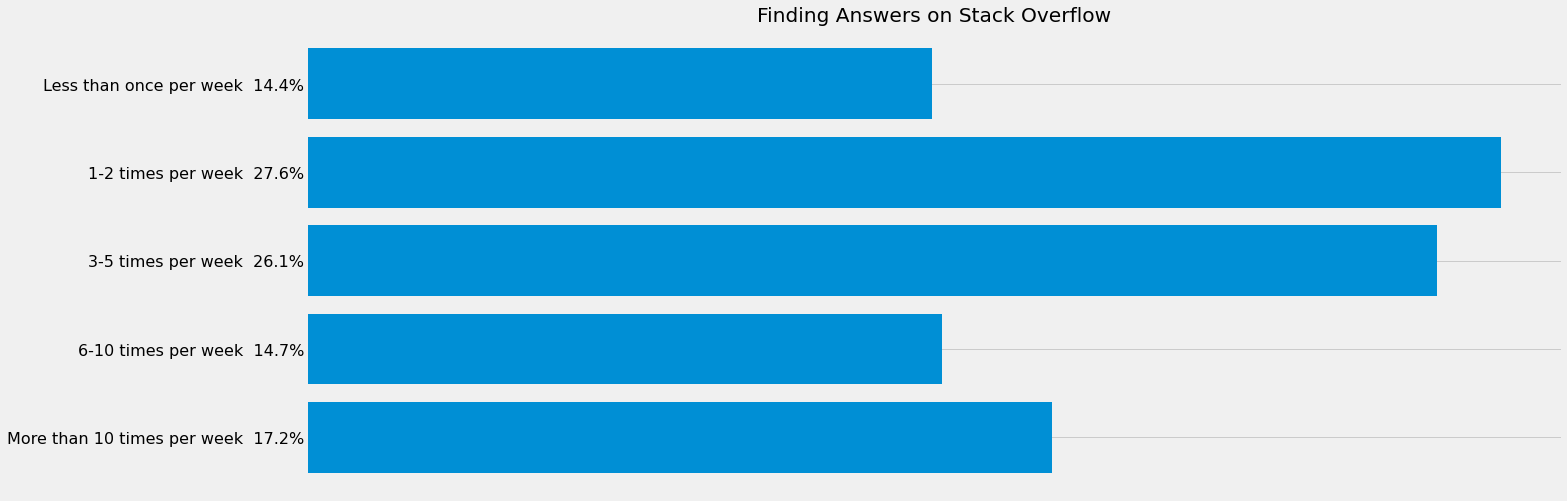

In [167]:
SOFindAnswer = data["SOFindAnswer"]
SOFindAnswer.dropna(inplace = True)

counted  = Counter(SOFindAnswer)  ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases  =["More than 10 times per week", "6-10 times per week", "3-5 times per week",
                "1-2 times per week", "Less than once per week" ]
                

######### ვქმნით რაოდენობის შესანახ ცარიელ სიას #########
Quantity = []

###### ვანაწილებთ ფრაზებს რაოდენობების მიხედვით
for i in key_Phrases:
    Quantity.append(counted[i])




Build_Barh_sizes( key_Phrases , Quantity, SOFindAnswer ,"fivethirtyeight", False , (20,8), "Finding Answers on Stack Overflow")


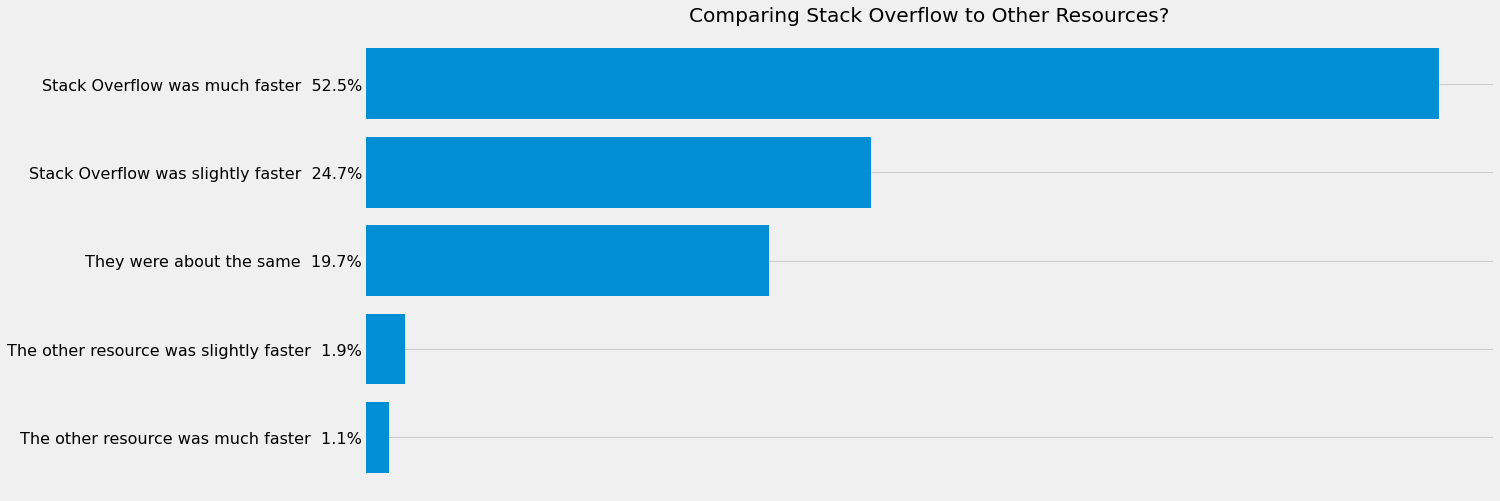

In [168]:
SOTimeSaved = data["SOTimeSaved"]
SOTimeSaved.dropna(inplace = True)

counted = Counter(SOTimeSaved)  

Counted_sorted = sort_dict_by_value(counted, False)

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, SOTimeSaved ,"fivethirtyeight", False , (18,8), "Comparing Stack Overflow to Other Resources?")   # ვაგებთ გრაფიკს


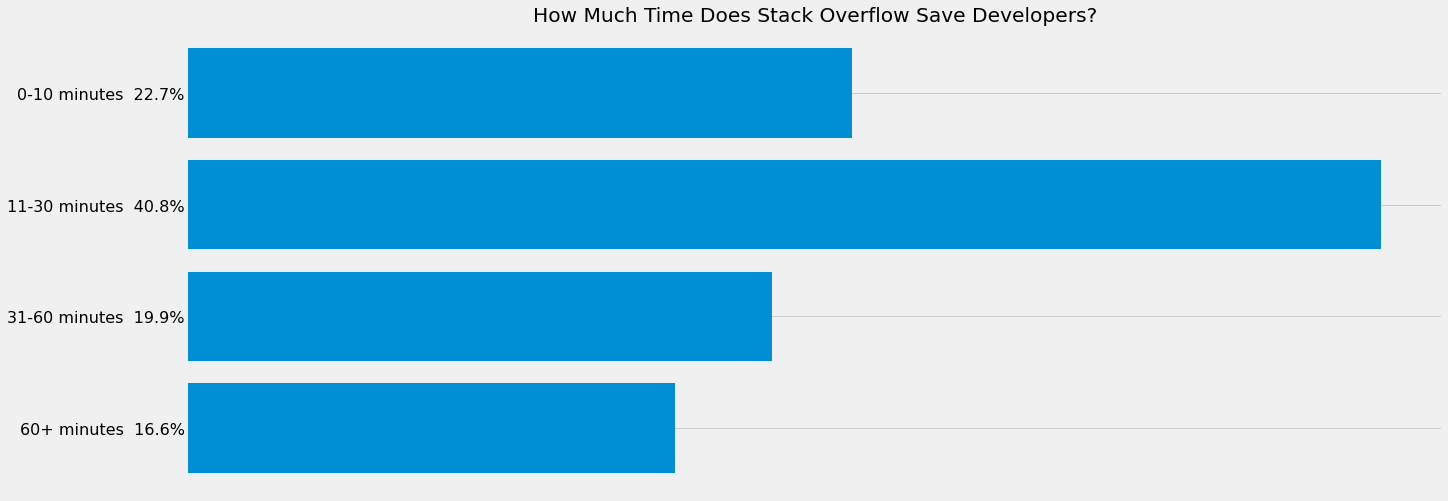

In [169]:
SOHowMuchTime = data["SOHowMuchTime"]
SOHowMuchTime.dropna(inplace = True)

counted  = Counter(SOHowMuchTime)  ########### დავითვალოთ თითოელი პასუხი

######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases  =["60+ minutes", "31-60 minutes", "11-30 minutes",
                "0-10 minutes" ]
                

######### ვქმნით რაოდენობის შესანახ ცარიელ სიას #########
Quantity = []

###### ვანაწილებთ ფრაზებს რაოდენობების მიხედვით
for i in key_Phrases:
    Quantity.append(counted[i])




Build_Barh_sizes( key_Phrases , Quantity, SOHowMuchTime ,"fivethirtyeight", False , (20,8), "How Much Time Does Stack Overflow Save Developers?")


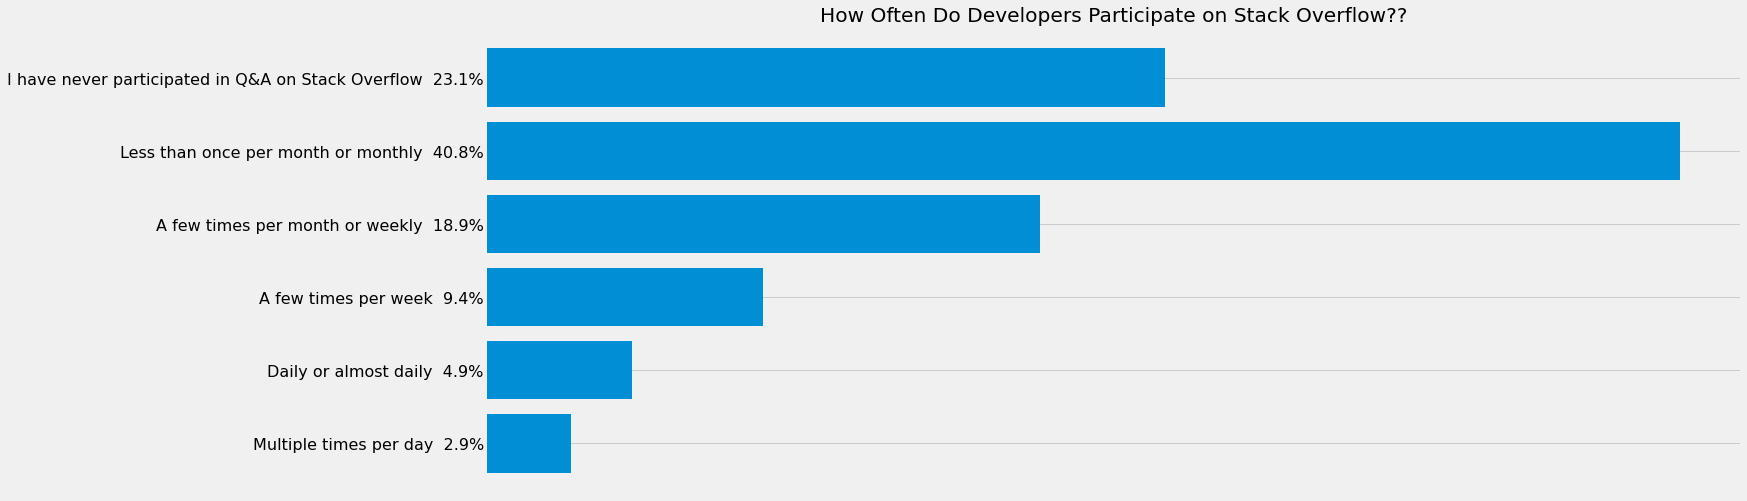

In [170]:
SOPartFreq = data["SOPartFreq"]
SOPartFreq.dropna(inplace = True)

counted  = Counter(SOPartFreq)  ########### დავითვალოთ თითოელი პასუხი
######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases  =["Multiple times per day", "Daily or almost daily", "A few times per week",
                "A few times per month or weekly", "Less than once per month or monthly",
                "I have never participated in Q&A on Stack Overflow" ]

######### ვქმნით რაოდენობის შესანახ ცარიელ სიას #########
Quantity = []

###### ვანაწილებთ ფრაზებს რაოდენობების მიხედვით
for i in key_Phrases:
    Quantity.append(counted[i])




Build_Barh_sizes( key_Phrases , Quantity, SOPartFreq ,"fivethirtyeight", False , (20,8), "How Often Do Developers Participate on Stack Overflow??")       
                                                          

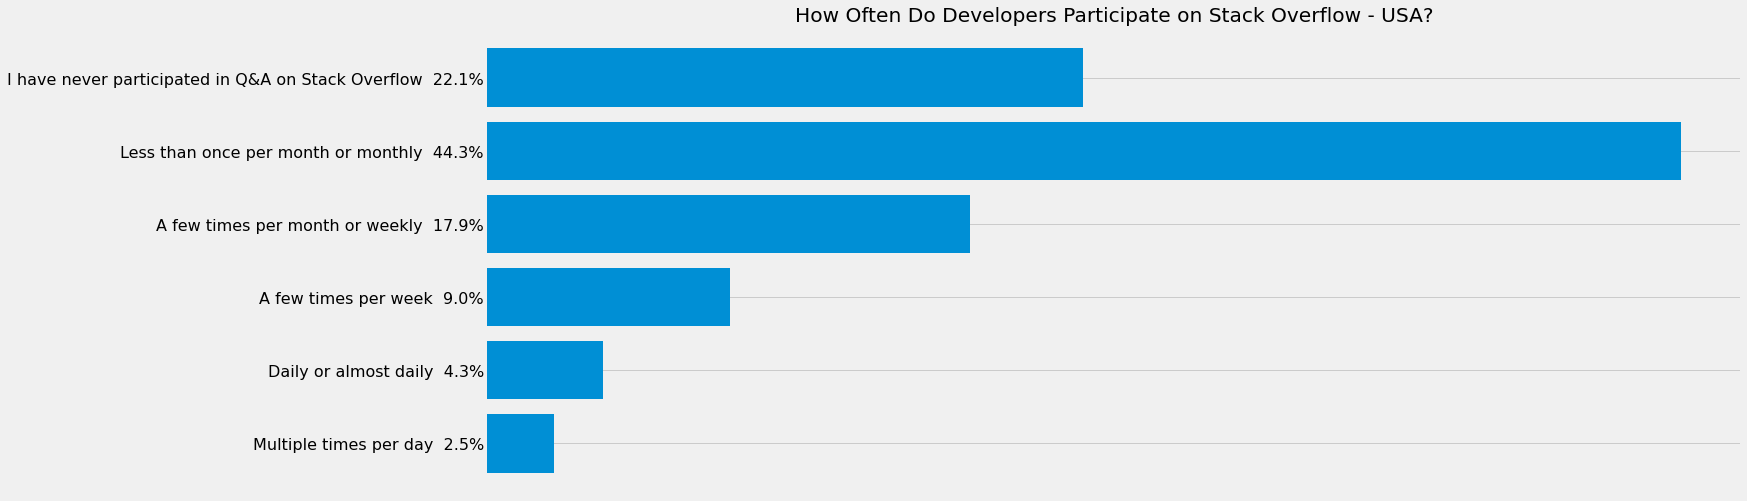

In [171]:
SOPartFreq = data["SOPartFreq"]
SOPartFreq.dropna(inplace = True)

SOPartFreq_USA = data[ (SOPartFreq != "nan") & (data["Country"] == "United States")]
New_SOPartFreq_USA = SOPartFreq_USA["SOPartFreq"]

counted  = Counter(New_SOPartFreq_USA)  ########### დავითვალოთ თითოელი პასუხი
######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases  =["Multiple times per day", "Daily or almost daily", "A few times per week",
                "A few times per month or weekly", "Less than once per month or monthly",
                "I have never participated in Q&A on Stack Overflow" ]

######### ვქმნით რაოდენობის შესანახ ცარიელ სიას #########
Quantity = []

###### ვანაწილებთ ფრაზებს რაოდენობების მიხედვით
for i in key_Phrases:
    Quantity.append(counted[i])




Build_Barh_sizes( key_Phrases , Quantity, New_SOPartFreq_USA ,"fivethirtyeight", False , (20,8), "How Often Do Developers Participate on Stack Overflow - USA?")       
                                                          

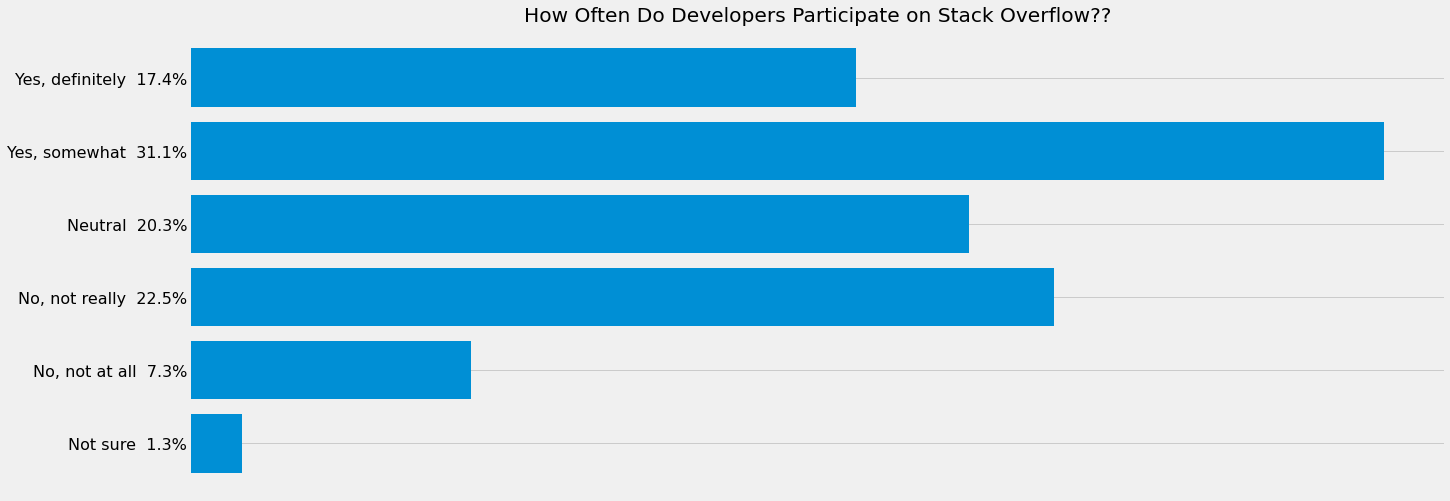

In [172]:
SOComm = data["SOComm"]
SOComm.dropna(inplace = True)

counted  = Counter(SOComm)  ########### დავითვალოთ თითოელი პასუხი
######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases  =["Not sure", "No, not at all", "No, not really",
                "Neutral", "Yes, somewhat",
                "Yes, definitely" ]

######### ვქმნით რაოდენობის შესანახ ცარიელ სიას #########
Quantity = []

###### ვანაწილებთ ფრაზებს რაოდენობების მიხედვით
for i in key_Phrases:
    Quantity.append(counted[i])




Build_Barh_sizes( key_Phrases , Quantity, SOComm ,"fivethirtyeight", False , (20,8), "How Often Do Developers Participate on Stack Overflow??")       
                                                          

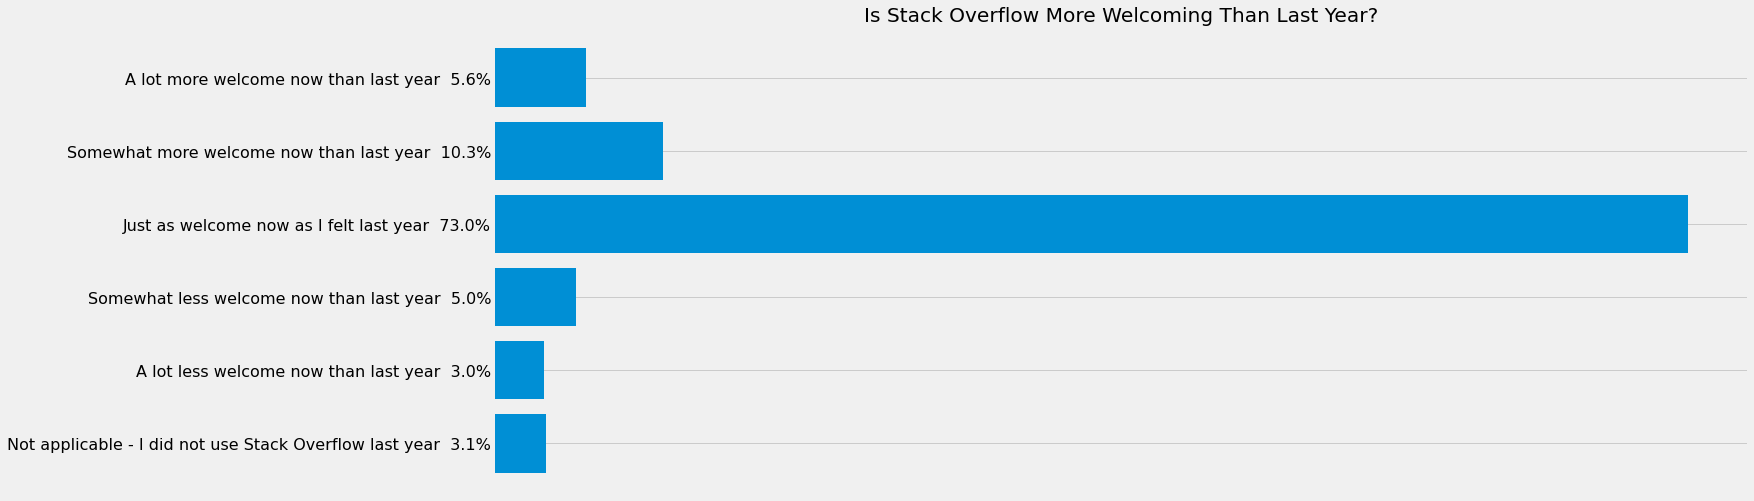

In [173]:
WelcomeChange = data["WelcomeChange"]
WelcomeChange.dropna(inplace = True)

counted  = Counter(WelcomeChange)  ########### დავითვალოთ თითოელი პასუხი
######## ვქმნით სიას ისეთი თანმიმდევრობით როგორიც გვჭირდება
key_Phrases  =["Not applicable - I did not use Stack Overflow last year", "A lot less welcome now than last year", 
                "Somewhat less welcome now than last year", "Just as welcome now as I felt last year",
                "Somewhat more welcome now than last year", "A lot more welcome now than last year" ]

######### ვქმნით რაოდენობის შესანახ ცარიელ სიას #########
Quantity = []

###### ვანაწილებთ ფრაზებს რაოდენობების მიხედვით
for i in key_Phrases:
    Quantity.append(counted[i])




Build_Barh_sizes( key_Phrases , Quantity, WelcomeChange ,"fivethirtyeight", False , (20,8), "Is Stack Overflow More Welcoming Than Last Year?")       
                                                          


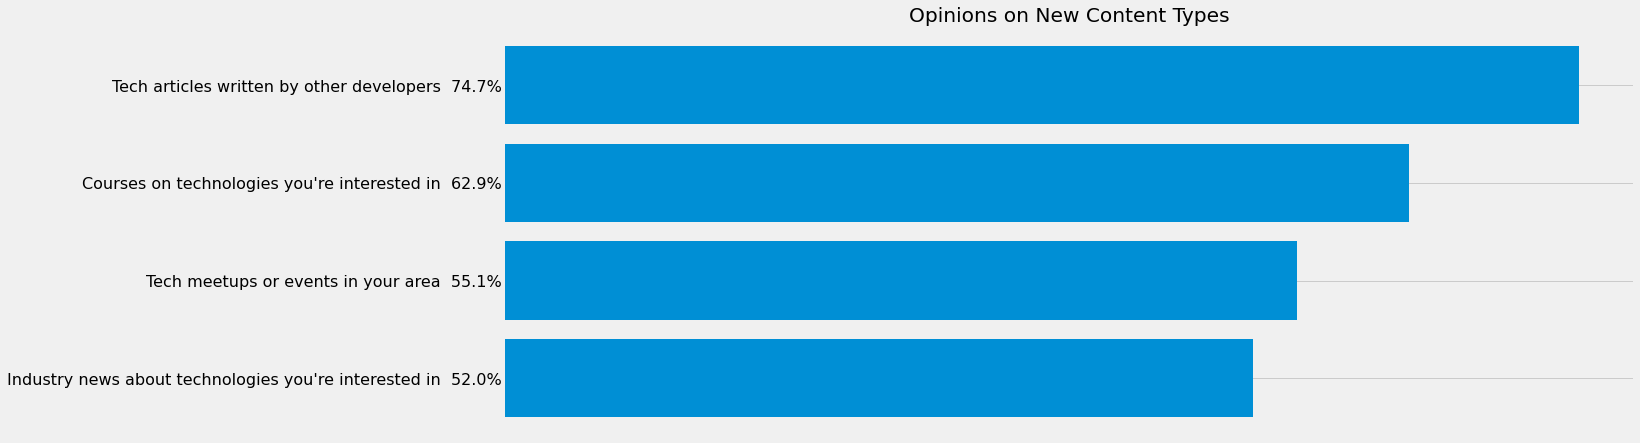

In [174]:
new_content_SO = data["SONewContent"]  #calling data from "SONewContent"
new_content_SO.dropna(inplace = True) #filtering the data from empty and unnecessary answers
new_content_SO = new_content_SO.str.split(";") #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(new_content_SO) #autosorting 

Build_Barh_sizes(key_Phrases, Quantity, new_content_SO, "fivethirtyeight", False , (18,7), "Opinions on New Content Types") #building barchart